<a href="https://colab.research.google.com/github/shauryasushant2016/My_learning/blob/main/Loan_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression

# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, recall_score, f1_score

from sklearn import metrics

from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Mount Google Drive (if your dataset is stored there)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the dataset
file_path = '/content/drive/MyDrive/Loan_defaulter_casestudy/Dataset_2.xlsx'  # Update with your actual file path
data = pd.read_excel(file_path)

In [4]:
# Display the first few rows of the dataset
print(data.head())

         ID Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  \
0  12142509          6750        0.0         0.0          1.0        0.0   
1  12138936         20250        1.0         0.0          1.0        NaN   
2  12181264         18000        0.0         0.0          1.0        0.0   
3  12188929         15750        0.0         0.0          1.0        1.0   
4  12133385         33750        1.0         0.0          1.0        0.0   

   Child_Count Credit_Amount Loan_Annuity Accompany_Client  ...  \
0          0.0      61190.55      3416.85            Alone  ...   
1          0.0         15282      1826.55            Alone  ...   
2          1.0      59527.35       2788.2            Alone  ...   
3          0.0       53870.4      2295.45            Alone  ...   
4          2.0      133988.4      3547.35            Alone  ...   

  Client_Permanent_Match_Tag Client_Contact_Work_Tag       Type_Organization  \
0                        Yes                     Yes        

In [5]:
# Displaying last 5 rows
print(data.tail())

              ID Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  \
121851  12207714         29250        0.0         0.0          NaN        1.0   
121852  12173765         15750        0.0         1.0          1.0        0.0   
121853  12103937          8100        0.0         1.0          0.0        1.0   
121854  12170623         38250        1.0         1.0          0.0        1.0   
121855  12105610          9000        1.0         1.0          1.0        1.0   

        Child_Count Credit_Amount Loan_Annuity Accompany_Client  ...  \
121851          0.0        107820       3165.3         Relative  ...   
121852          0.0        104256      3388.05            Alone  ...   
121853          1.0       55107.9      2989.35            Alone  ...   
121854          0.0         45000      2719.35            Alone  ...   
121855          1.0      62428.95      4201.65            Alone  ...   

       Client_Permanent_Match_Tag Client_Contact_Work_Tag  \
121851             

In [6]:
# Checking the shape of the data
data.shape

(121856, 40)

#**Insights**

*  There are 121856 rows each one them with 40 columns
*  There are rows with missing values (Nan).

In [7]:
# Checking for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Check for missing values in each column
missing_values = data.isnull().sum()

# Filter columns with missing values
columns_with_missing_values = missing_values[missing_values > 0]

# Get the count of columns with missing values
count_columns_with_missing_values = len(columns_with_missing_values)

# Display the count and names of columns with missing values
print(f"Number of columns with missing values: {count_columns_with_missing_values}")
print("Columns with missing values:")
print(columns_with_missing_values)


Missing Values:
ID                                0
Client_Income                  3607
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3632
Loan_Annuity                   4812
Accompany_Client               1746
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4857
Age_Days                       3600
Employed_Days                  3649
Registration_Days              3614
ID_Days                        5968
Own_House_Age                 80094
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             41435
Client_Family_Members          2410
Cleint_City

In [8]:
# List of columns to convert to float
columns_to_convert = ['Client_Income',	'Credit_Amount',	'Loan_Annuity',	'Population_Region_Relative',	'Score_Source_1',	'Score_Source_2',	'Score_Source_3',	'Social_Circle_Default']

# Convert specified columns to float using pd.to_numeric
data[columns_to_convert] = data[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Verify the updated data types
print("Updated Data Types:")
print(data.dtypes)


Updated Data Types:
ID                              int64
Client_Income                 float64
Car_Owned                     float64
Bike_Owned                    float64
Active_Loan                   float64
House_Own                     float64
Child_Count                   float64
Credit_Amount                 float64
Loan_Annuity                  float64
Accompany_Client               object
Client_Income_Type             object
Client_Education               object
Client_Marital_Status          object
Client_Gender                  object
Loan_Contract_Type             object
Client_Housing_Type            object
Population_Region_Relative    float64
Age_Days                       object
Employed_Days                  object
Registration_Days              object
ID_Days                        object
Own_House_Age                 float64
Mobile_Tag                      int64
Homephone_Tag                   int64
Workphone_Working               int64
Client_Occupation             

In [9]:
# Assuming 'data' is your DataFrame

# List of columns to convert to float
columns_to_convert = ['Car_Owned',	'Bike_Owned',	'Active_Loan',	'House_Own',	'Child_Count',	'Age_Days',	'Employed_Days',	'Registration_Days',	'ID_Days',	'Own_House_Age',	'Mobile_Tag',	'Homephone_Tag',	'Workphone_Working',	'Client_Family_Members',	'Cleint_City_Rating',	'Application_Process_Day',	'Application_Process_Hour',	'Phone_Change',	'Credit_Bureau',	'Default']

# Convert specified columns to float using pd.to_numeric
data[columns_to_convert] = data[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Verify the updated data types
print("Updated Data Types:")
print(data.dtypes)


Updated Data Types:
ID                              int64
Client_Income                 float64
Car_Owned                     float64
Bike_Owned                    float64
Active_Loan                   float64
House_Own                     float64
Child_Count                   float64
Credit_Amount                 float64
Loan_Annuity                  float64
Accompany_Client               object
Client_Income_Type             object
Client_Education               object
Client_Marital_Status          object
Client_Gender                  object
Loan_Contract_Type             object
Client_Housing_Type            object
Population_Region_Relative    float64
Age_Days                      float64
Employed_Days                 float64
Registration_Days             float64
ID_Days                       float64
Own_House_Age                 float64
Mobile_Tag                      int64
Homephone_Tag                   int64
Workphone_Working               int64
Client_Occupation             

In [10]:
# Display basic information about the dataset
print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118234 non-null  float64
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118219 non-null  float64
 8   Loan_Annuity                117030 non-null  float64
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  

#**Insights**

*   33 of 40 columns have missing values.
*   12 columns are object type


In [11]:
# Checking the percentage of missing values in the each column.
(data.isnull().sum()/data.shape[0] * 100)

ID                             0.000000
Client_Income                  2.972361
Car_Owned                      2.938715
Bike_Owned                     2.974002
Active_Loan                    2.983029
House_Own                      3.004366
Child_Count                    2.985491
Credit_Amount                  2.984670
Loan_Annuity                   3.960412
Accompany_Client               1.432839
Client_Income_Type             3.037191
Client_Education               2.991236
Client_Marital_Status          2.850085
Client_Gender                  1.980206
Loan_Contract_Type             2.996159
Client_Housing_Type            3.025702
Population_Region_Relative     3.994879
Age_Days                       2.968258
Employed_Days                  3.008469
Registration_Days              2.979747
ID_Days                        4.911535
Own_House_Age                 65.728401
Mobile_Tag                     0.000000
Homephone_Tag                  0.000000
Workphone_Working              0.000000


In [12]:
# Set the threshold percentages
threshold_5_percent = 0.05
threshold_50_percent = 0.5
threshold_20_percent = 0.2

# Calculate the percentage of missing values for each column
missing_percentage = data.isnull().mean()

# Identify columns with around 5% missing values
columns_5_percent = missing_percentage[(missing_percentage > 0) & (missing_percentage <= threshold_5_percent)].index.tolist()

# Identify columns with around 50% missing values
columns_50_percent = missing_percentage[(missing_percentage > threshold_5_percent) & (missing_percentage <= threshold_50_percent)].index.tolist()

# Identify columns with more than 20% missing values
columns_20_percent = missing_percentage[missing_percentage > threshold_20_percent].index.tolist()

# Display the identified columns
print("Columns with around 5% missing values:")
print(columns_5_percent)

print("\nColumns with around 50% missing values:")
print(columns_50_percent)

print("\nColumns with more than 20% missing values:")
print(columns_20_percent)


Columns with around 5% missing values:
['Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own', 'Child_Count', 'Credit_Amount', 'Loan_Annuity', 'Accompany_Client', 'Client_Income_Type', 'Client_Education', 'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type', 'Population_Region_Relative', 'Age_Days', 'Employed_Days', 'Registration_Days', 'ID_Days', 'Client_Family_Members', 'Cleint_City_Rating', 'Application_Process_Day', 'Application_Process_Hour', 'Type_Organization', 'Score_Source_2', 'Phone_Change']

Columns with around 50% missing values:
['Client_Occupation', 'Score_Source_3', 'Credit_Bureau']

Columns with more than 20% missing values:
['Own_House_Age', 'Client_Occupation', 'Score_Source_1', 'Score_Source_3', 'Social_Circle_Default']


#**Insights**

* **Columns with around 5% missing values:**
['Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own', 'Child_Count', 'Credit_Amount', 'Loan_Annuity', 'Accompany_Client', 'Client_Income_Type', 'Client_Education', 'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type', 'Population_Region_Relative', 'Age_Days', 'Employed_Days', 'Registration_Days', 'ID_Days', 'Client_Family_Members', 'Cleint_City_Rating', 'Application_Process_Day', 'Application_Process_Hour', 'Type_Organization', 'Score_Source_2', 'Phone_Change']

* **Columns with around 50% missing values:**
['Client_Occupation', 'Score_Source_3', 'Credit_Bureau']

* **Columns with more than 20% missing values:**
['Own_House_Age', 'Client_Occupation', 'Score_Source_1', 'Score_Source_3', 'Social_Circle_Default']


In [13]:
# Summary statistics for numerical features
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
                 ID  Client_Income      Car_Owned     Bike_Owned  \
count  1.218560e+05   1.182340e+05  118275.000000  118232.000000   
mean   1.216093e+07   1.686519e+04       0.342854       0.332262   
std    3.517694e+04   1.153815e+04       0.474665       0.471026   
min    1.210000e+07   2.565000e+03       0.000000       0.000000   
25%    1.213046e+07   1.125000e+04       0.000000       0.000000   
50%    1.216093e+07   1.440000e+04       0.000000       0.000000   
75%    1.219139e+07   2.025000e+04       1.000000       1.000000   
max    1.222186e+07   1.800009e+06       1.000000       1.000000   

         Active_Loan      House_Own    Child_Count  Credit_Amount  \
count  118221.000000  118195.000000  118218.000000  118219.000000   
mean        0.499175       0.692060       0.417779   60046.488951   
std         0.500001       0.461644       0.728802   40350.663346   
min         0.000000       0.000000       0.000000    4500.000000   
25%         0.000000 

In [14]:
# Checking for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
ID                                0
Client_Income                  3622
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3637
Loan_Annuity                   4826
Accompany_Client               1746
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4868
Age_Days                       3617
Employed_Days                  3666
Registration_Days              3631
ID_Days                        5985
Own_House_Age                 80094
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             41435
Client_Family_Members          2410
Cleint_City

# **Convert the data types**

In [15]:
cols = data.select_dtypes(['object']).columns.tolist()
#adding target variable to this list as this is a classification problem and the target variable is categorical
cols.append('Default')

In [16]:
cols

['Accompany_Client',
 'Client_Income_Type',
 'Client_Education',
 'Client_Marital_Status',
 'Client_Gender',
 'Loan_Contract_Type',
 'Client_Housing_Type',
 'Client_Occupation',
 'Client_Permanent_Match_Tag',
 'Client_Contact_Work_Tag',
 'Type_Organization',
 'Default']

In [17]:
print(data.columns)

Index(['ID', 'Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan',
       'House_Own', 'Child_Count', 'Credit_Amount', 'Loan_Annuity',
       'Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type', 'Population_Region_Relative', 'Age_Days',
       'Employed_Days', 'Registration_Days', 'ID_Days', 'Own_House_Age',
       'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working', 'Client_Occupation',
       'Client_Family_Members', 'Cleint_City_Rating',
       'Application_Process_Day', 'Application_Process_Hour',
       'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization', 'Score_Source_1', 'Score_Source_2',
       'Score_Source_3', 'Social_Circle_Default', 'Phone_Change',
       'Credit_Bureau', 'Default'],
      dtype='object')


In [18]:
# Changing the data type of object type column to category.

for i in cols:
    data[i] = data[i].astype("category")

In [19]:
# Checking the info again and the datatype of different variable

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   ID                          121856 non-null  int64   
 1   Client_Income               118234 non-null  float64 
 2   Car_Owned                   118275 non-null  float64 
 3   Bike_Owned                  118232 non-null  float64 
 4   Active_Loan                 118221 non-null  float64 
 5   House_Own                   118195 non-null  float64 
 6   Child_Count                 118218 non-null  float64 
 7   Credit_Amount               118219 non-null  float64 
 8   Loan_Annuity                117030 non-null  float64 
 9   Accompany_Client            120110 non-null  category
 10  Client_Income_Type          118155 non-null  category
 11  Client_Education            118211 non-null  category
 12  Client_Marital_Status       118383 non-null  category
 13 

# **Analyze Summary Statistics of the dataset**

In [20]:
# Analyzing the summary statistics for numerical variables
num_cols = ['Client_Income',	'Credit_Amount',	'Loan_Annuity',	'Population_Region_Relative',	'Score_Source_1',	'Score_Source_2',	'Score_Source_3',	'Social_Circle_Default',	'Car_Owned',	'Bike_Owned',	'Active_Loan',	'House_Own',	'Child_Count',	'Age_Days',	'Employed_Days',	'Registration_Days',	'ID_Days',	'Own_House_Age',	'Mobile_Tag',	'Homephone_Tag',	'Workphone_Working',	'Client_Family_Members',	'Cleint_City_Rating',	'Application_Process_Day',	'Application_Process_Hour',	'Phone_Change',	'Credit_Bureau']
data[num_cols].describe().T

count          mean            std  \
Client_Income               118234.0  16865.191737   11538.154494   
Credit_Amount               118219.0  60046.488951   40350.663346   
Loan_Annuity                117030.0   2721.254492    1461.466162   
Population_Region_Relative  116988.0      0.022602       0.413617   
Score_Source_1               53021.0      0.501213       0.211204   
Score_Source_2              116170.0      0.518625       0.740248   
Score_Source_3               94935.0      0.511179       0.194332   
Social_Circle_Default        59928.0      0.117428       0.107974   
Car_Owned                   118275.0      0.342854       0.474665   
Bike_Owned                  118232.0      0.332262       0.471026   
Active_Loan                 118221.0      0.499175       0.500001   
House_Own                   118195.0      0.692060       0.461644   
Child_Count                 118218.0      0.417779       0.728802   
Age_Days                    118239.0  16027.422948    4366.356504   
Employed_Days               118190.0  67154.070615  138971.782951   
Registration_Days           118225.0   4975.162123    3514.546963   
ID_Days                     115871.0   2987.471015    1511.884576   
Own_House_Age                41762.0     12.157033      12.056082   
Mobile_Tag                  121856.0      0.999992       0.002865   
Homephone_Tag               121856.0      0.200499       0.400375   
Workphone_Working           121856.0      0.281201       0.449587   
Client_Family_Members       119446.0      2.154329       0.912686   
Cleint_City_Rating          119447.0      2.030038       0.504407   
Application_Process_Day     119428.0      3.159736       1.759045   
Application_Process_Hour    118193.0     12.063100       3.280695   
Phone_Change                118192.0    962.106056     827.976726   
Credit_Bureau               103317.0      1.891063       1.861922   

                                    min           25%           50%  \
Client_Income               2565.000000  11250.000000  14400.000000   
Credit_Amount               4500.000000  27000.000000  51750.000000   
Loan_Annuity                 217.350000   1657.350000   2499.750000   
Population_Region_Relative     0.000533      0.010006      0.018850   
Score_Source_1                 0.014568      0.333481      0.504657   
Score_Source_2                 0.000005      0.390164      0.564978   
Score_Source_3                 0.000527      0.372334      0.537070   
Social_Circle_Default          0.000000      0.057700      0.088700   
Car_Owned                      0.000000      0.000000      0.000000   
Bike_Owned                     0.000000      0.000000      0.000000   
Active_Loan                    0.000000      0.000000      0.000000   
House_Own                      0.000000      0.000000      1.000000   
Child_Count                    0.000000      0.000000      0.000000   
Age_Days                    7676.000000  12398.000000  15734.000000   
Employed_Days                  0.000000    932.000000   2212.000000   
Registration_Days              0.000000   2008.000000   4493.000000   
ID_Days                        0.000000   1705.000000   3242.000000   
Own_House_Age                  0.000000      5.000000      9.000000   
Mobile_Tag                     0.000000      1.000000      1.000000   
Homephone_Tag                  0.000000      0.000000      0.000000   
Workphone_Working              0.000000      0.000000      0.000000   
Client_Family_Members          1.000000      2.000000      2.000000   
Cleint_City_Rating             1.000000      2.000000      2.000000   
Application_Process_Day        0.000000      2.000000      3.000000   
Application_Process_Hour       0.000000     10.000000     12.000000   
Phone_Change                   0.000000    272.000000    755.000000   
Credit_Bureau                  0.000000      0.000000      1.000000   

                                     75%           max  
Client_Income               20250.000000  1.800009e+

# **Insights**

* All numerical variables have big outliers (max values) compared to their mean.
The big outliers of the variables Client_Income, Credit_Amount and Loan_Annuity means there are a few persons who receive big salary & credit compared to the majority.


In [21]:
# Checking summary for categorical data

data.describe(include=['category']).T

count unique                     top    freq
Accompany_Client            120110      7                   Alone   97409
Client_Income_Type          118155      8                 Service   61028
Client_Education            118211      5               Secondary   83911
Client_Marital_Status       118383      4                       M   87349
Client_Gender               119443      3                    Male   78463
Loan_Contract_Type          118205      2                      CL  107118
Client_Housing_Type         118169      6                    Home  104870
Client_Occupation            80421     18                Laborers   21024
Client_Permanent_Match_Tag  121856      2                     Yes  112454
Client_Contact_Work_Tag     121856      2                     Yes  100015
Type_Organization           118247     58  Business Entity Type 3   26279
Default                     121856      2                       0  112011

**Insights**

* Default has only 2 values: the value 0 which means the client hasn't defaulted and has a frequency of 90%. This means the other 10% of clients have defaulted at least once.
* 50% Client have Serviced Income type
* 73% Client are Married  

In [22]:
# Checking the count of unique values in each categorical column

cols_cat= data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts(normalize = True))
    print('*'*40)

Unique values in Accompany_Client are :
Alone       0.810998
Relative    0.131113
Partner     0.037599
Kids        0.011106
Others      0.008217
Group       0.000866
##          0.000100
Name: Accompany_Client, dtype: float64
****************************************
Unique values in Client_Income_Type are :
Service            0.516508
Commercial         0.234979
Retired            0.178097
Govt Job           0.070272
Student            0.000068
Unemployed         0.000051
Maternity leave    0.000017
Businessman        0.000008
Name: Client_Income_Type, dtype: float64
****************************************
Unique values in Client_Education are :
Secondary             0.709841
Graduation            0.243793
Graduation dropout    0.033499
Junior secondary      0.012308
Post Grad             0.000558
Name: Client_Education, dtype: float64
****************************************
Unique values in Client_Marital_Status are :
M    0.737851
S    0.147014
D    0.063827
W    0.051308
Name: Cli

# **Exploratory Data Analysis (EDA) and Visualization**
**1. Univariate Analysis - Numerical Data**

In [23]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# Let's write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and return the boxplots and histograms for the variable.
# Let's see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(25,50), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)},
                                           figsize = figsize
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

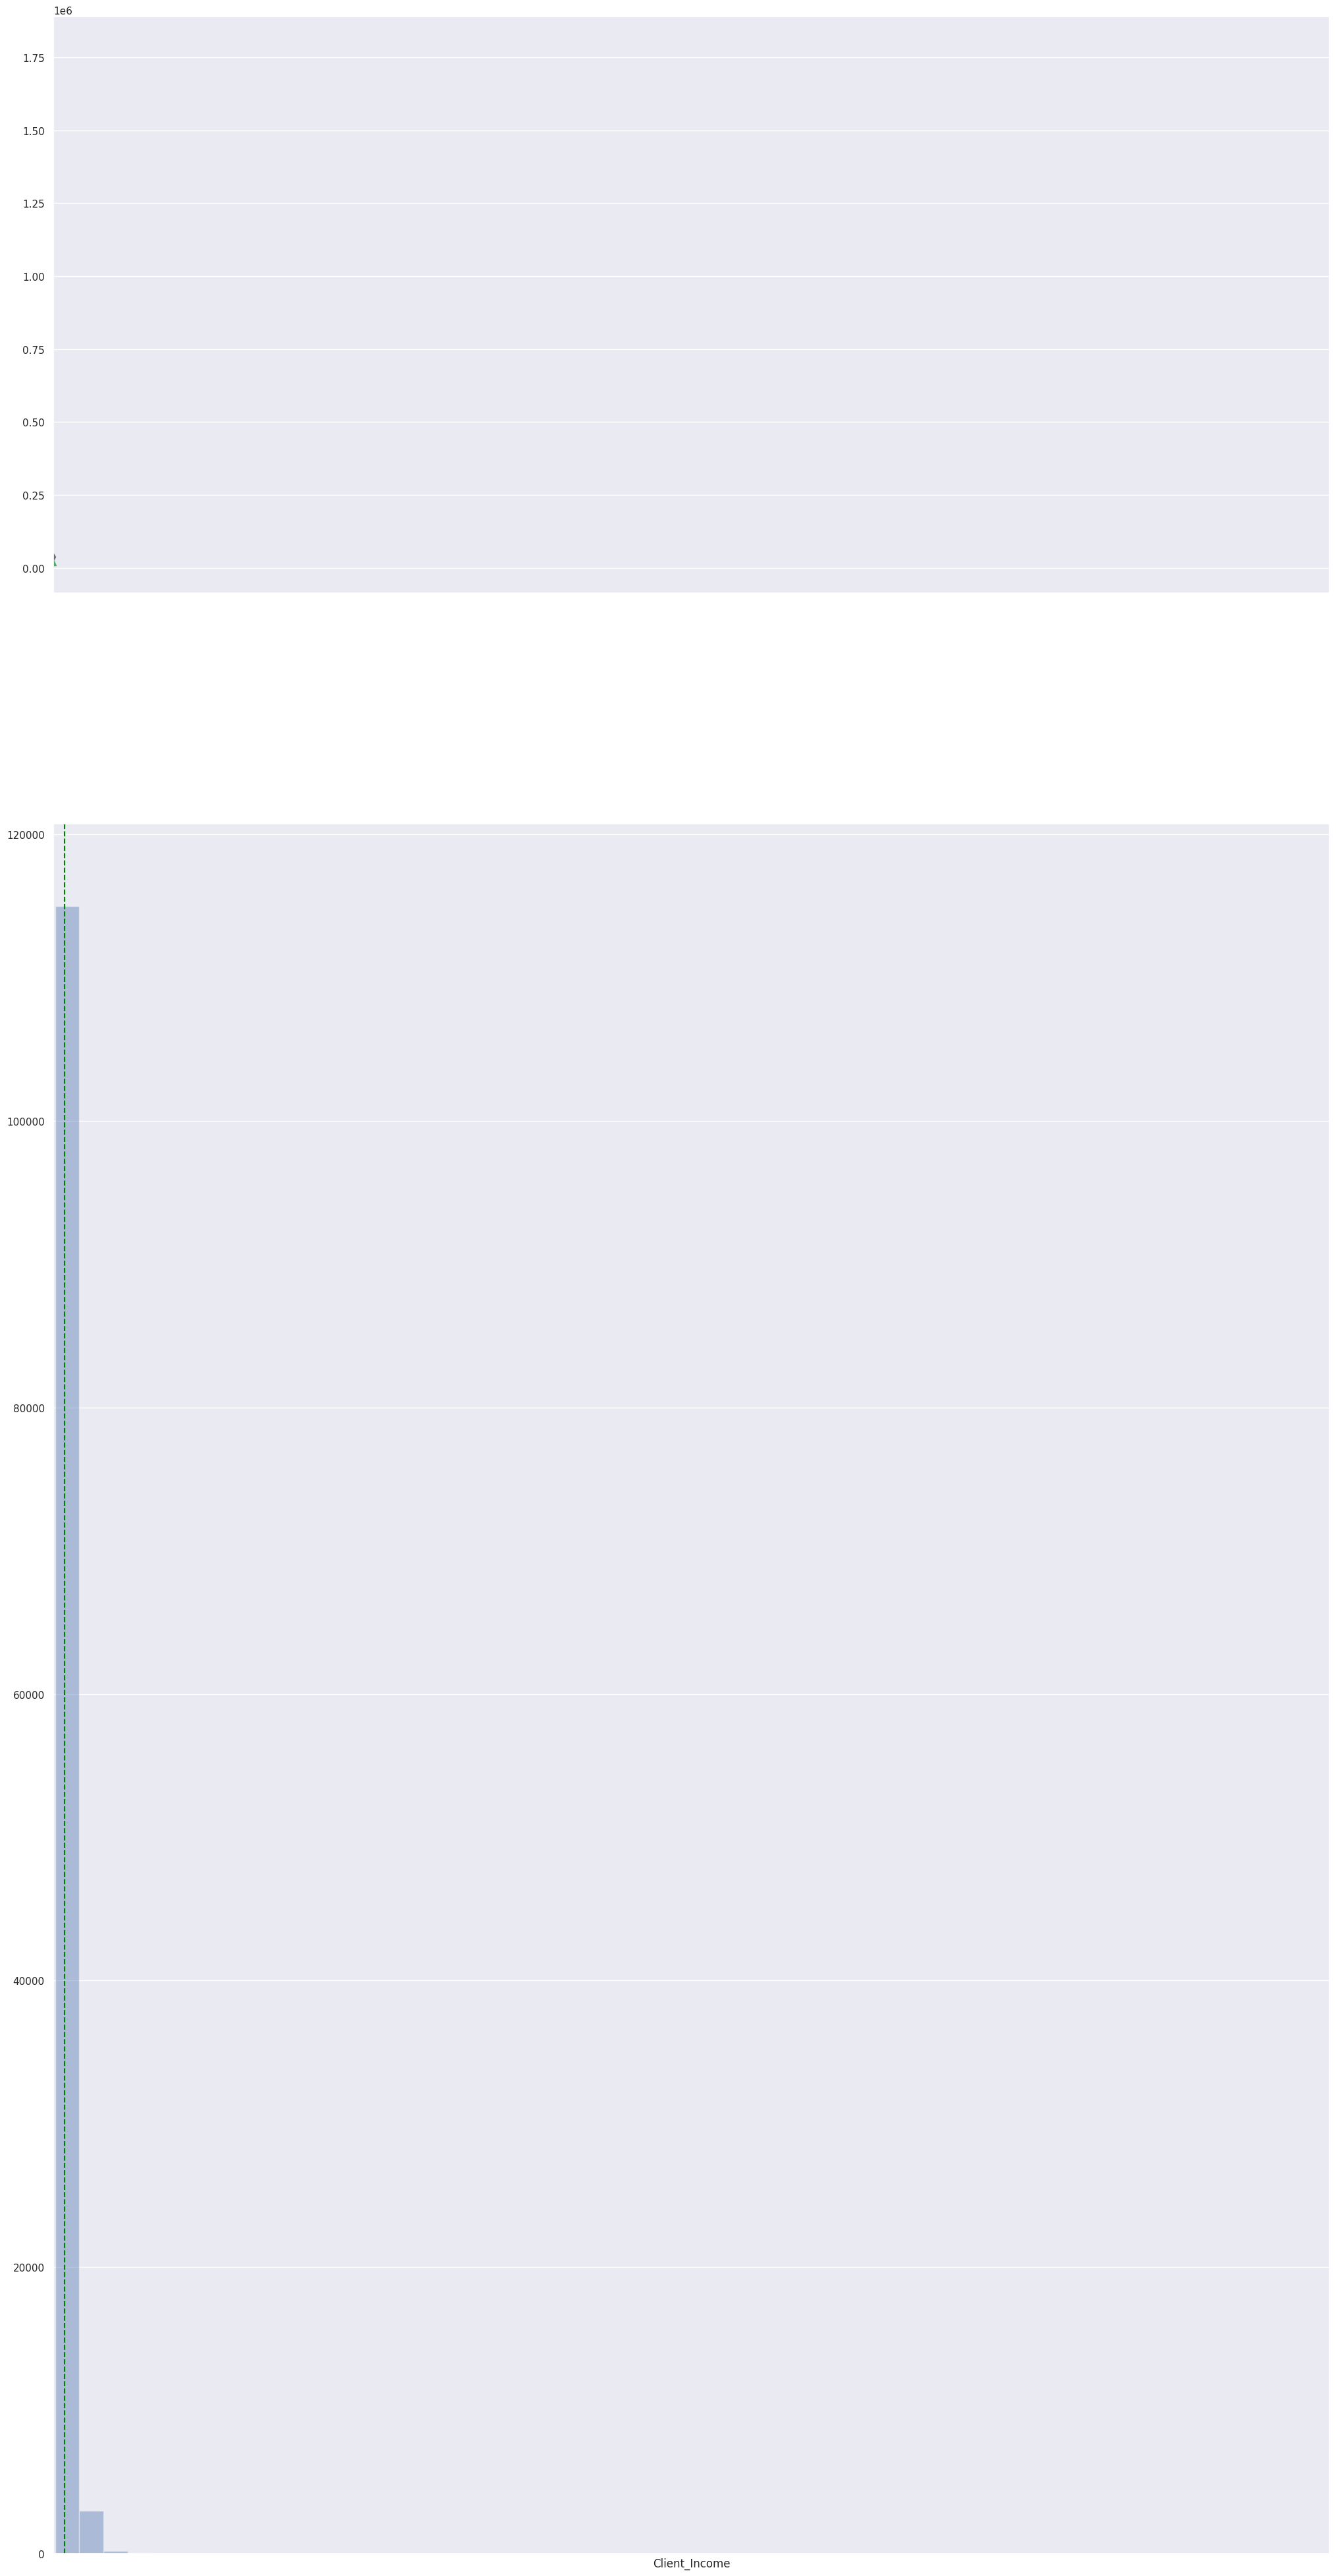

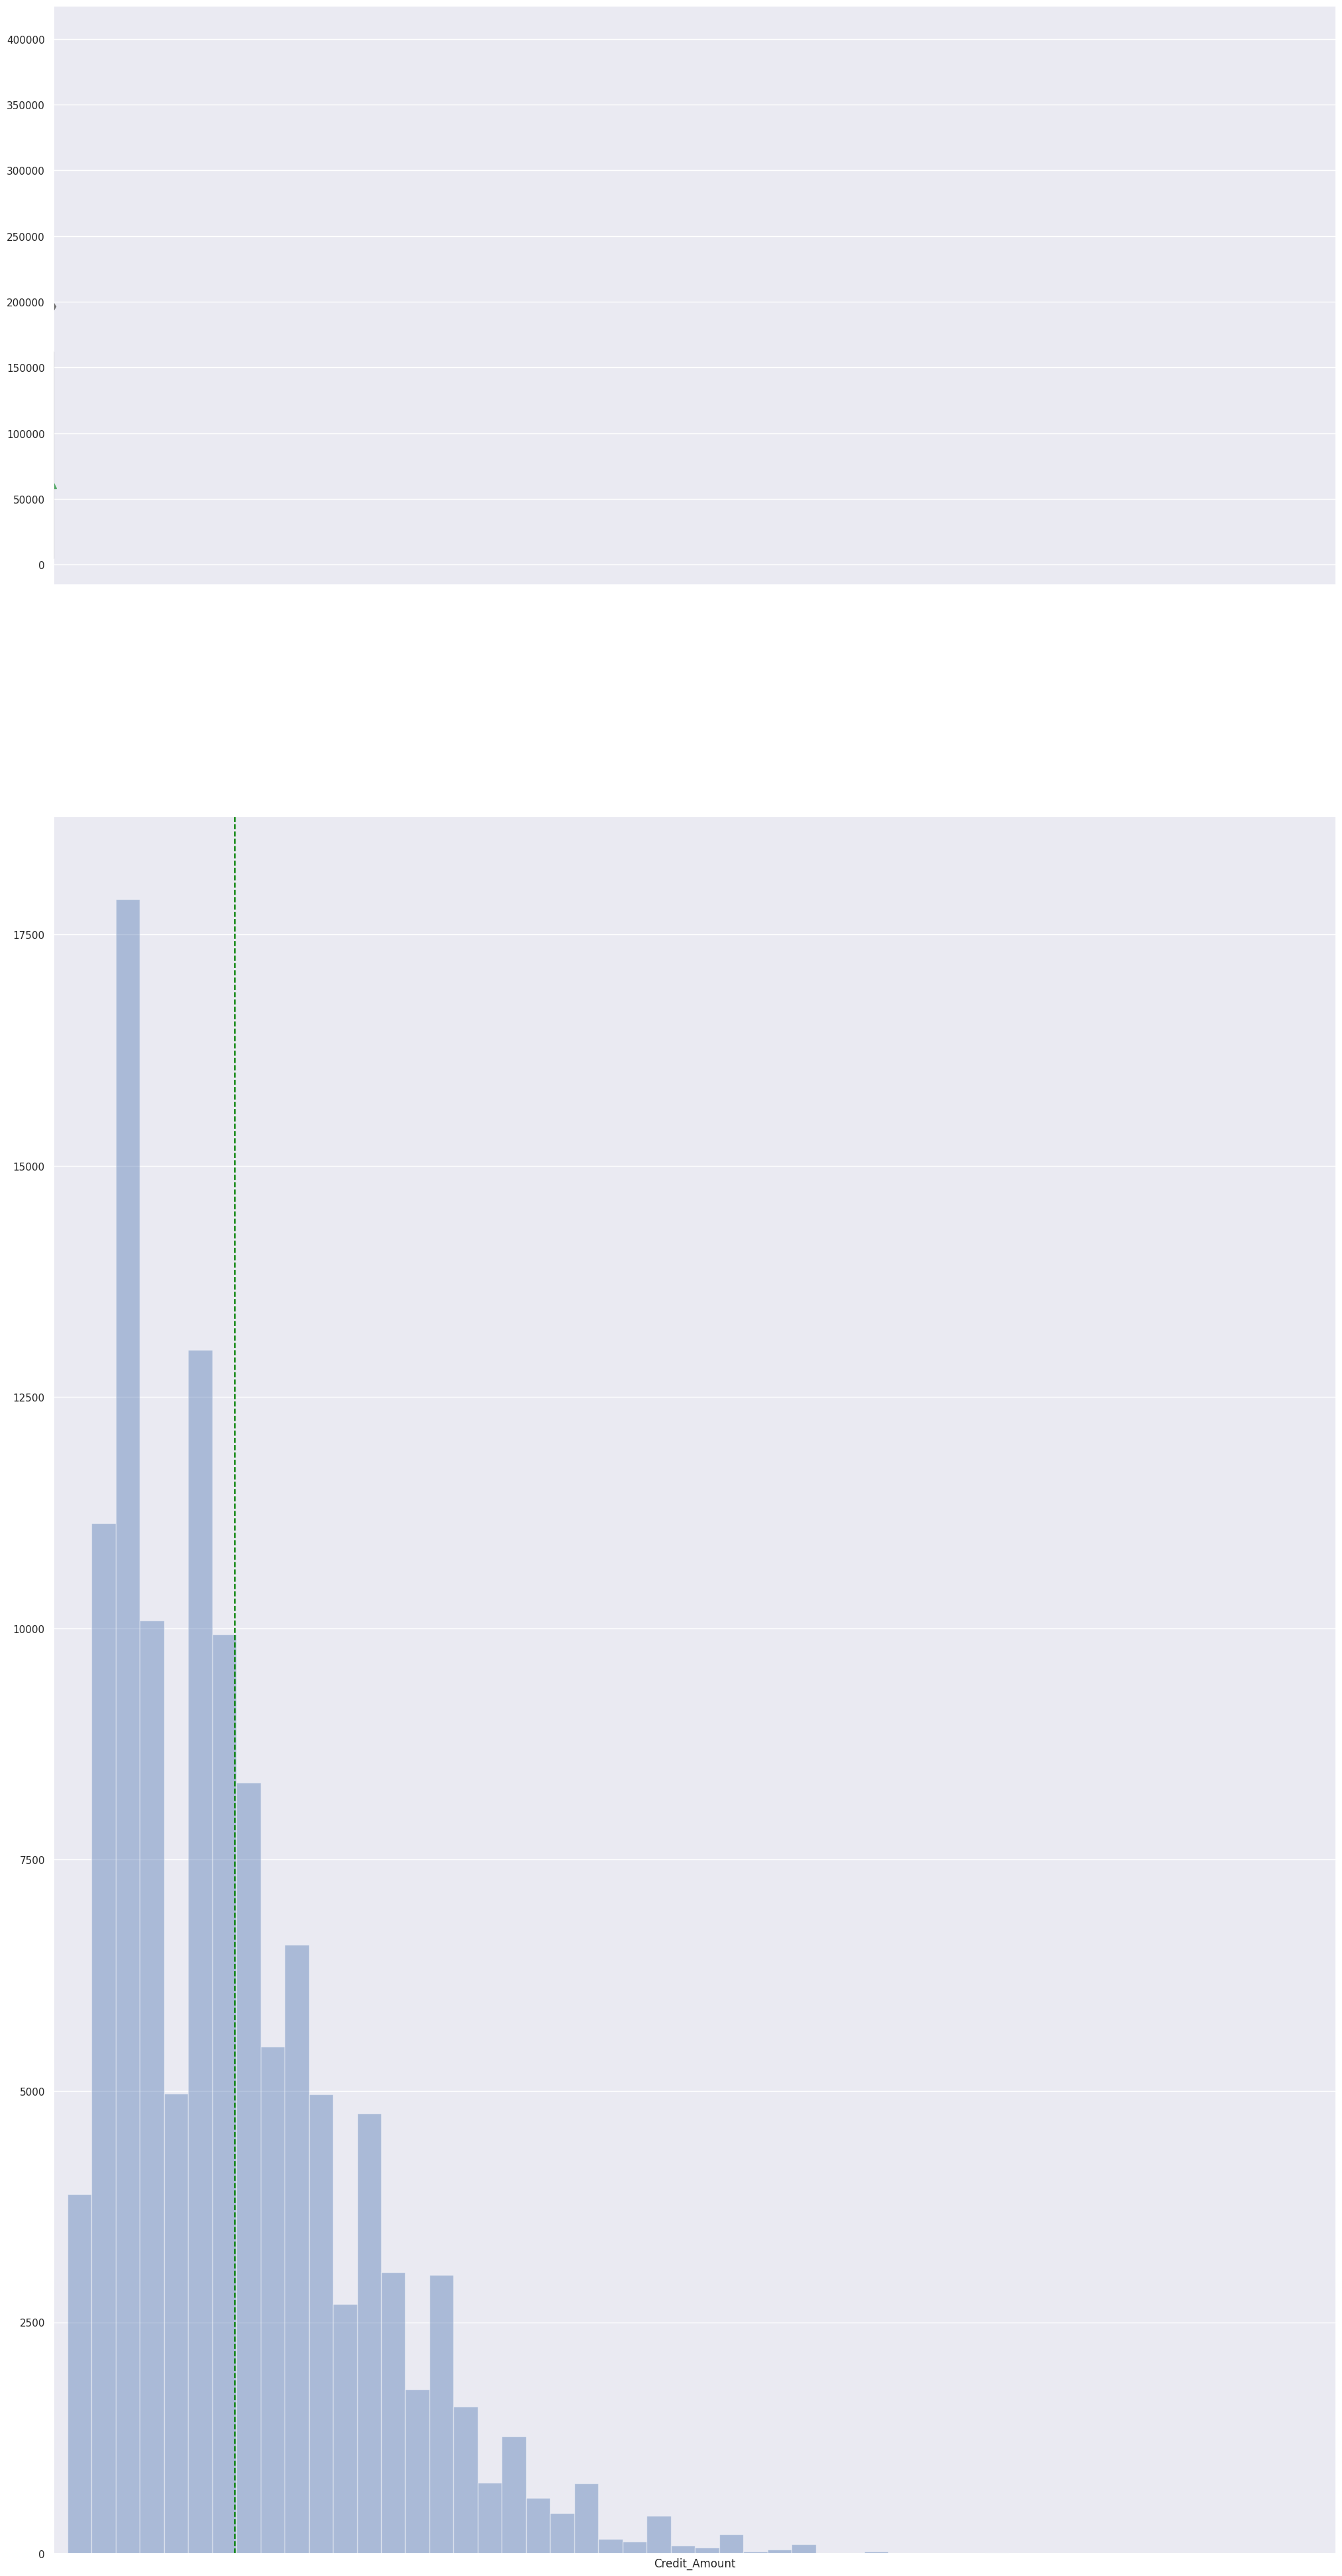

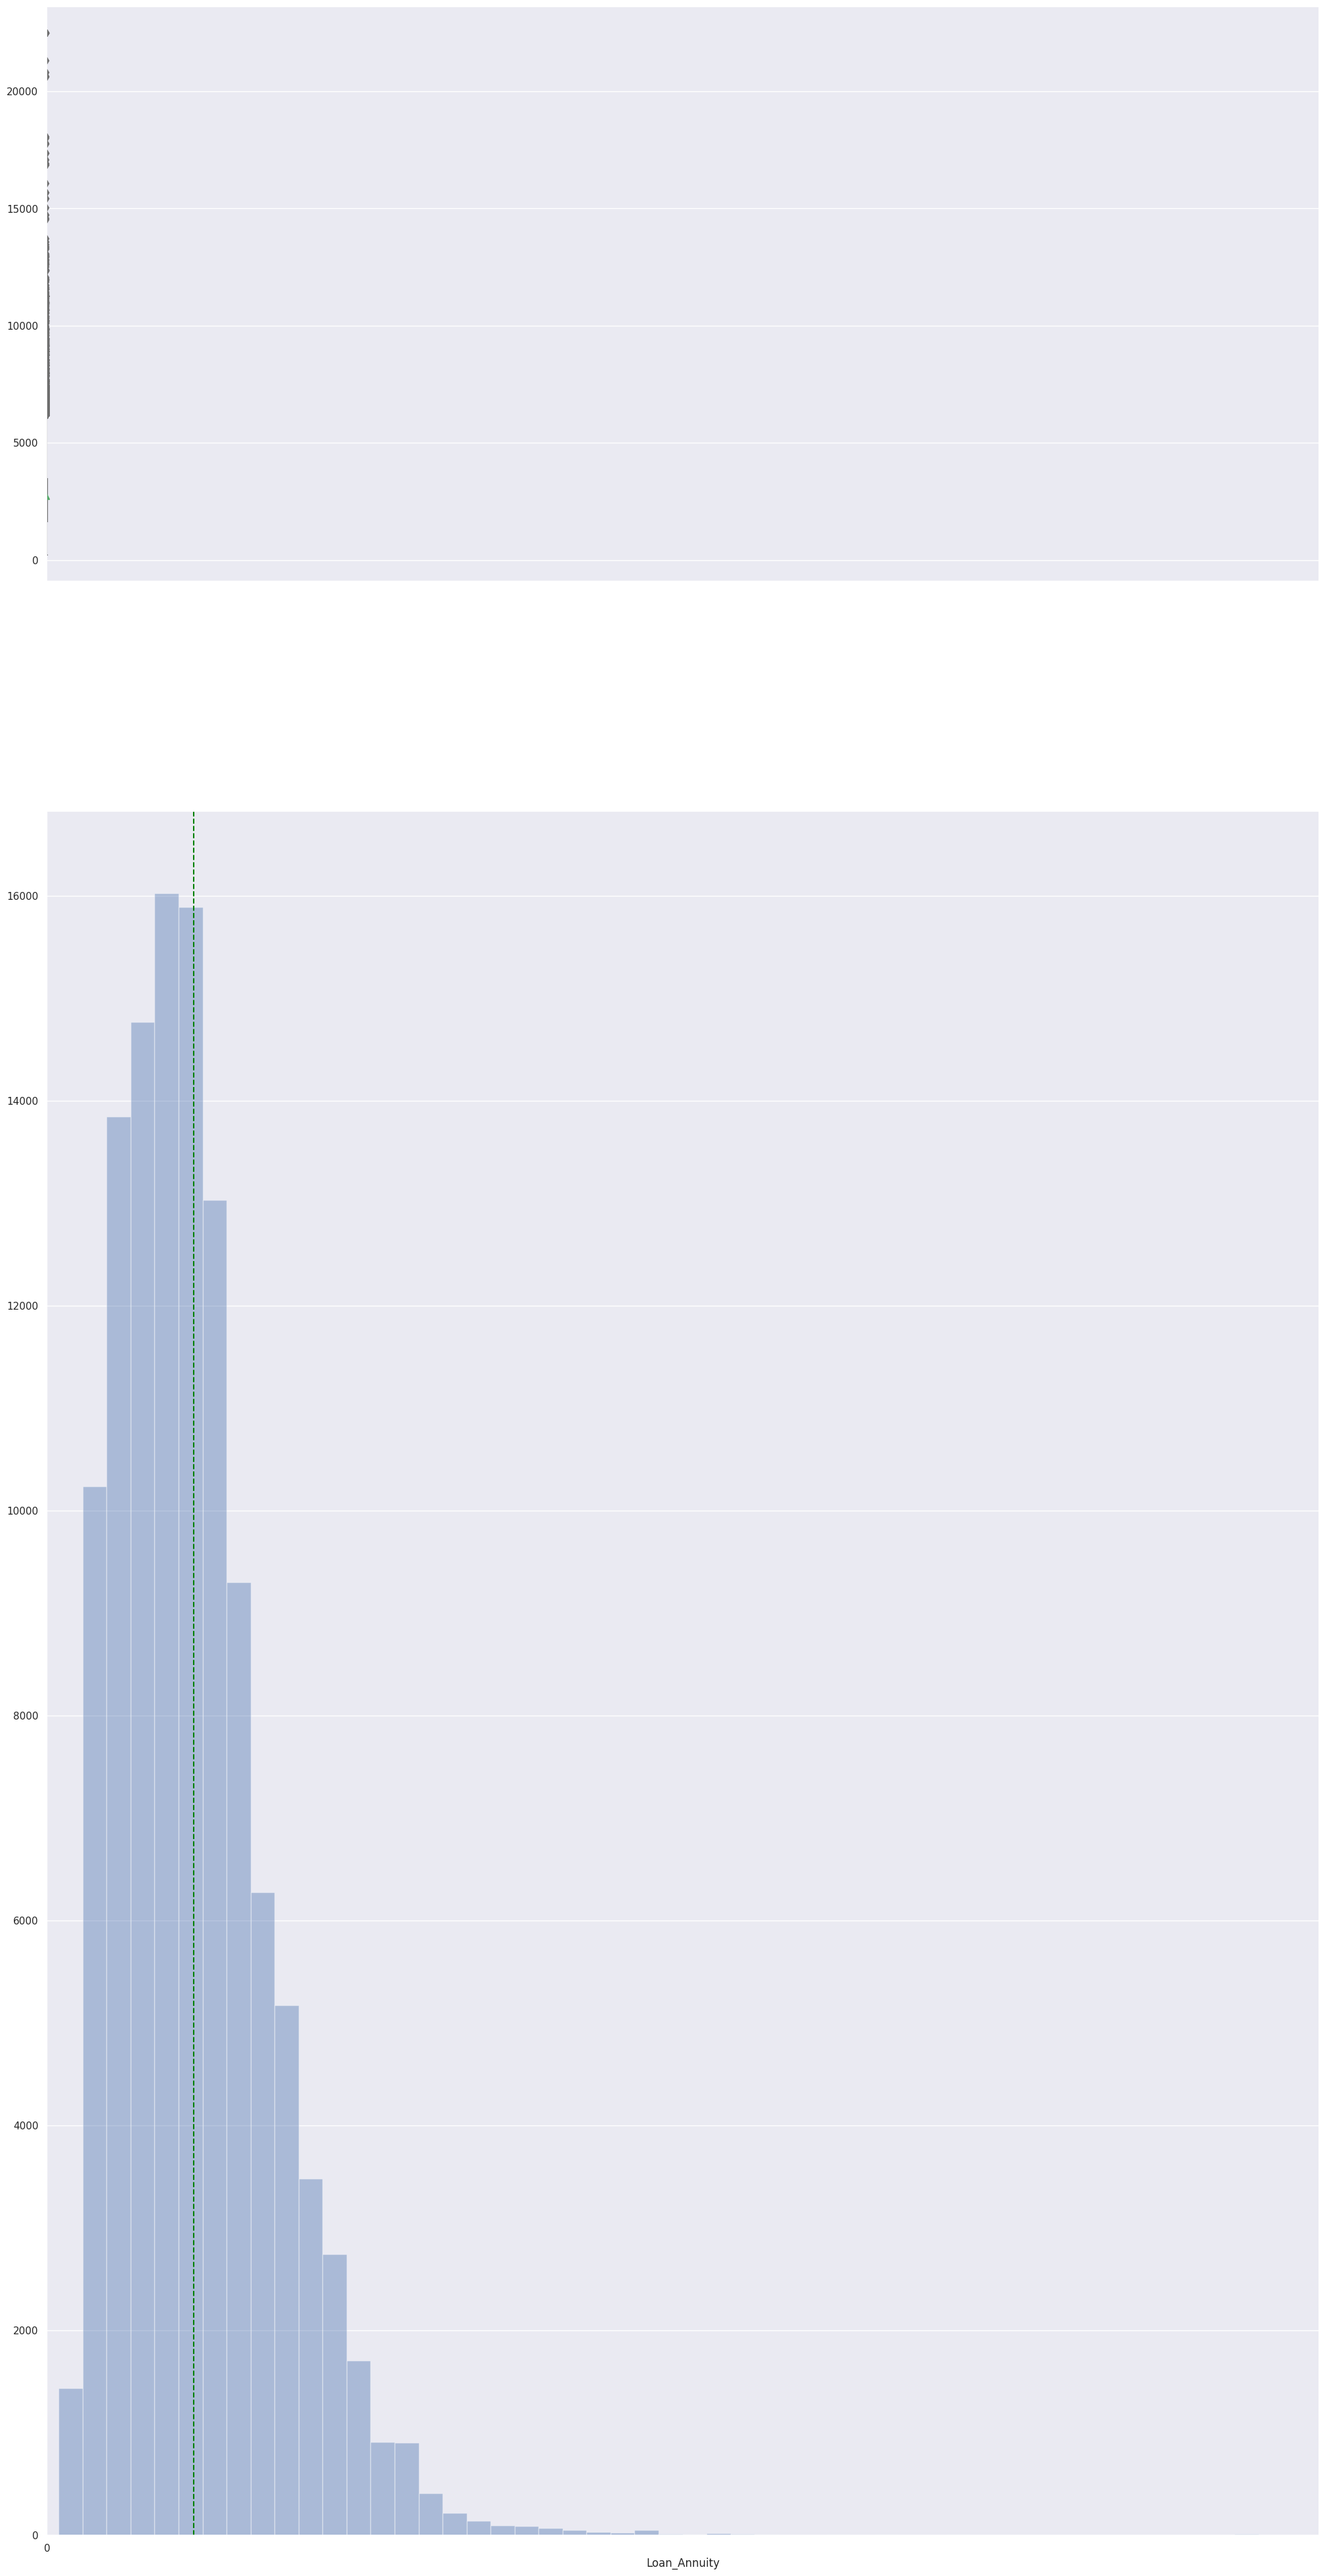

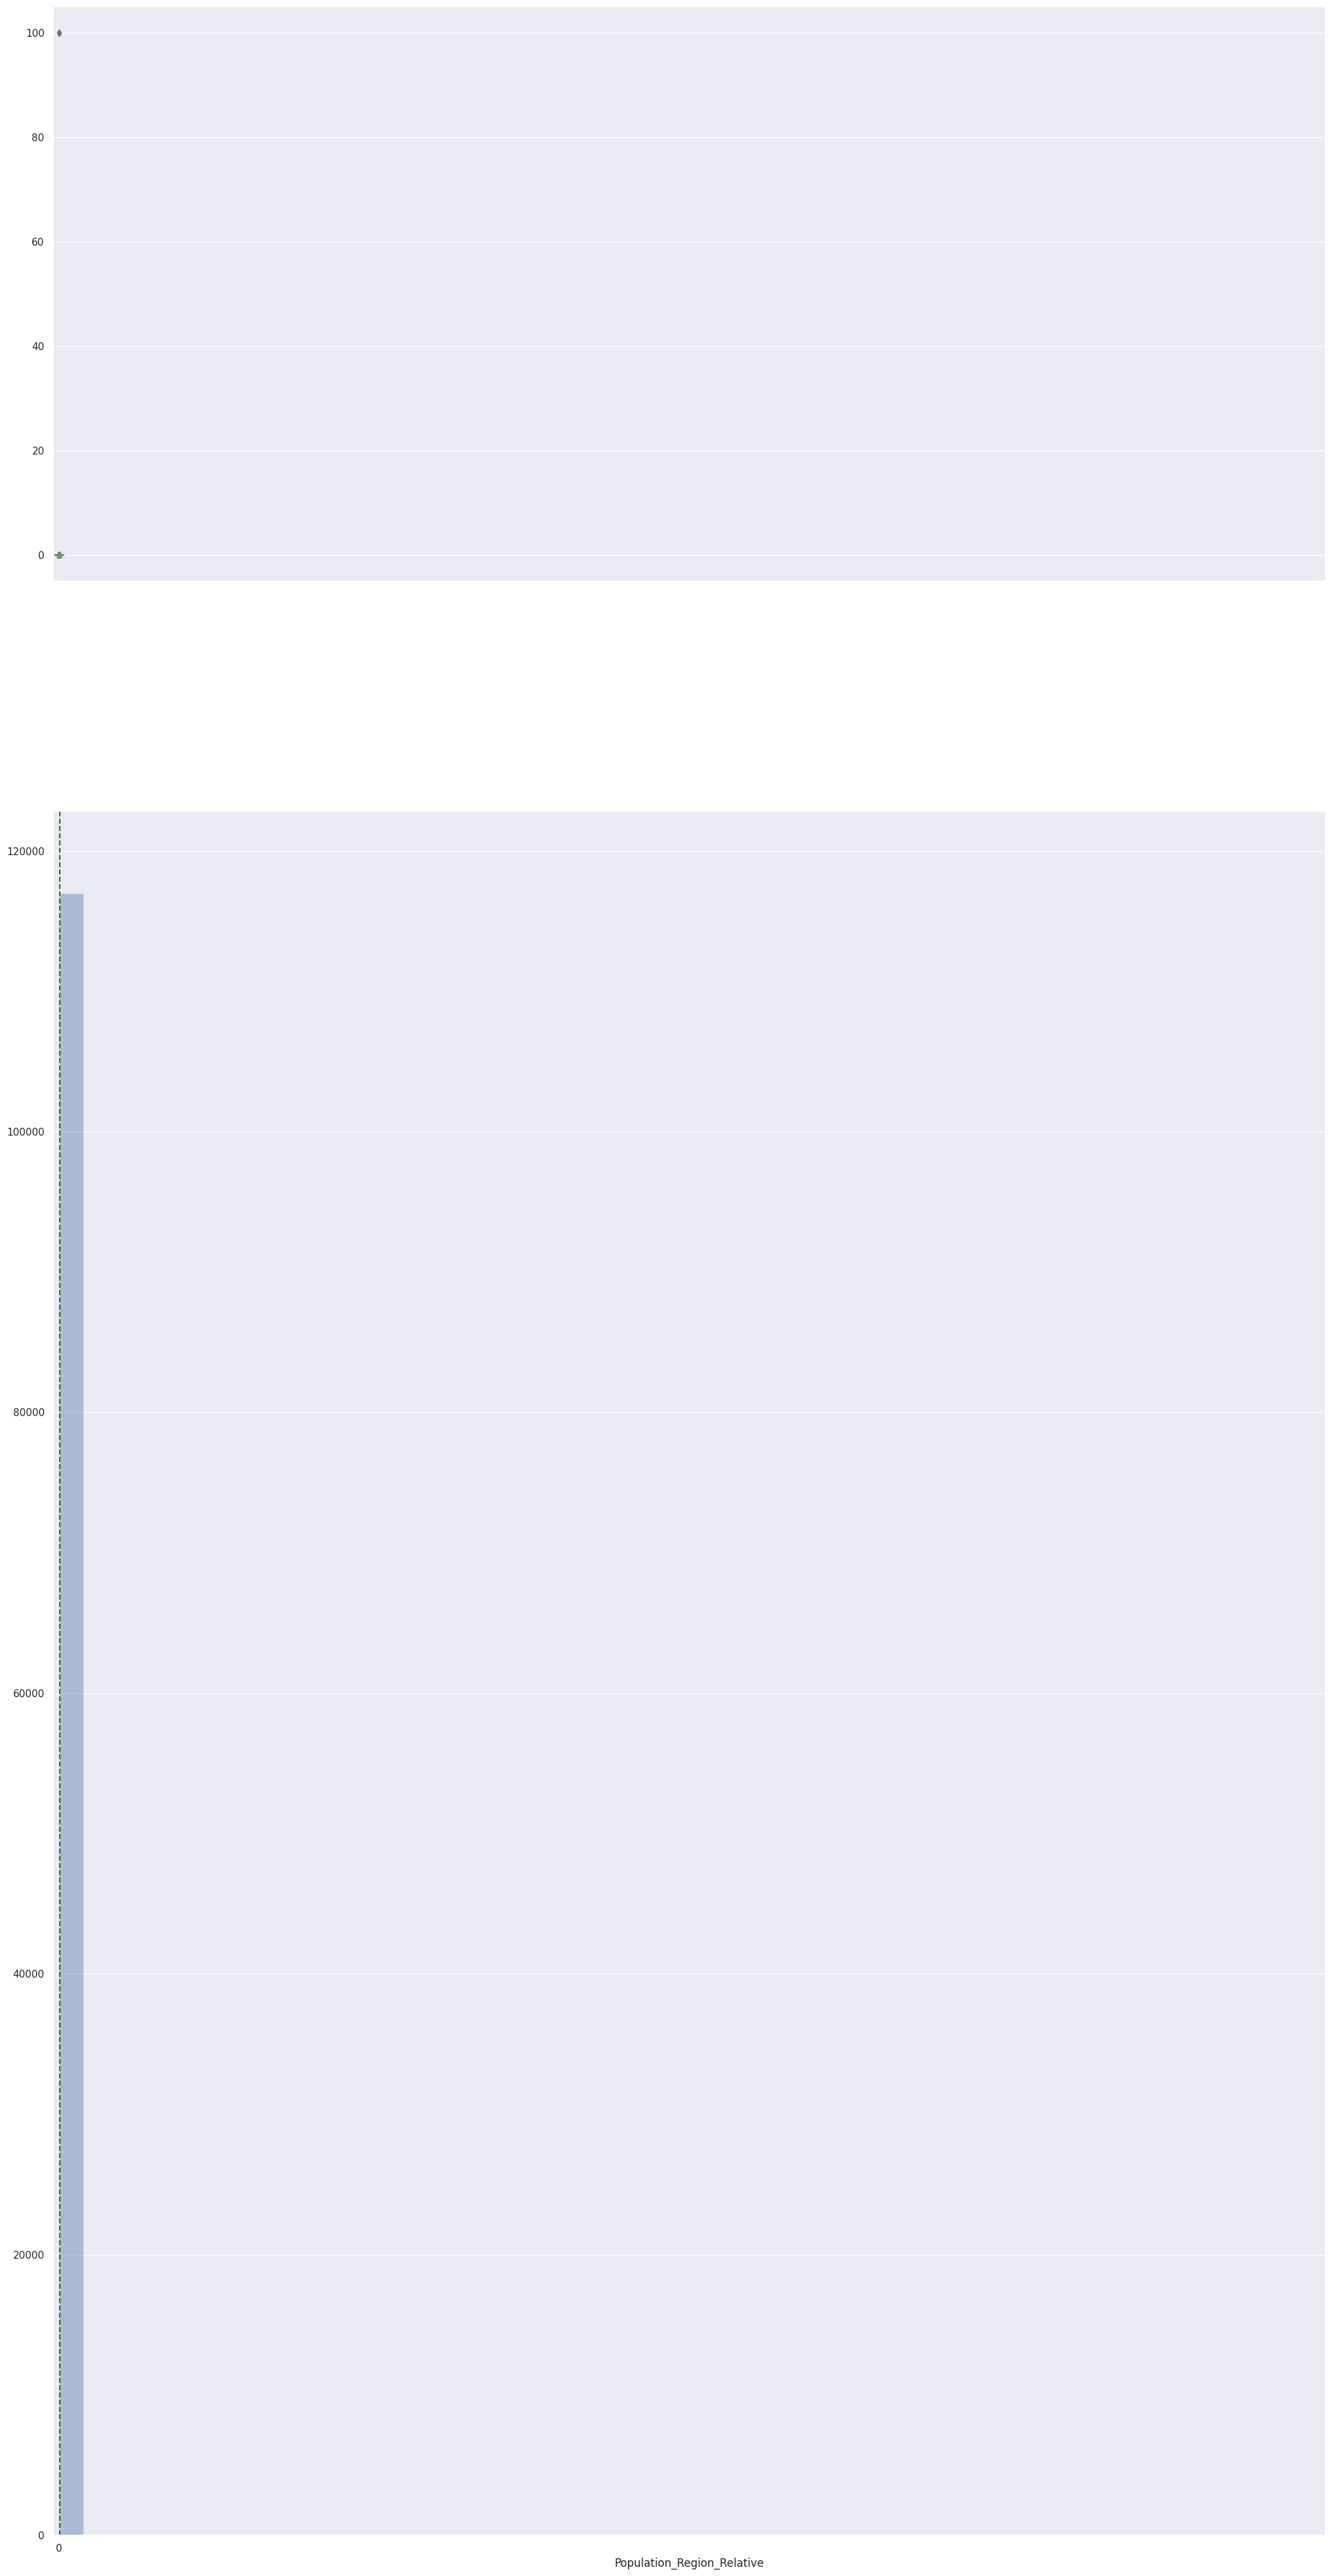

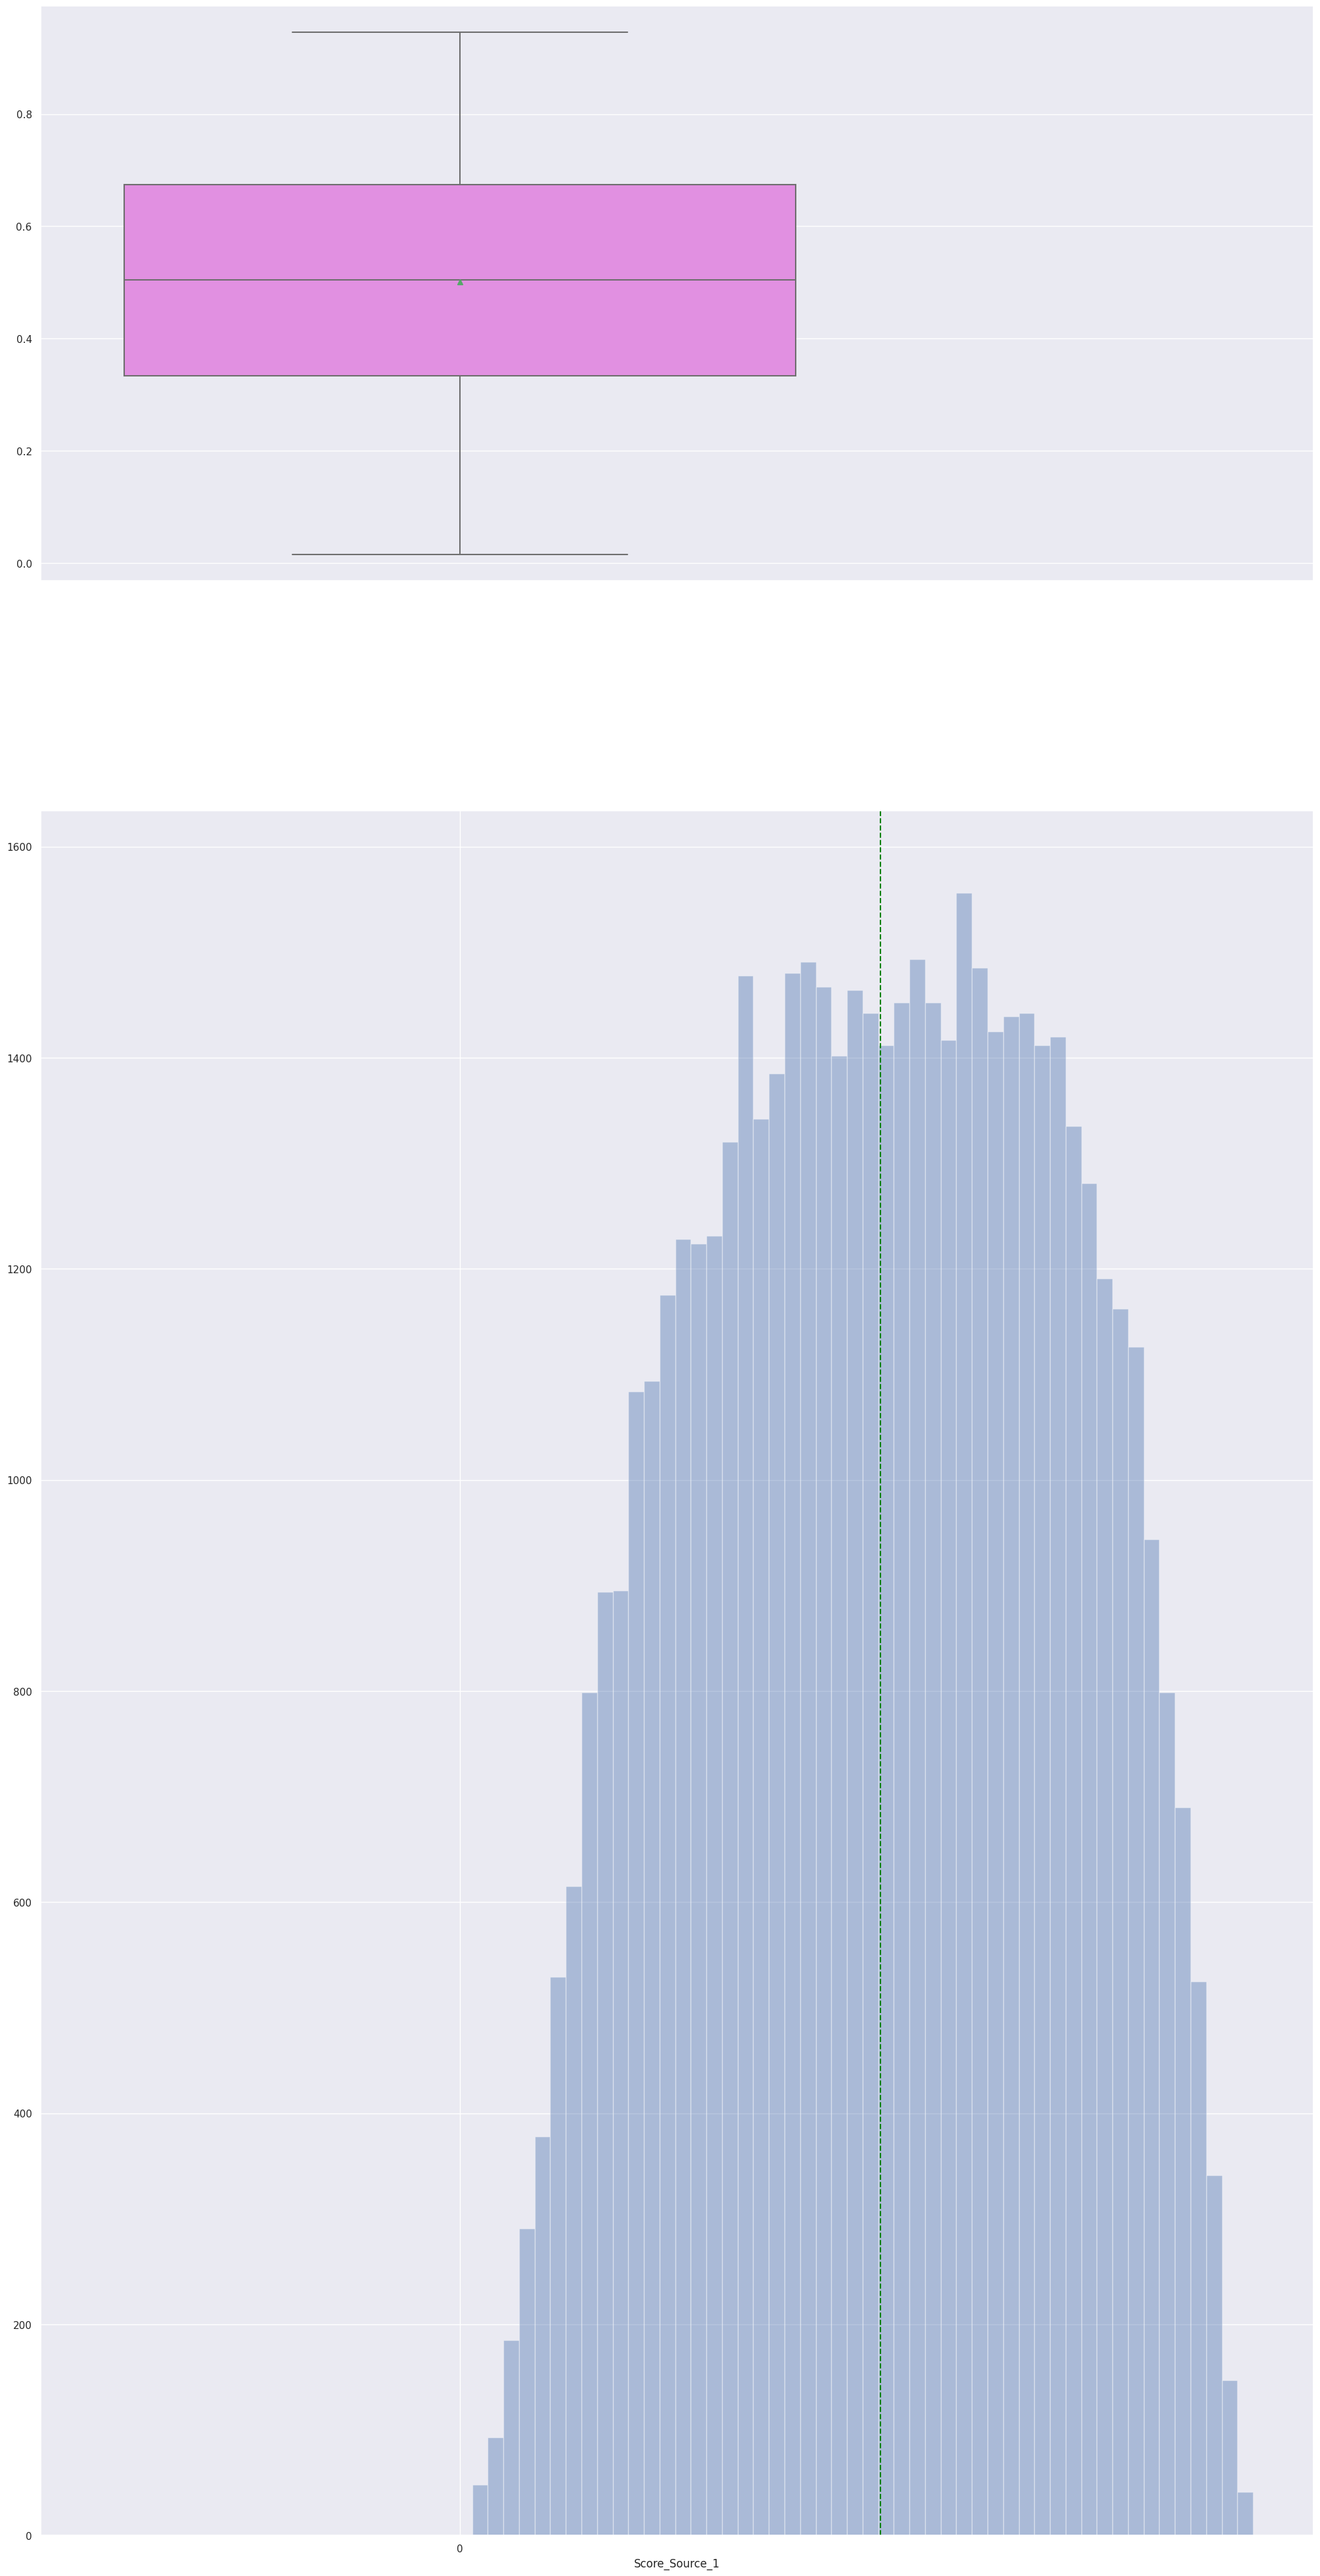

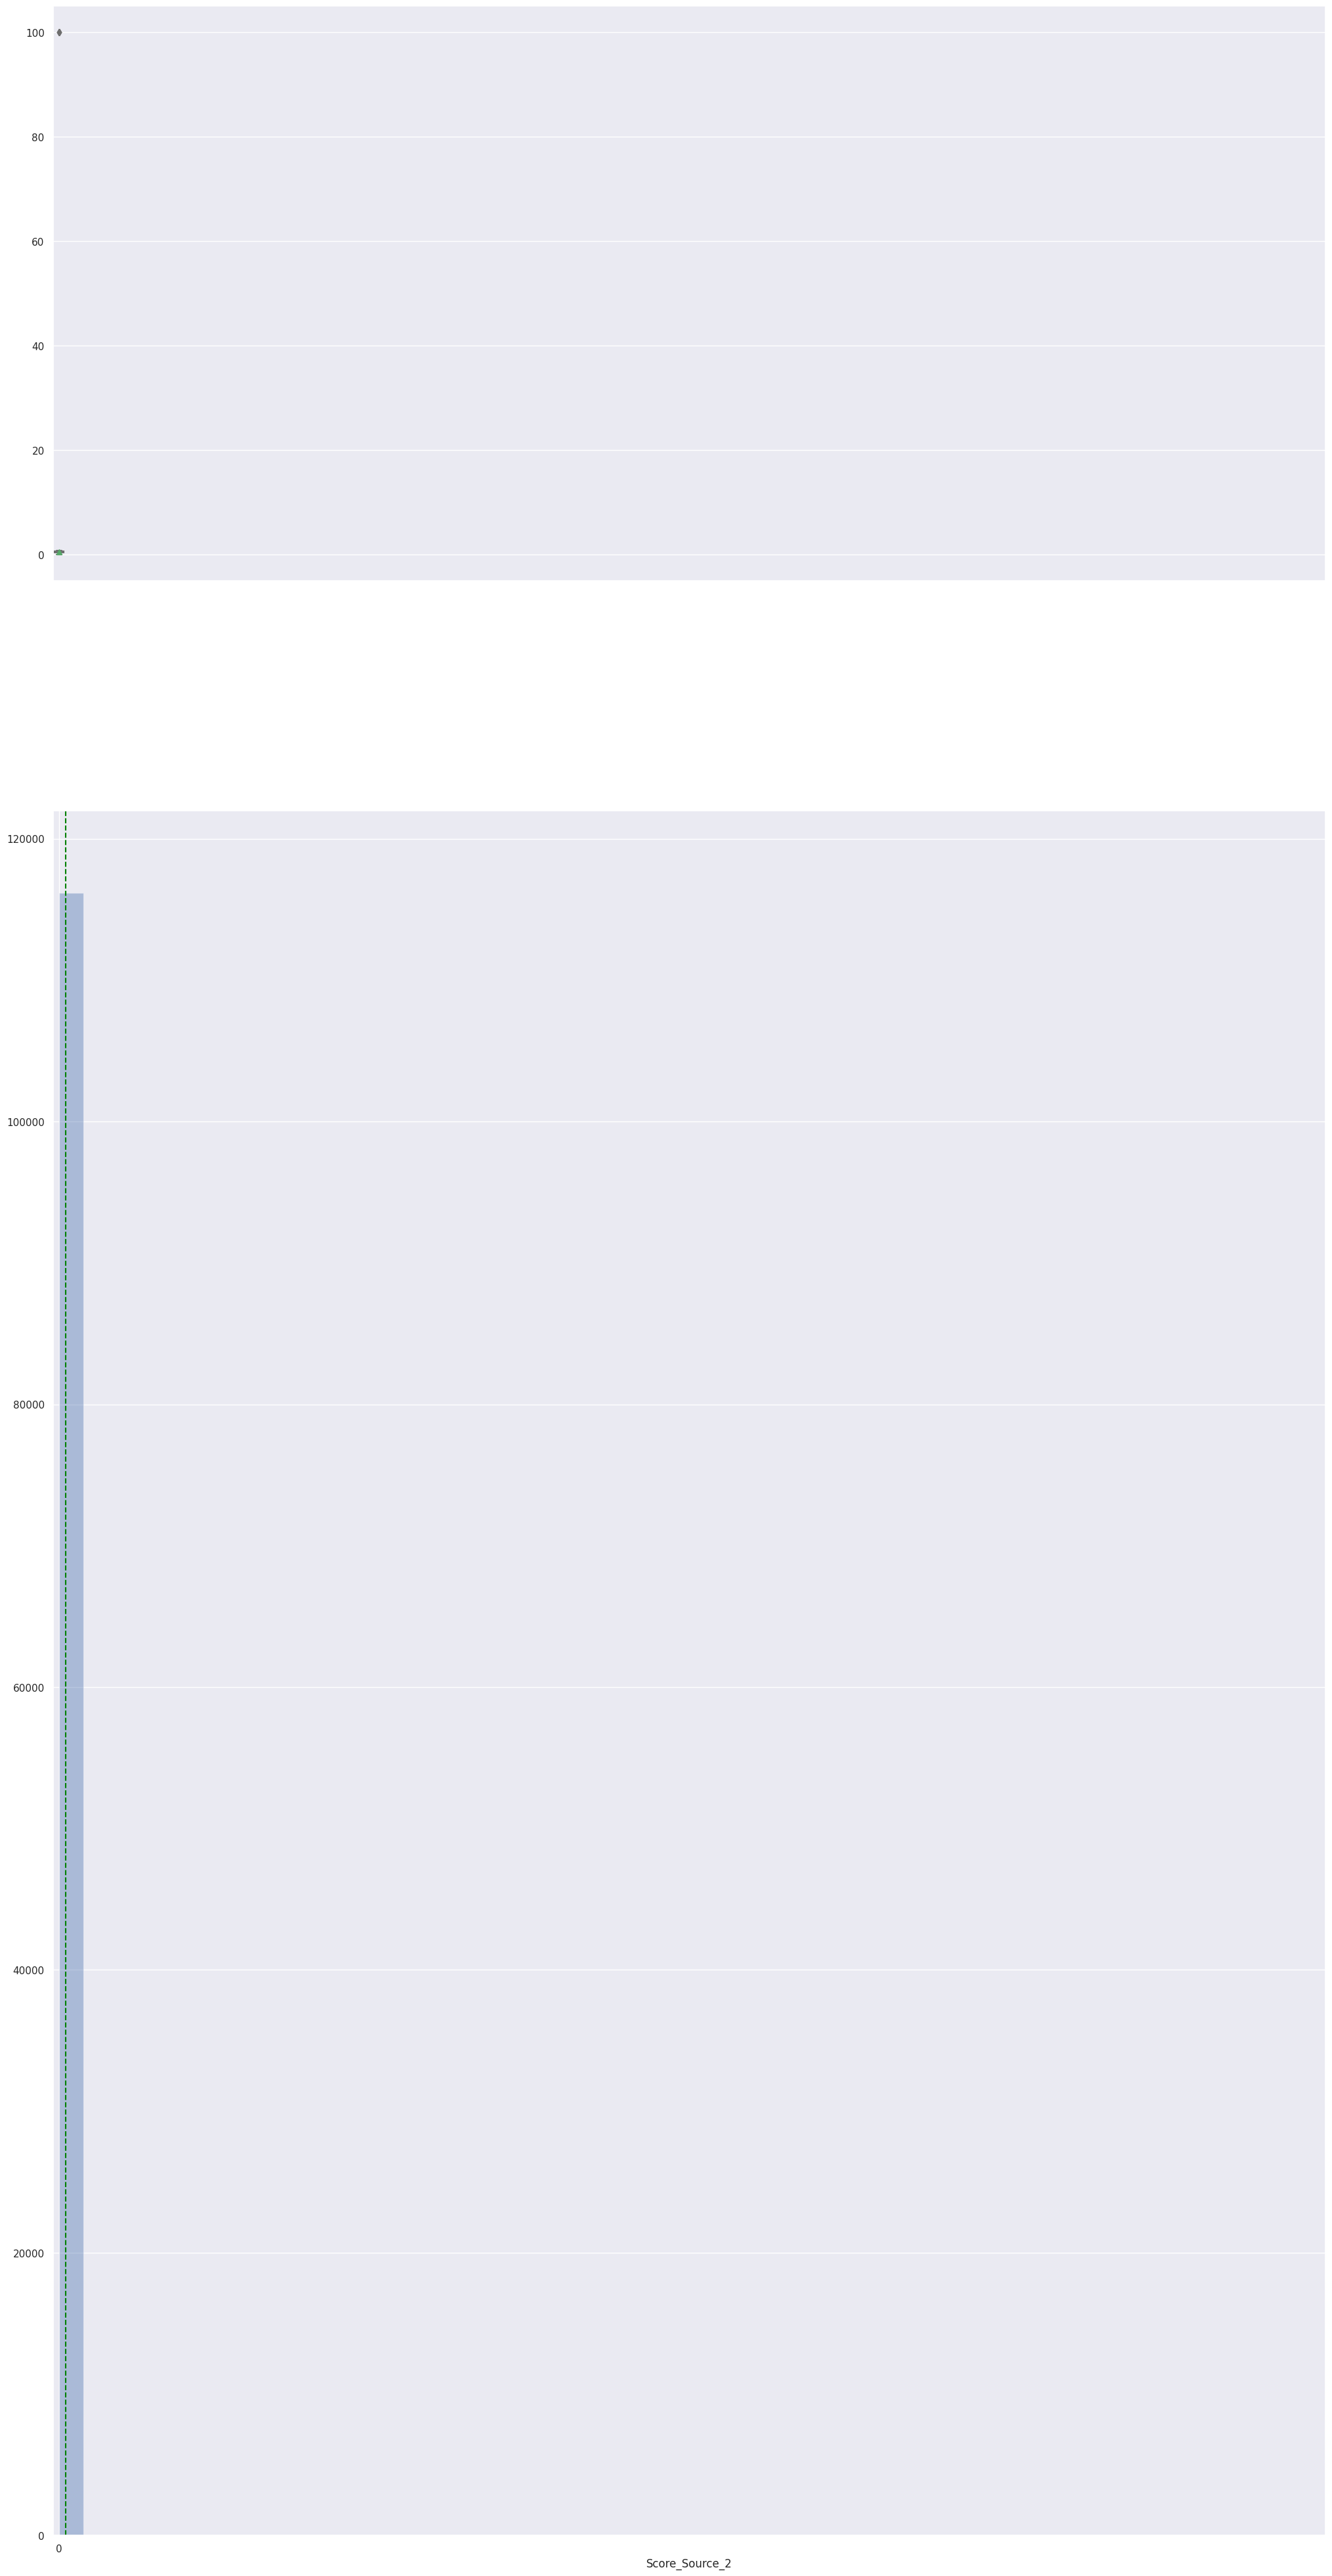

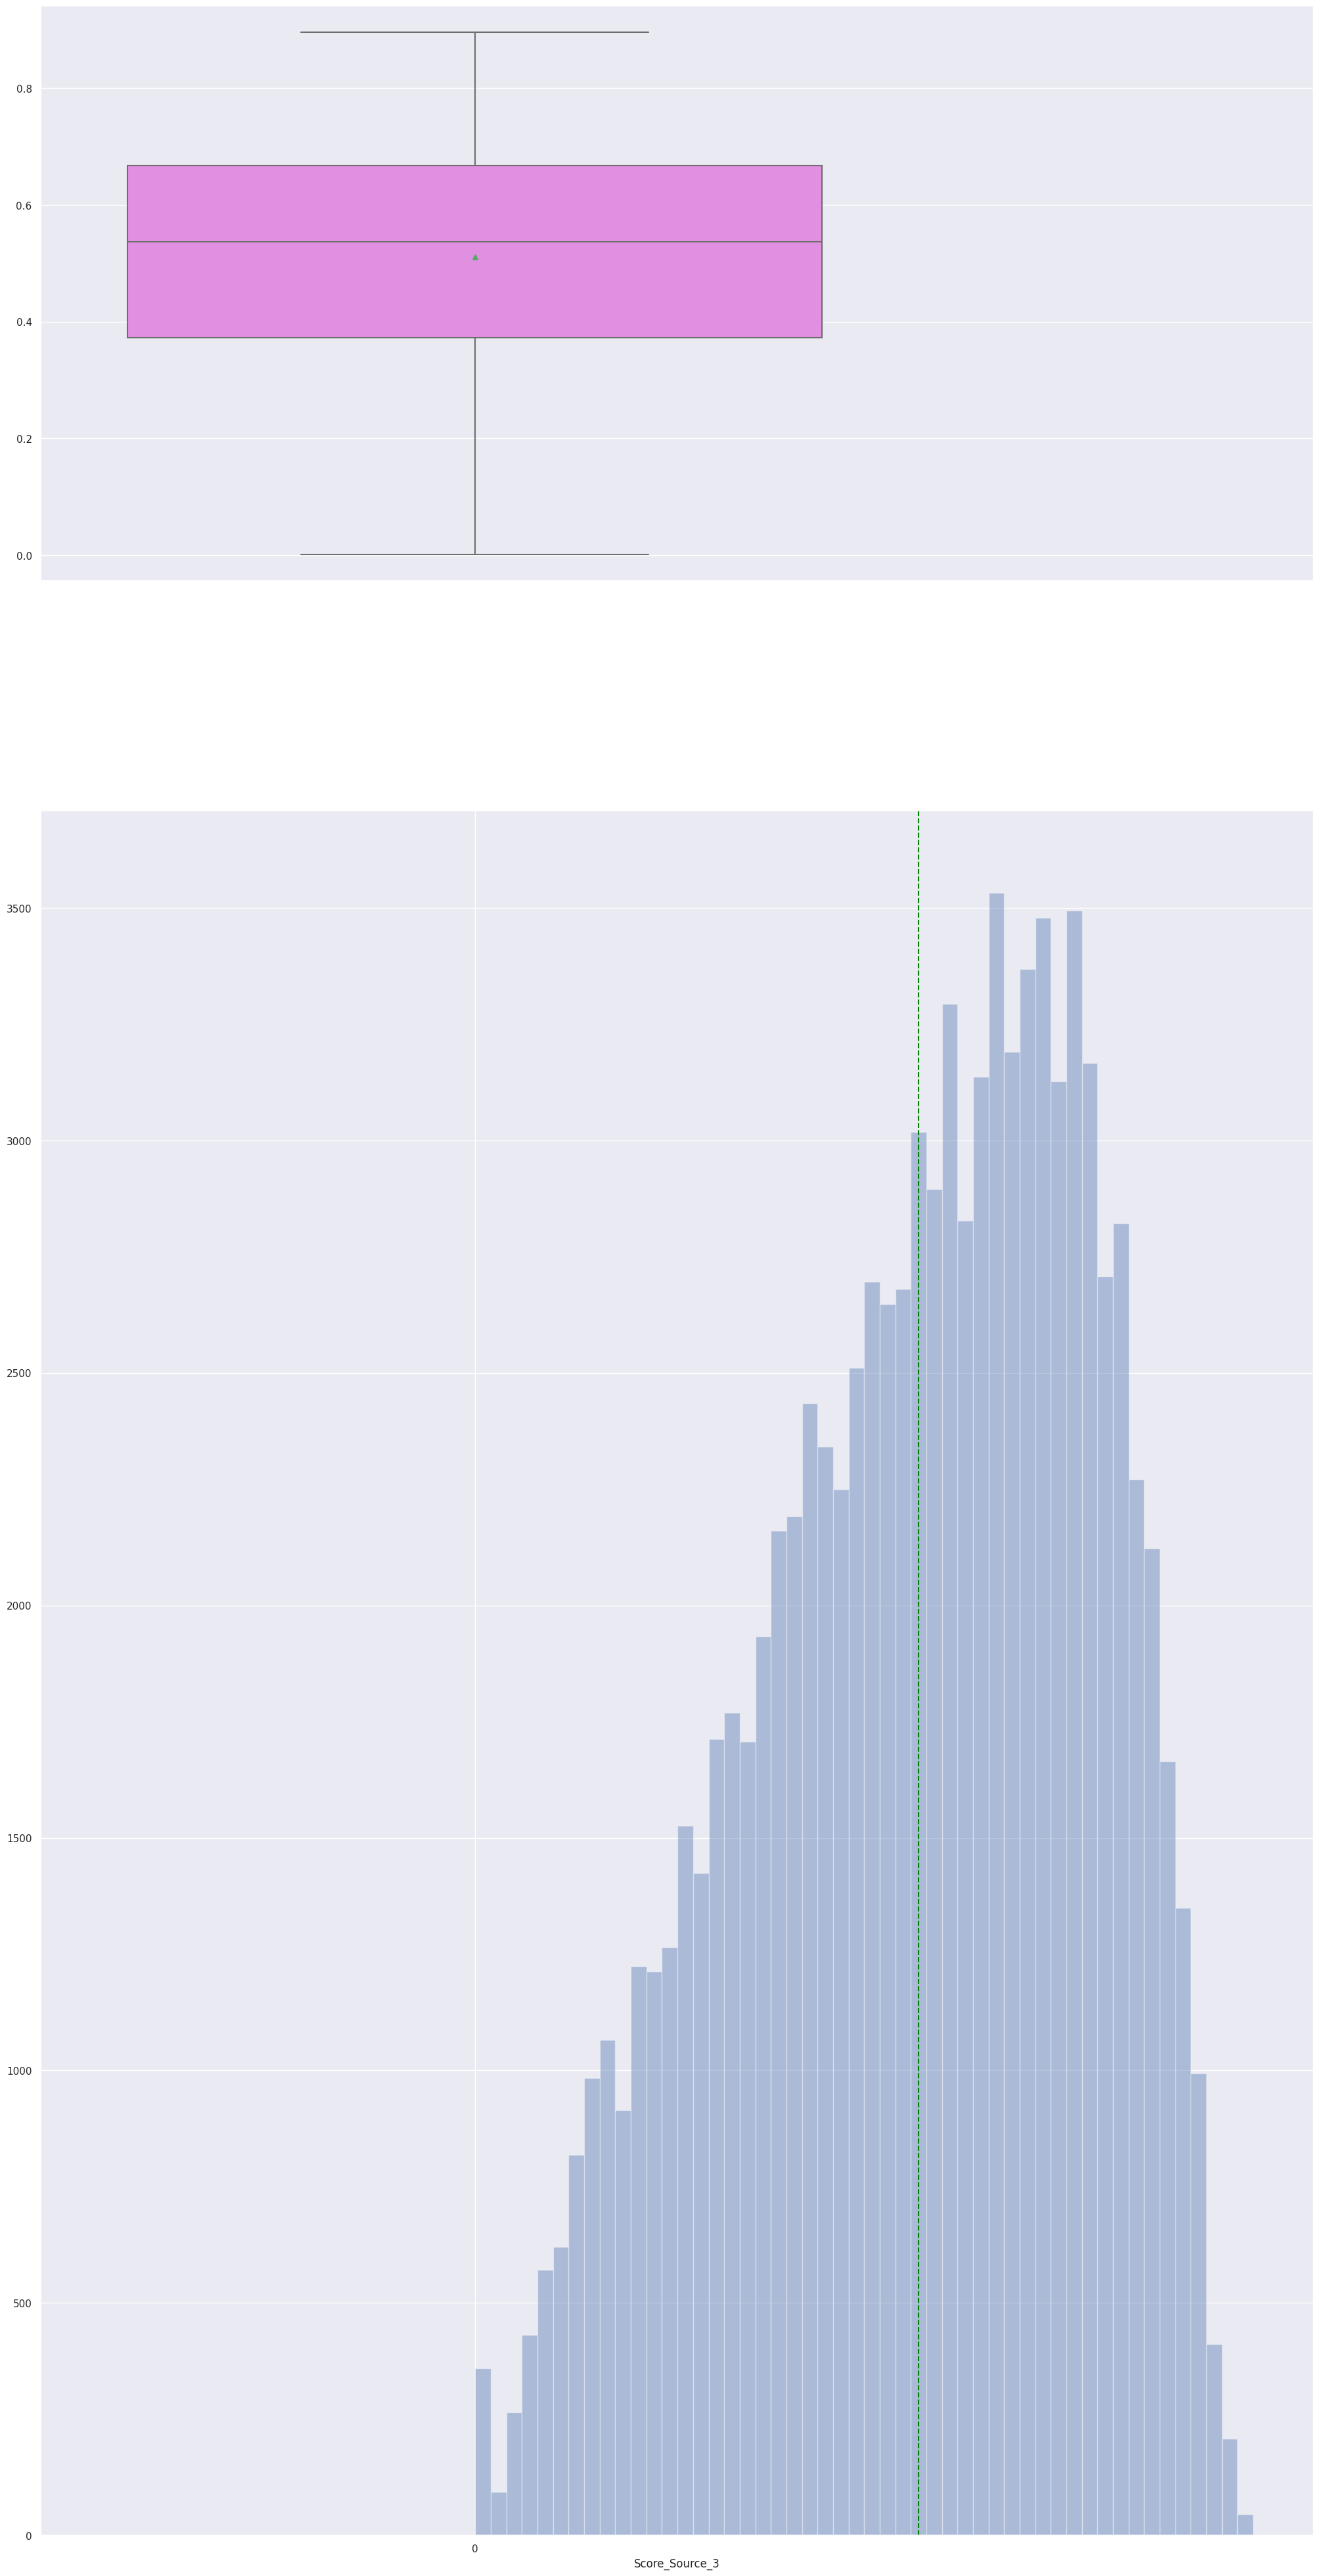

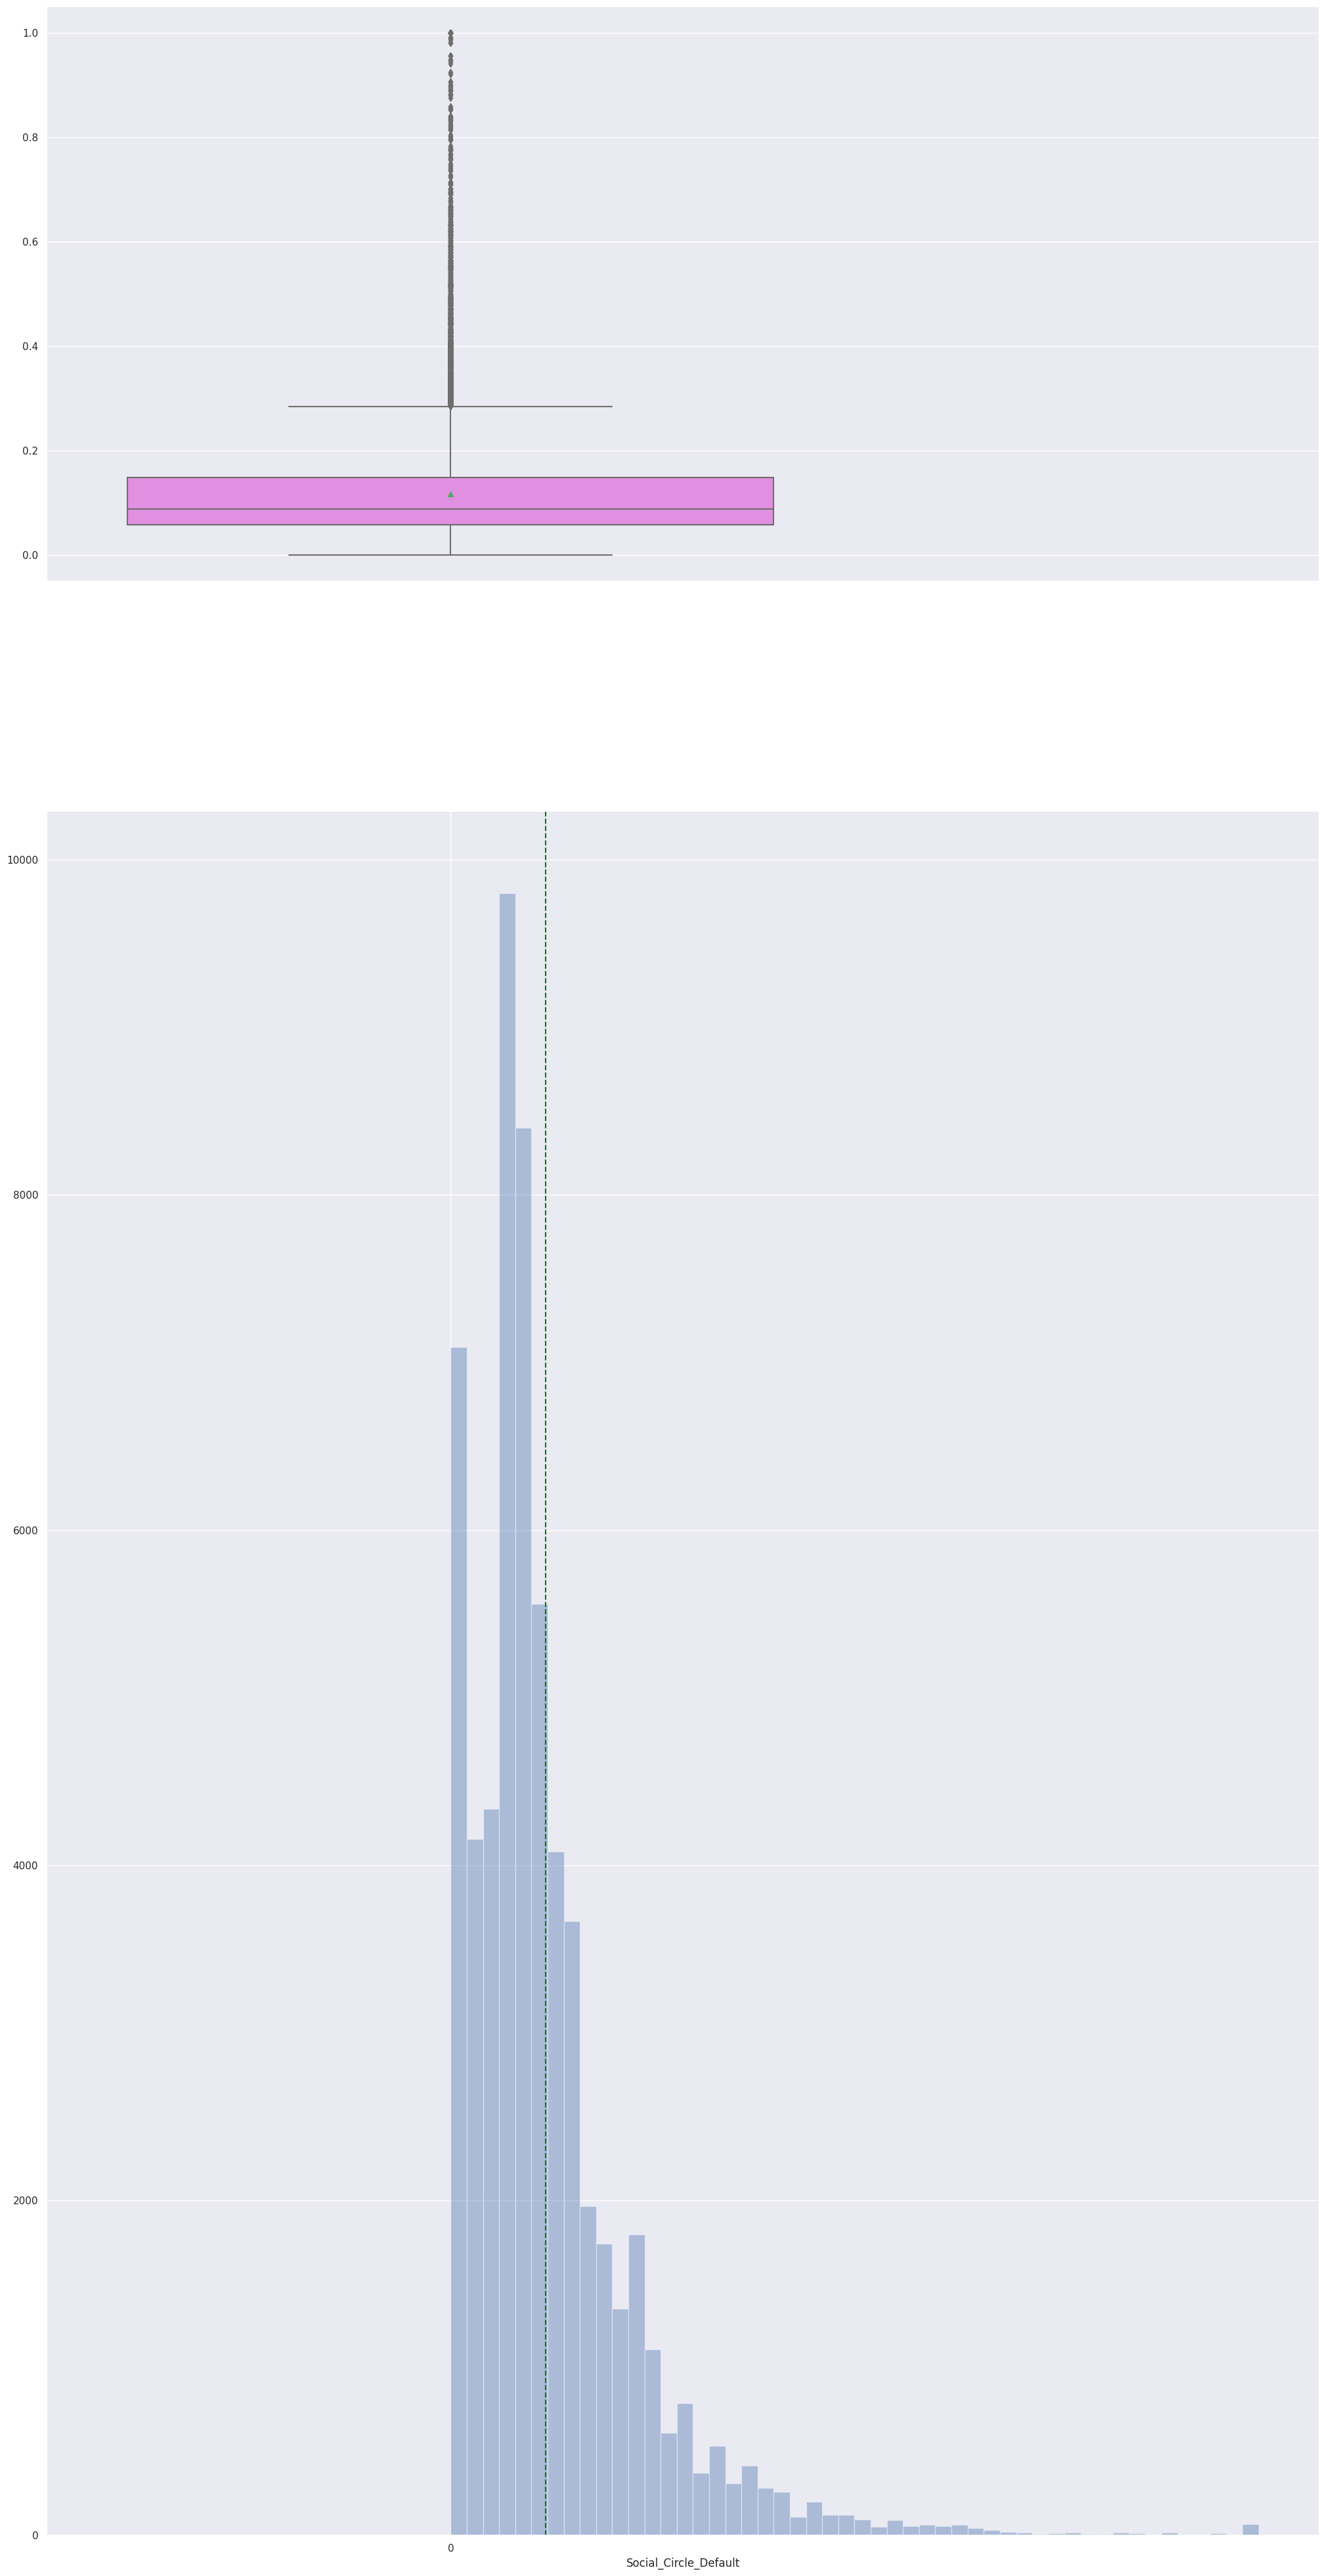

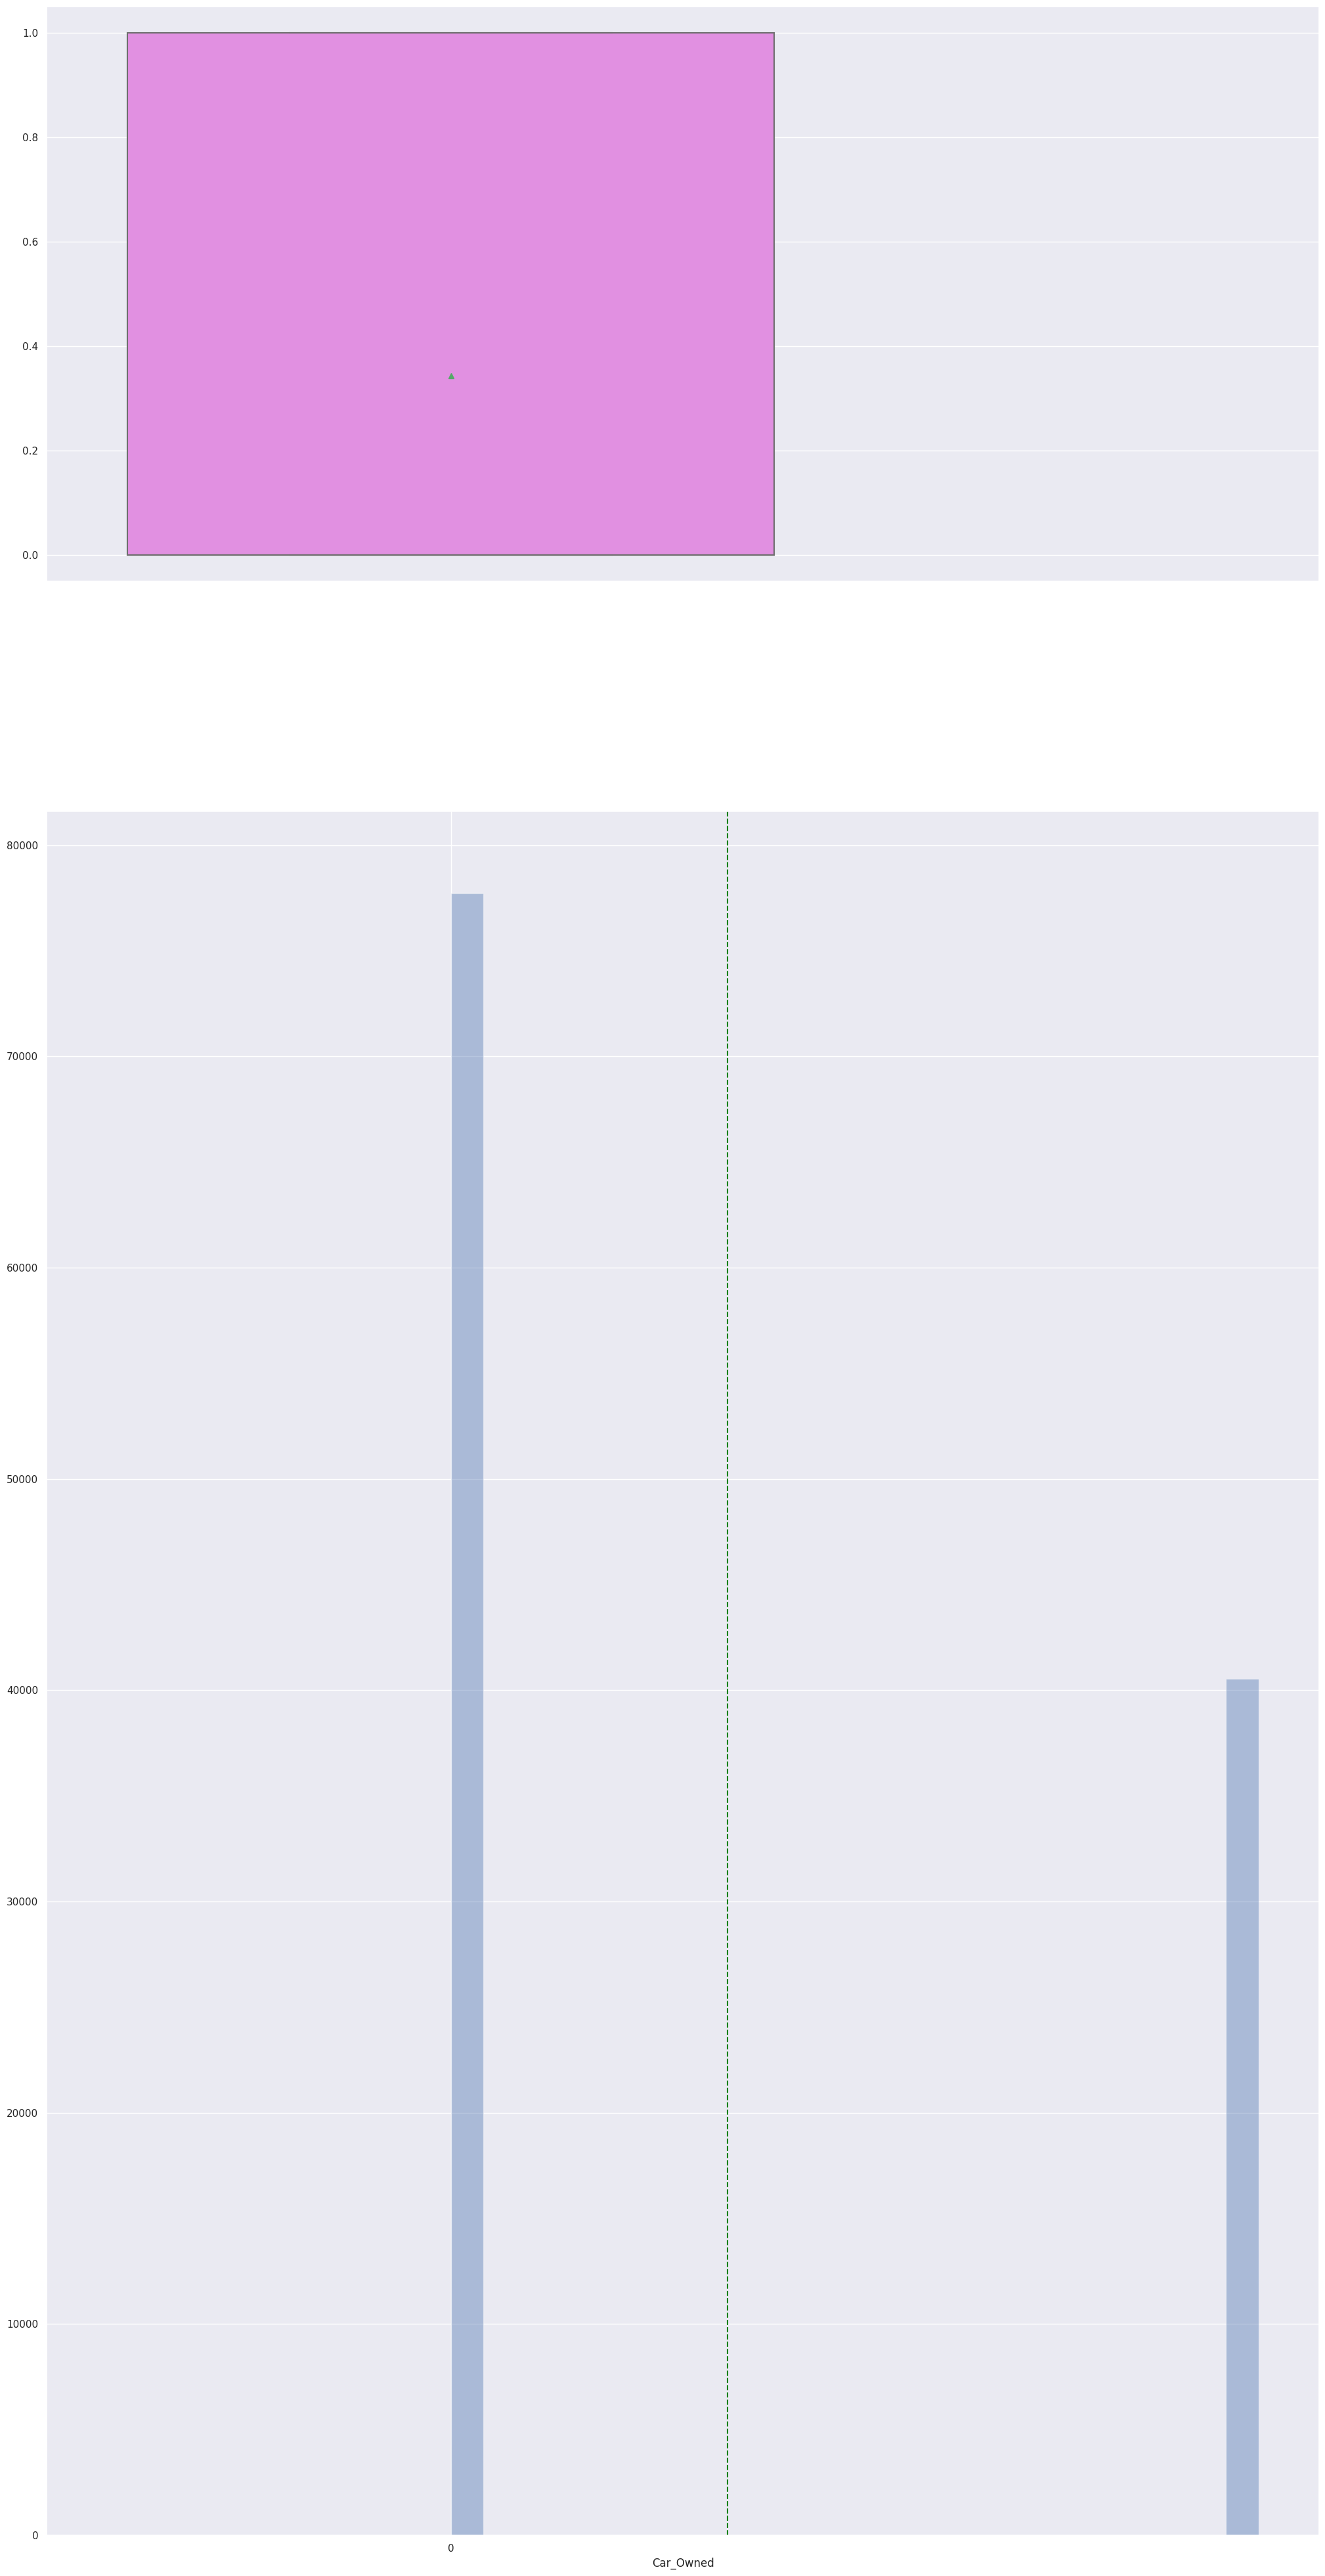

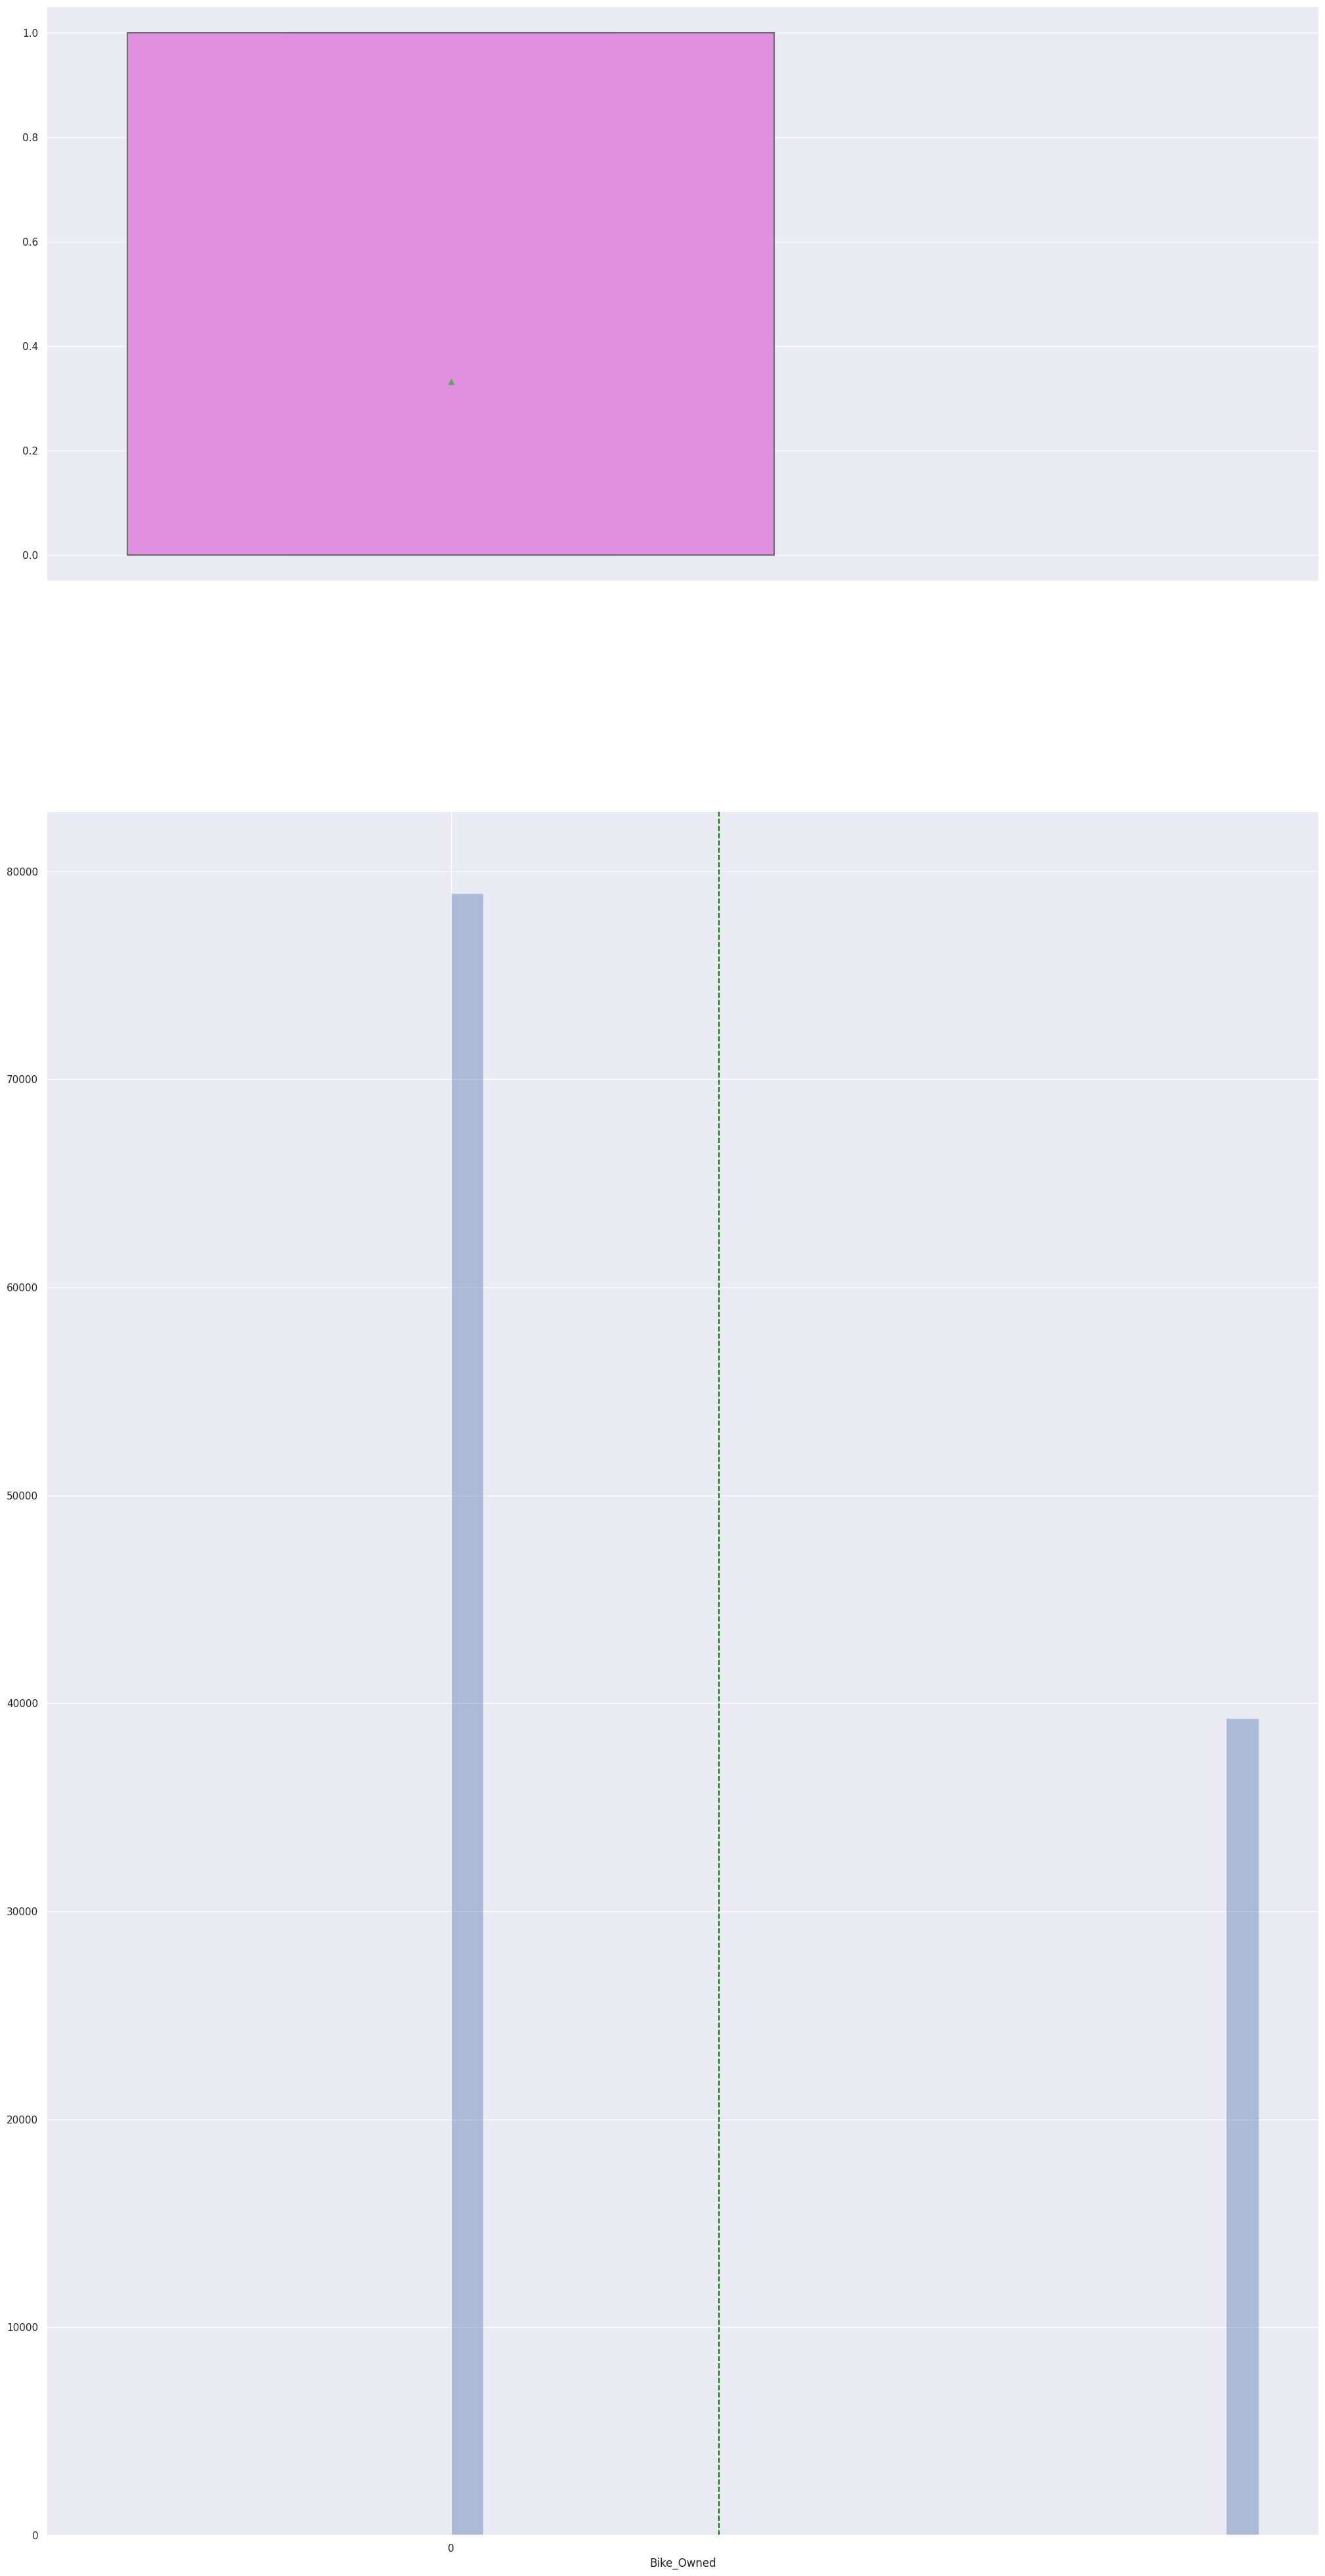

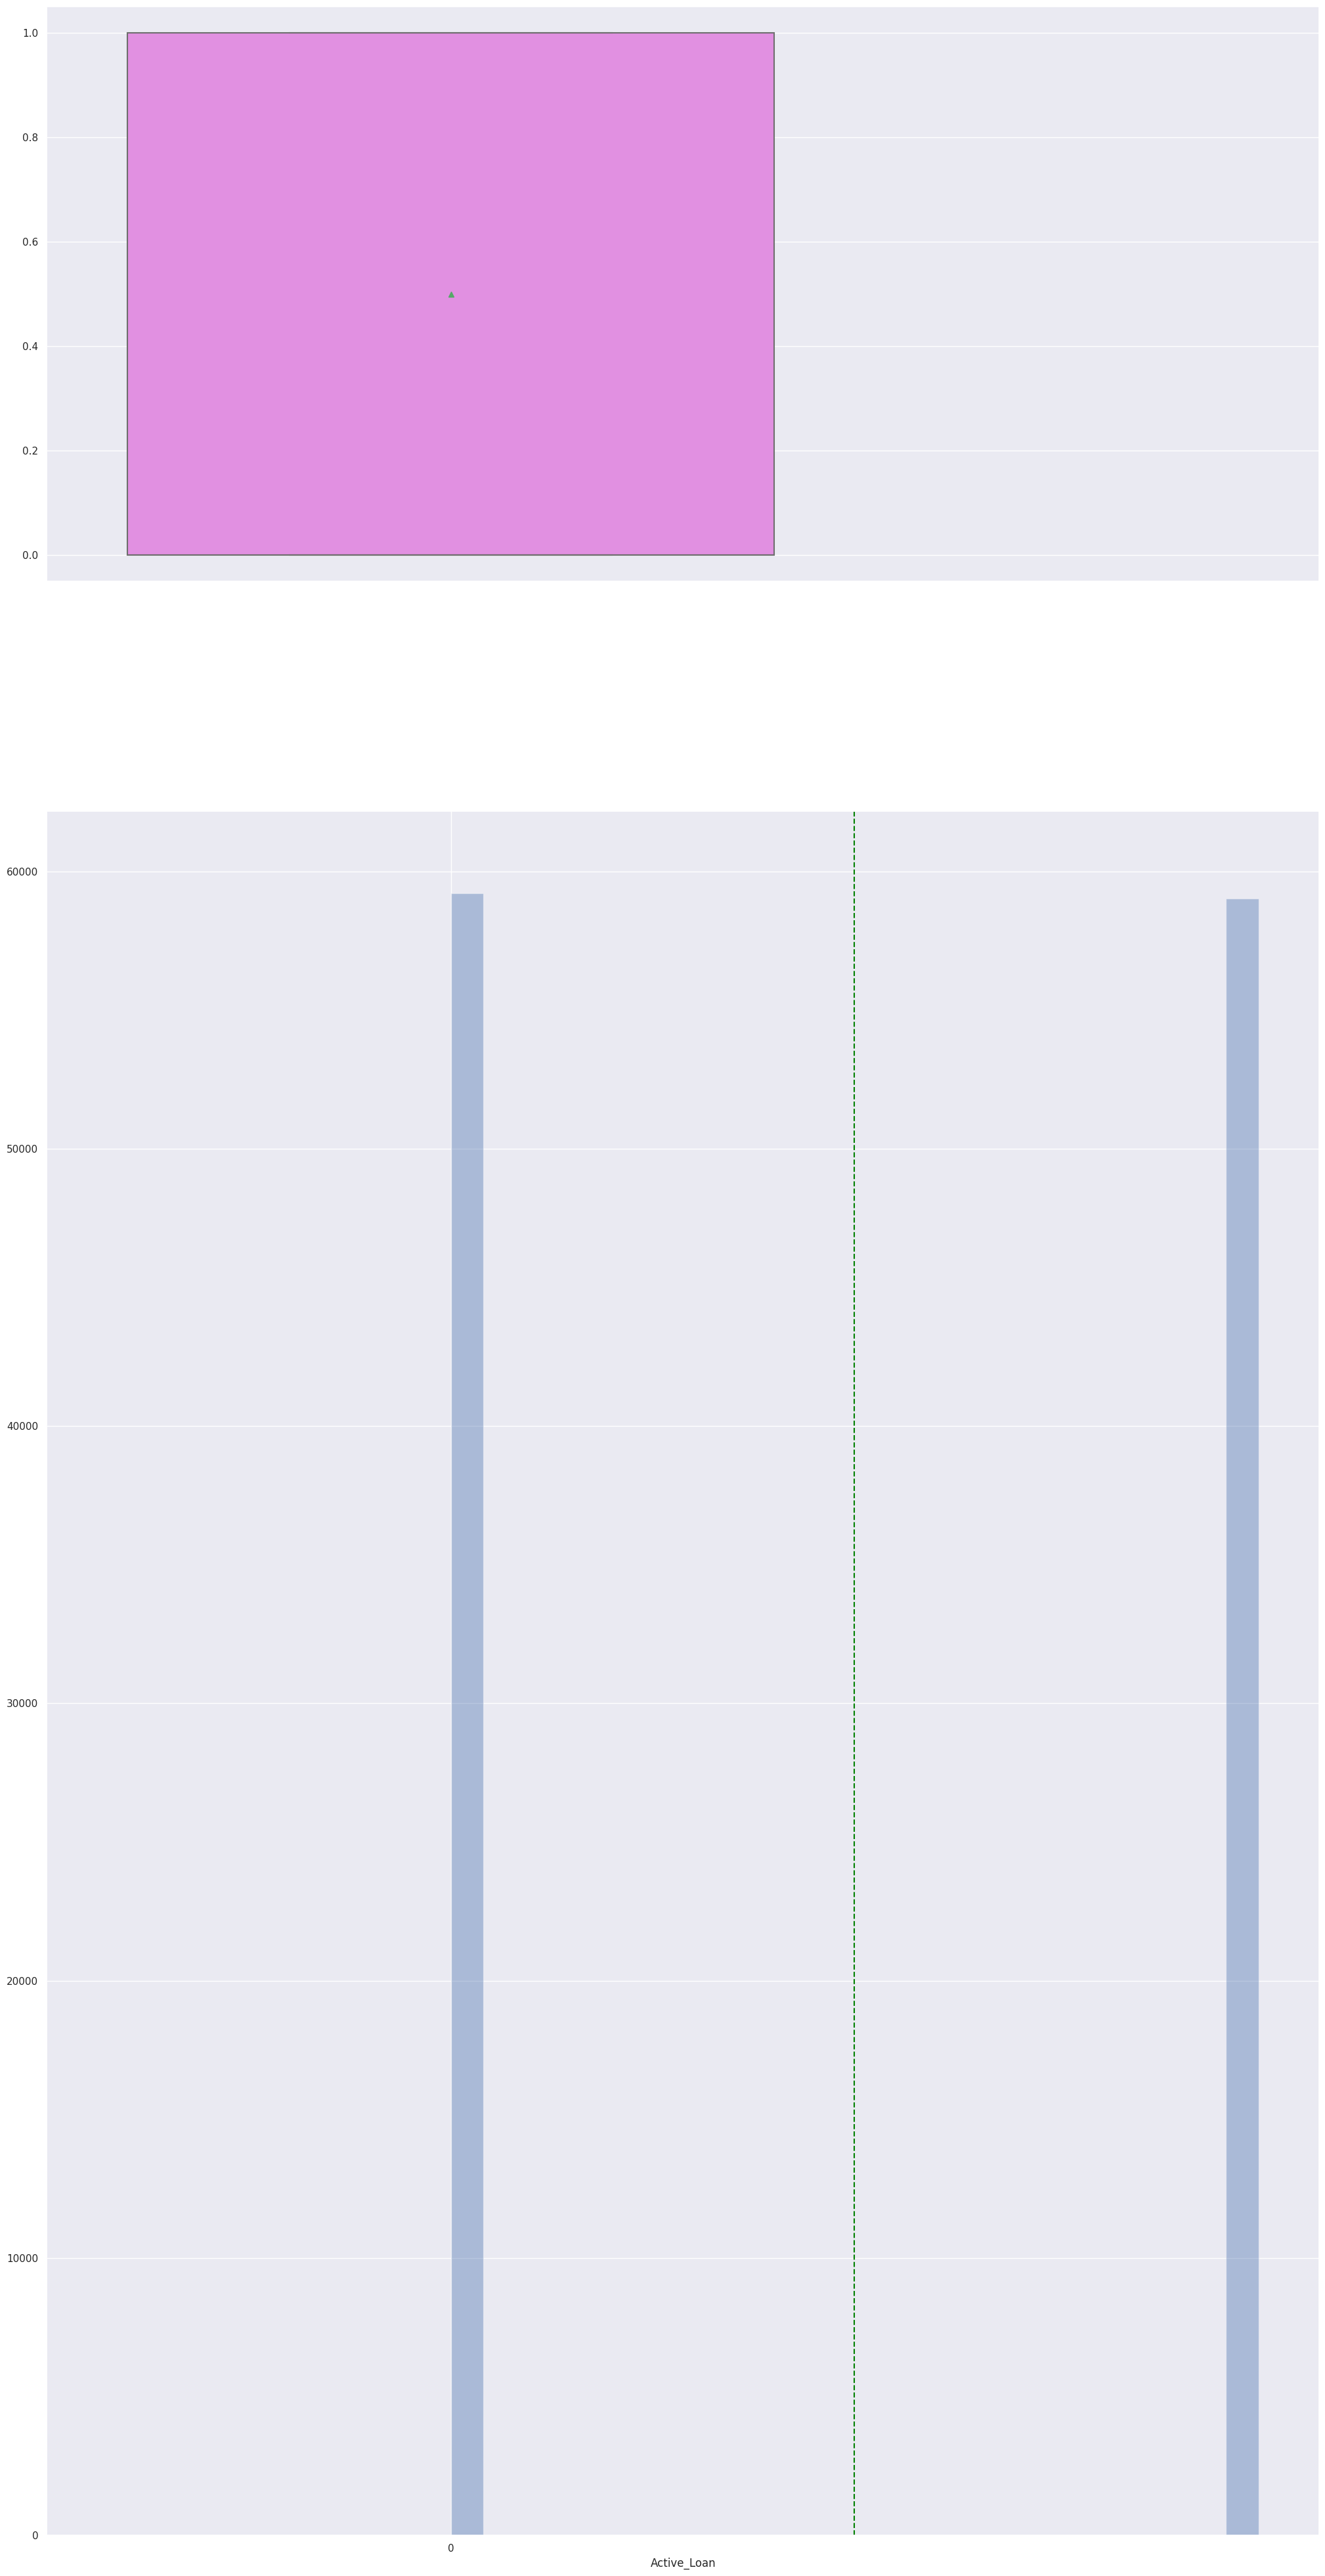

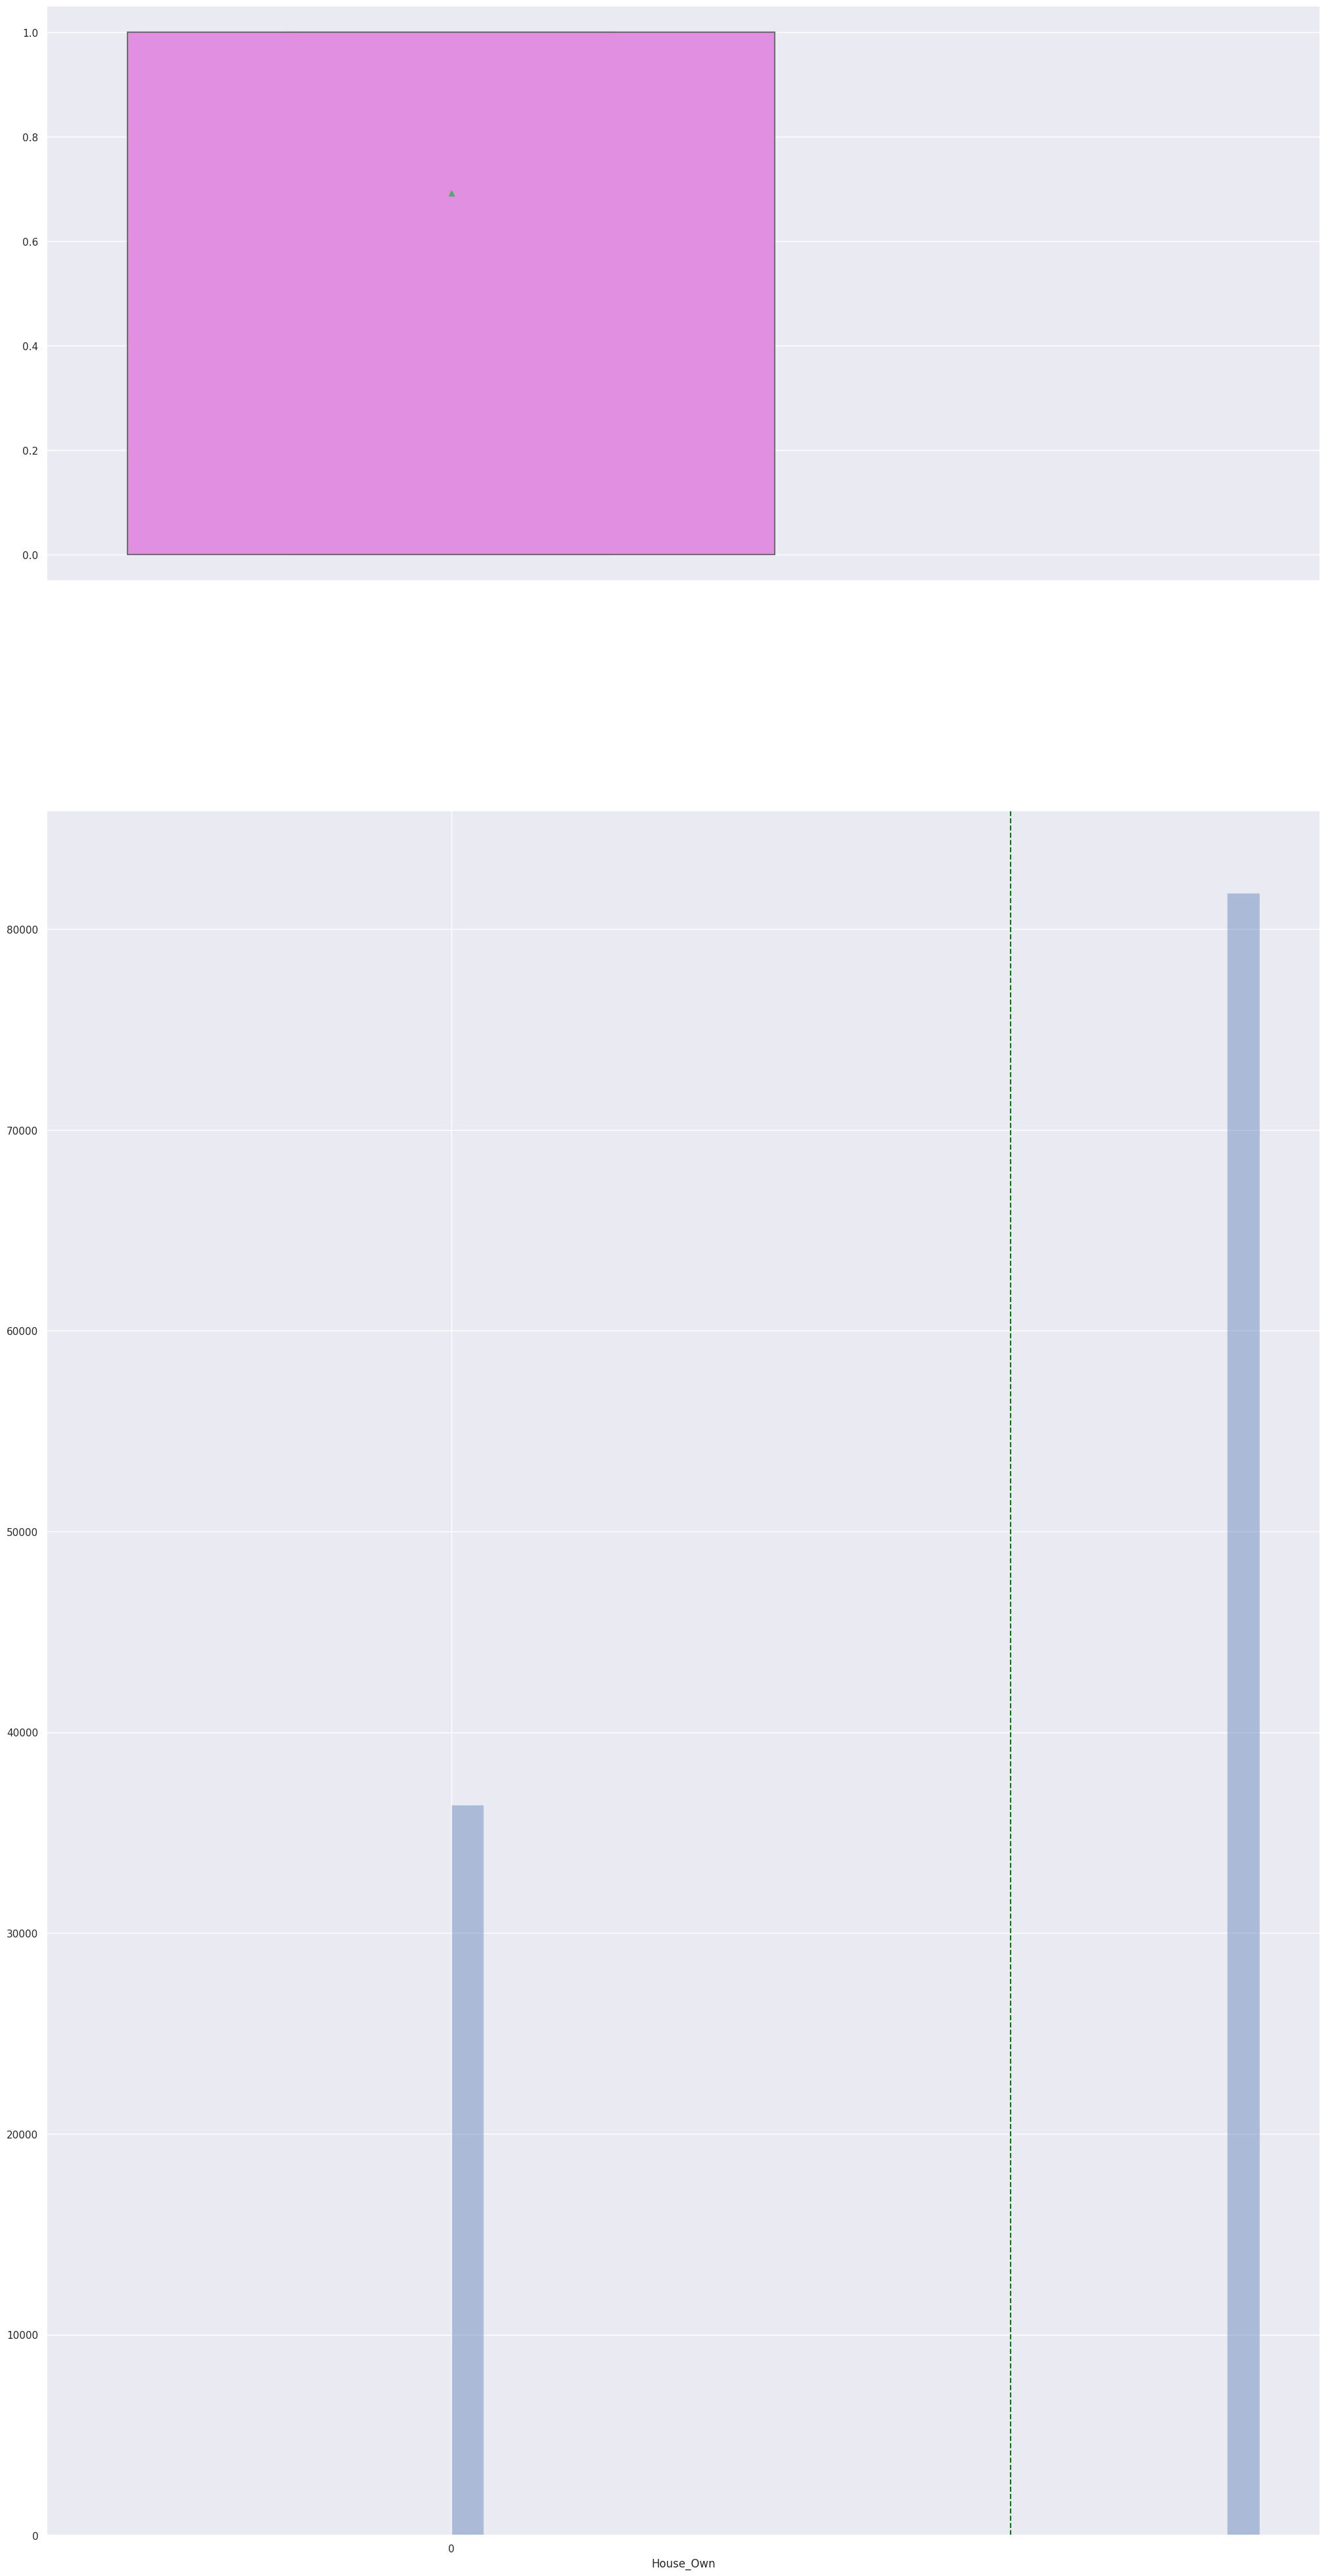

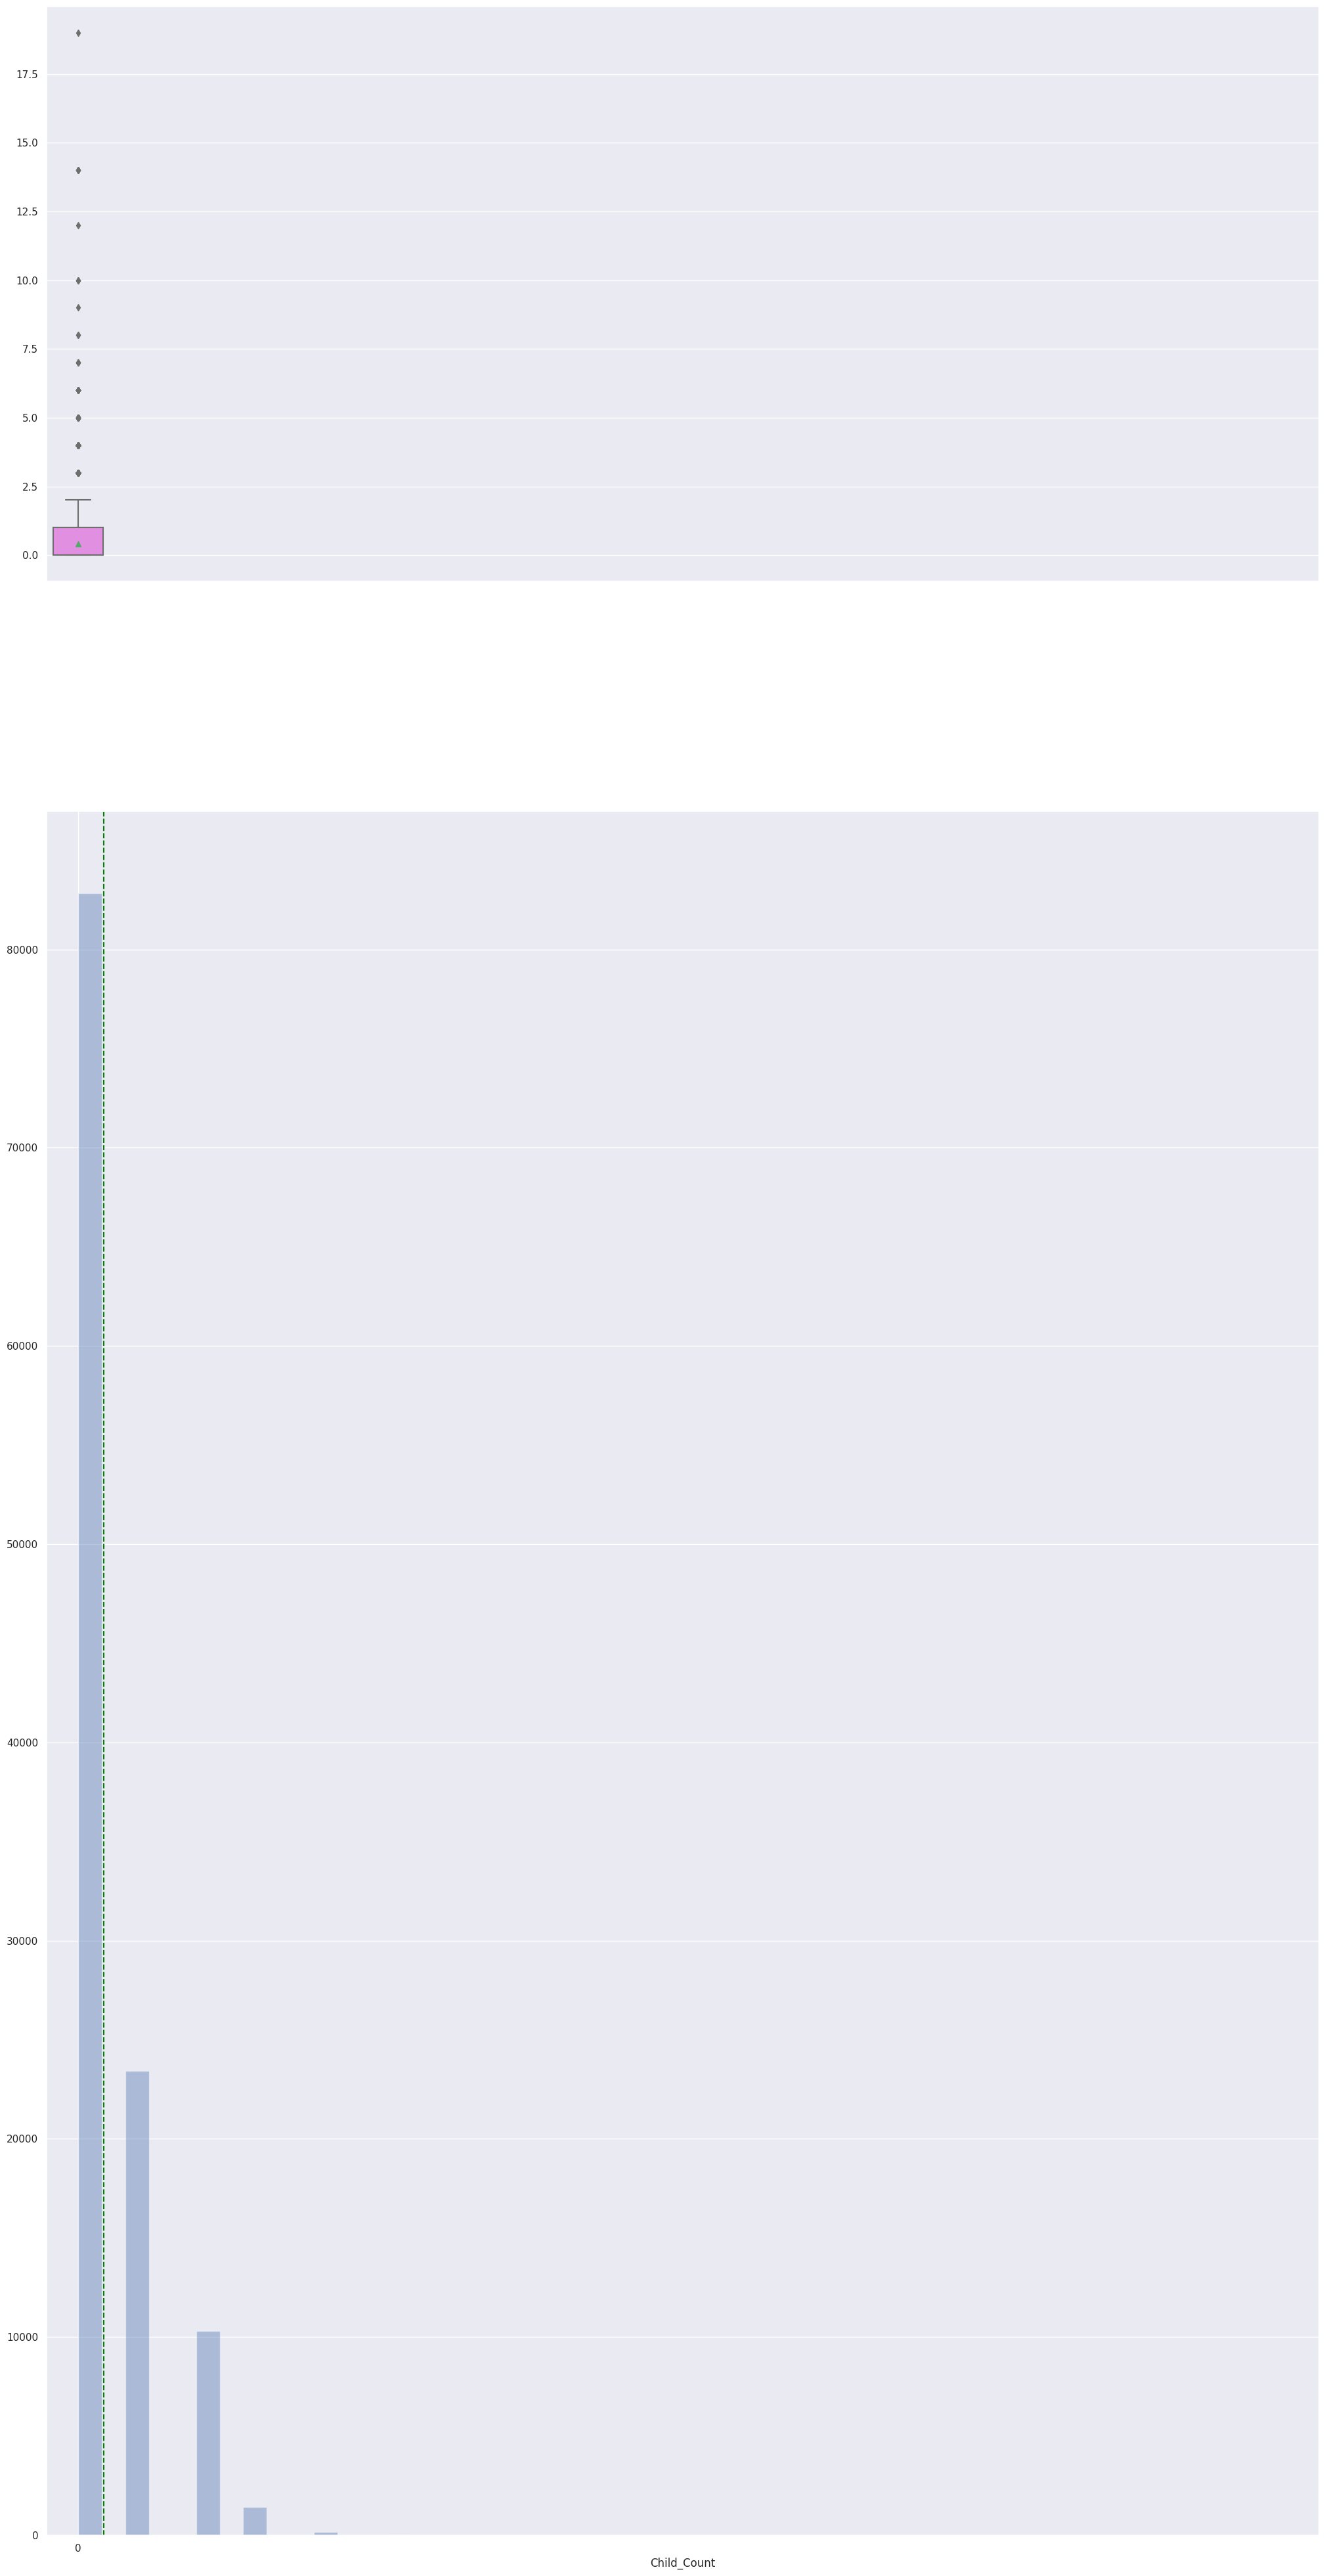

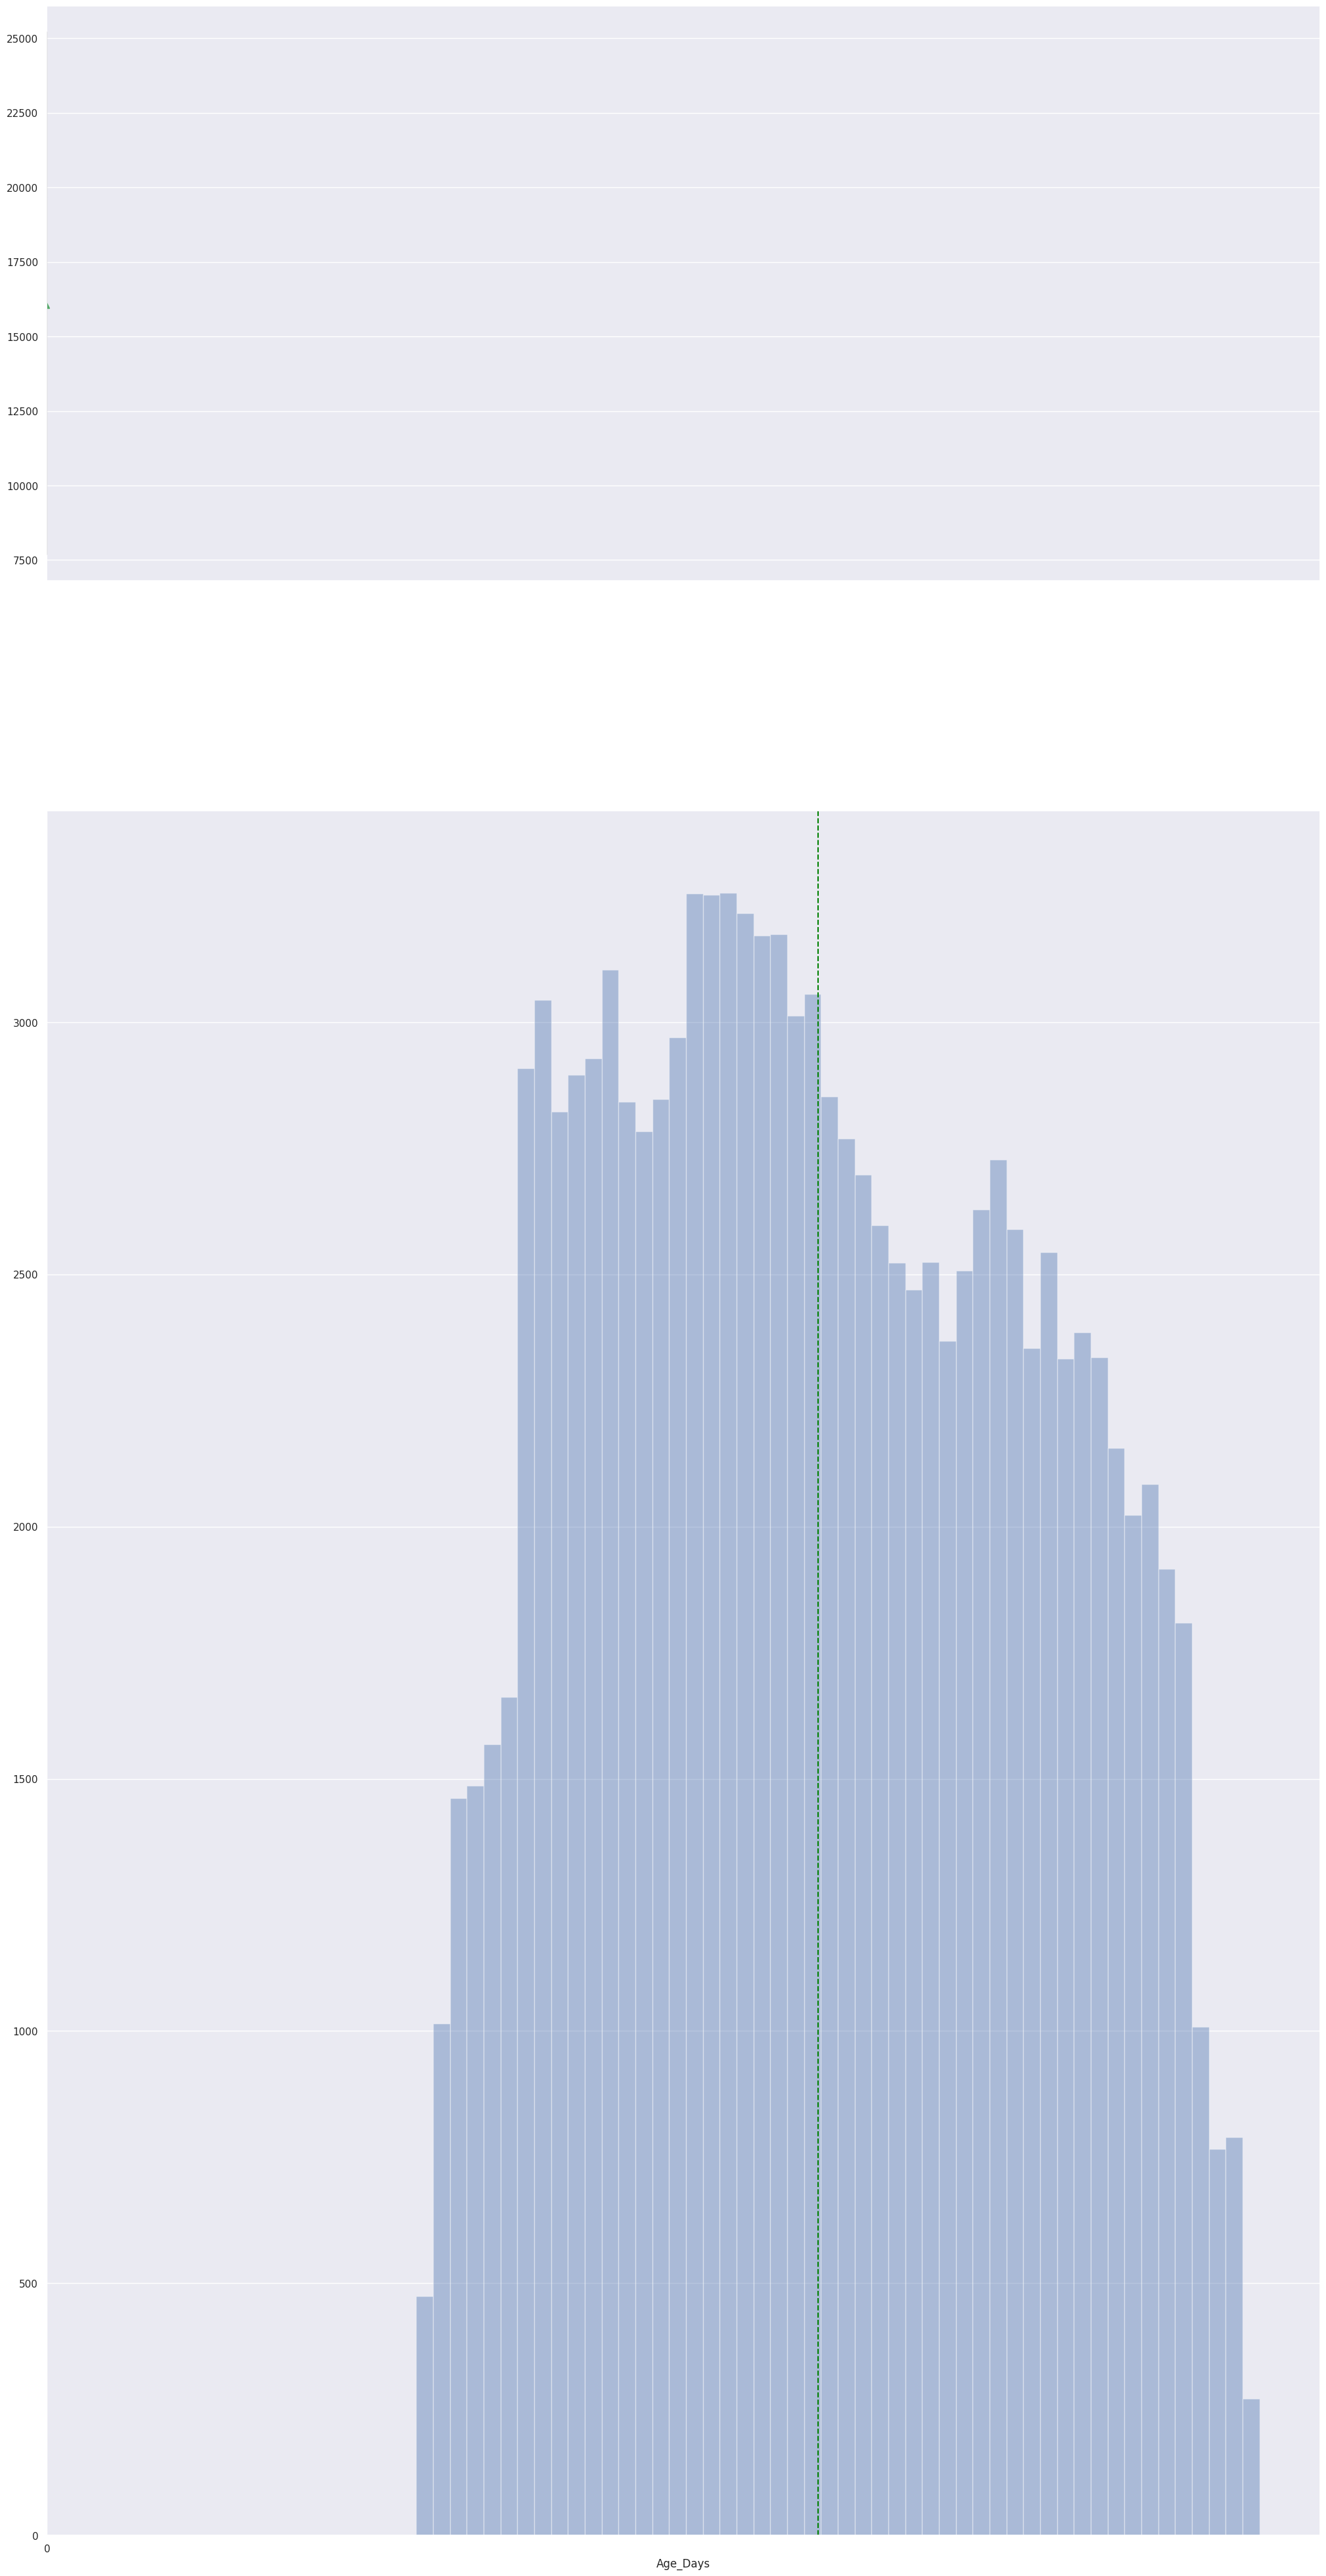

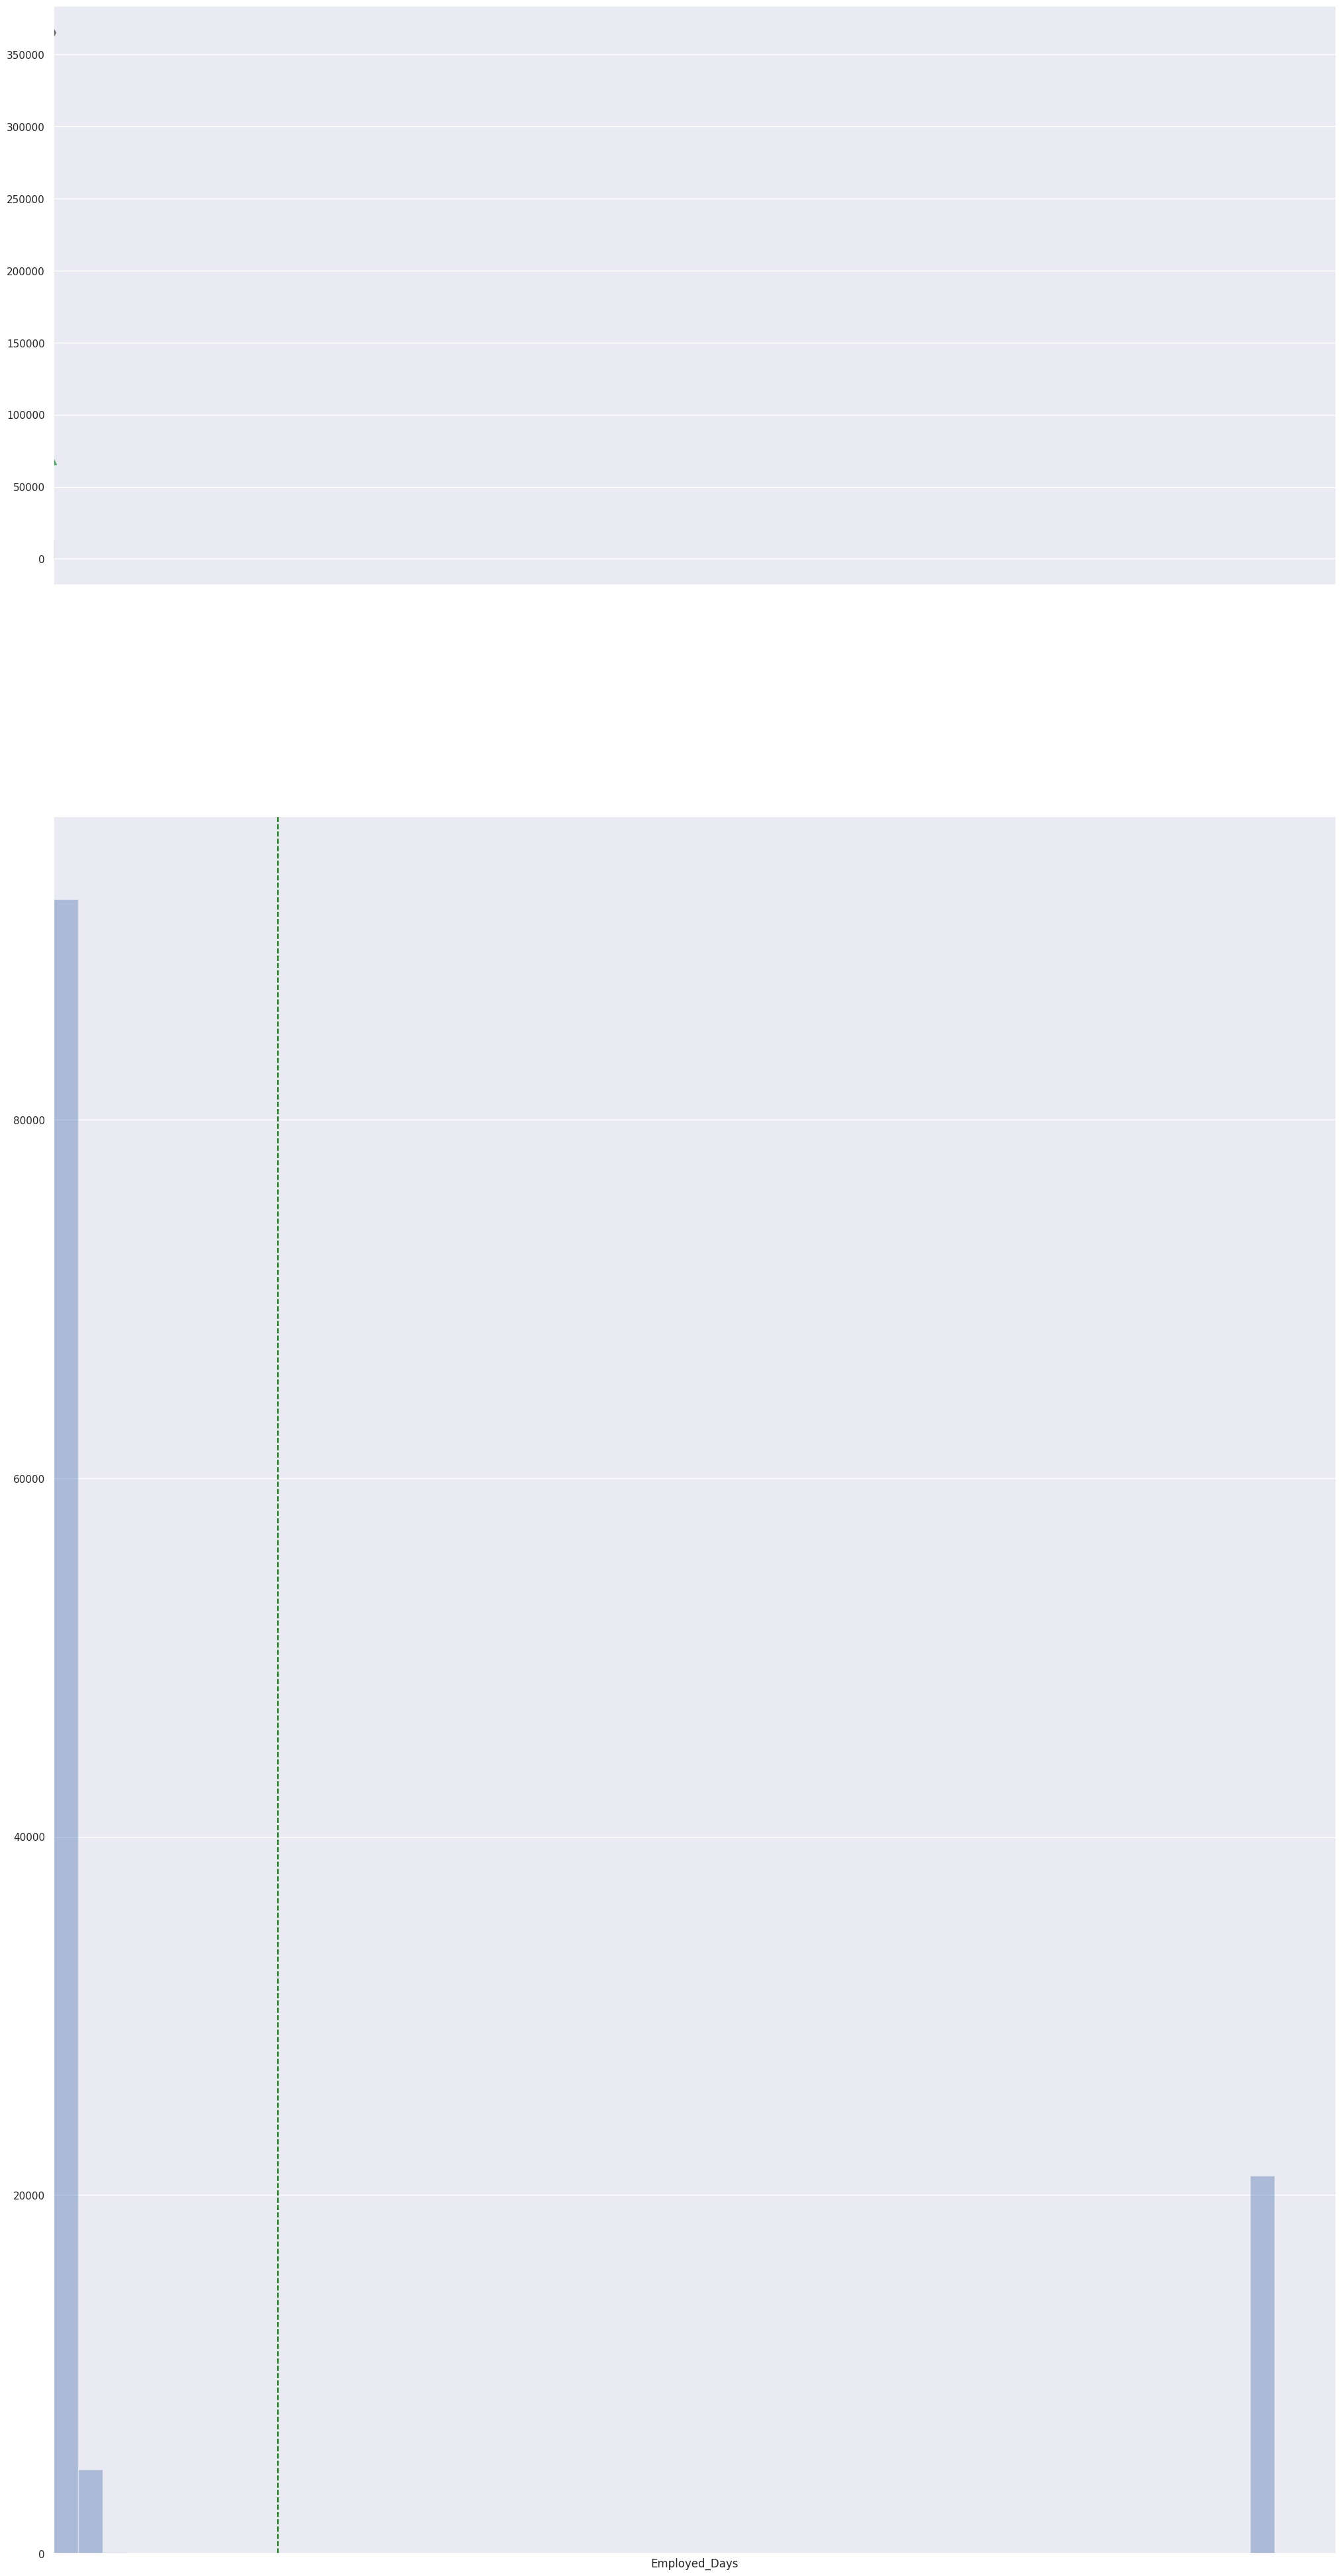

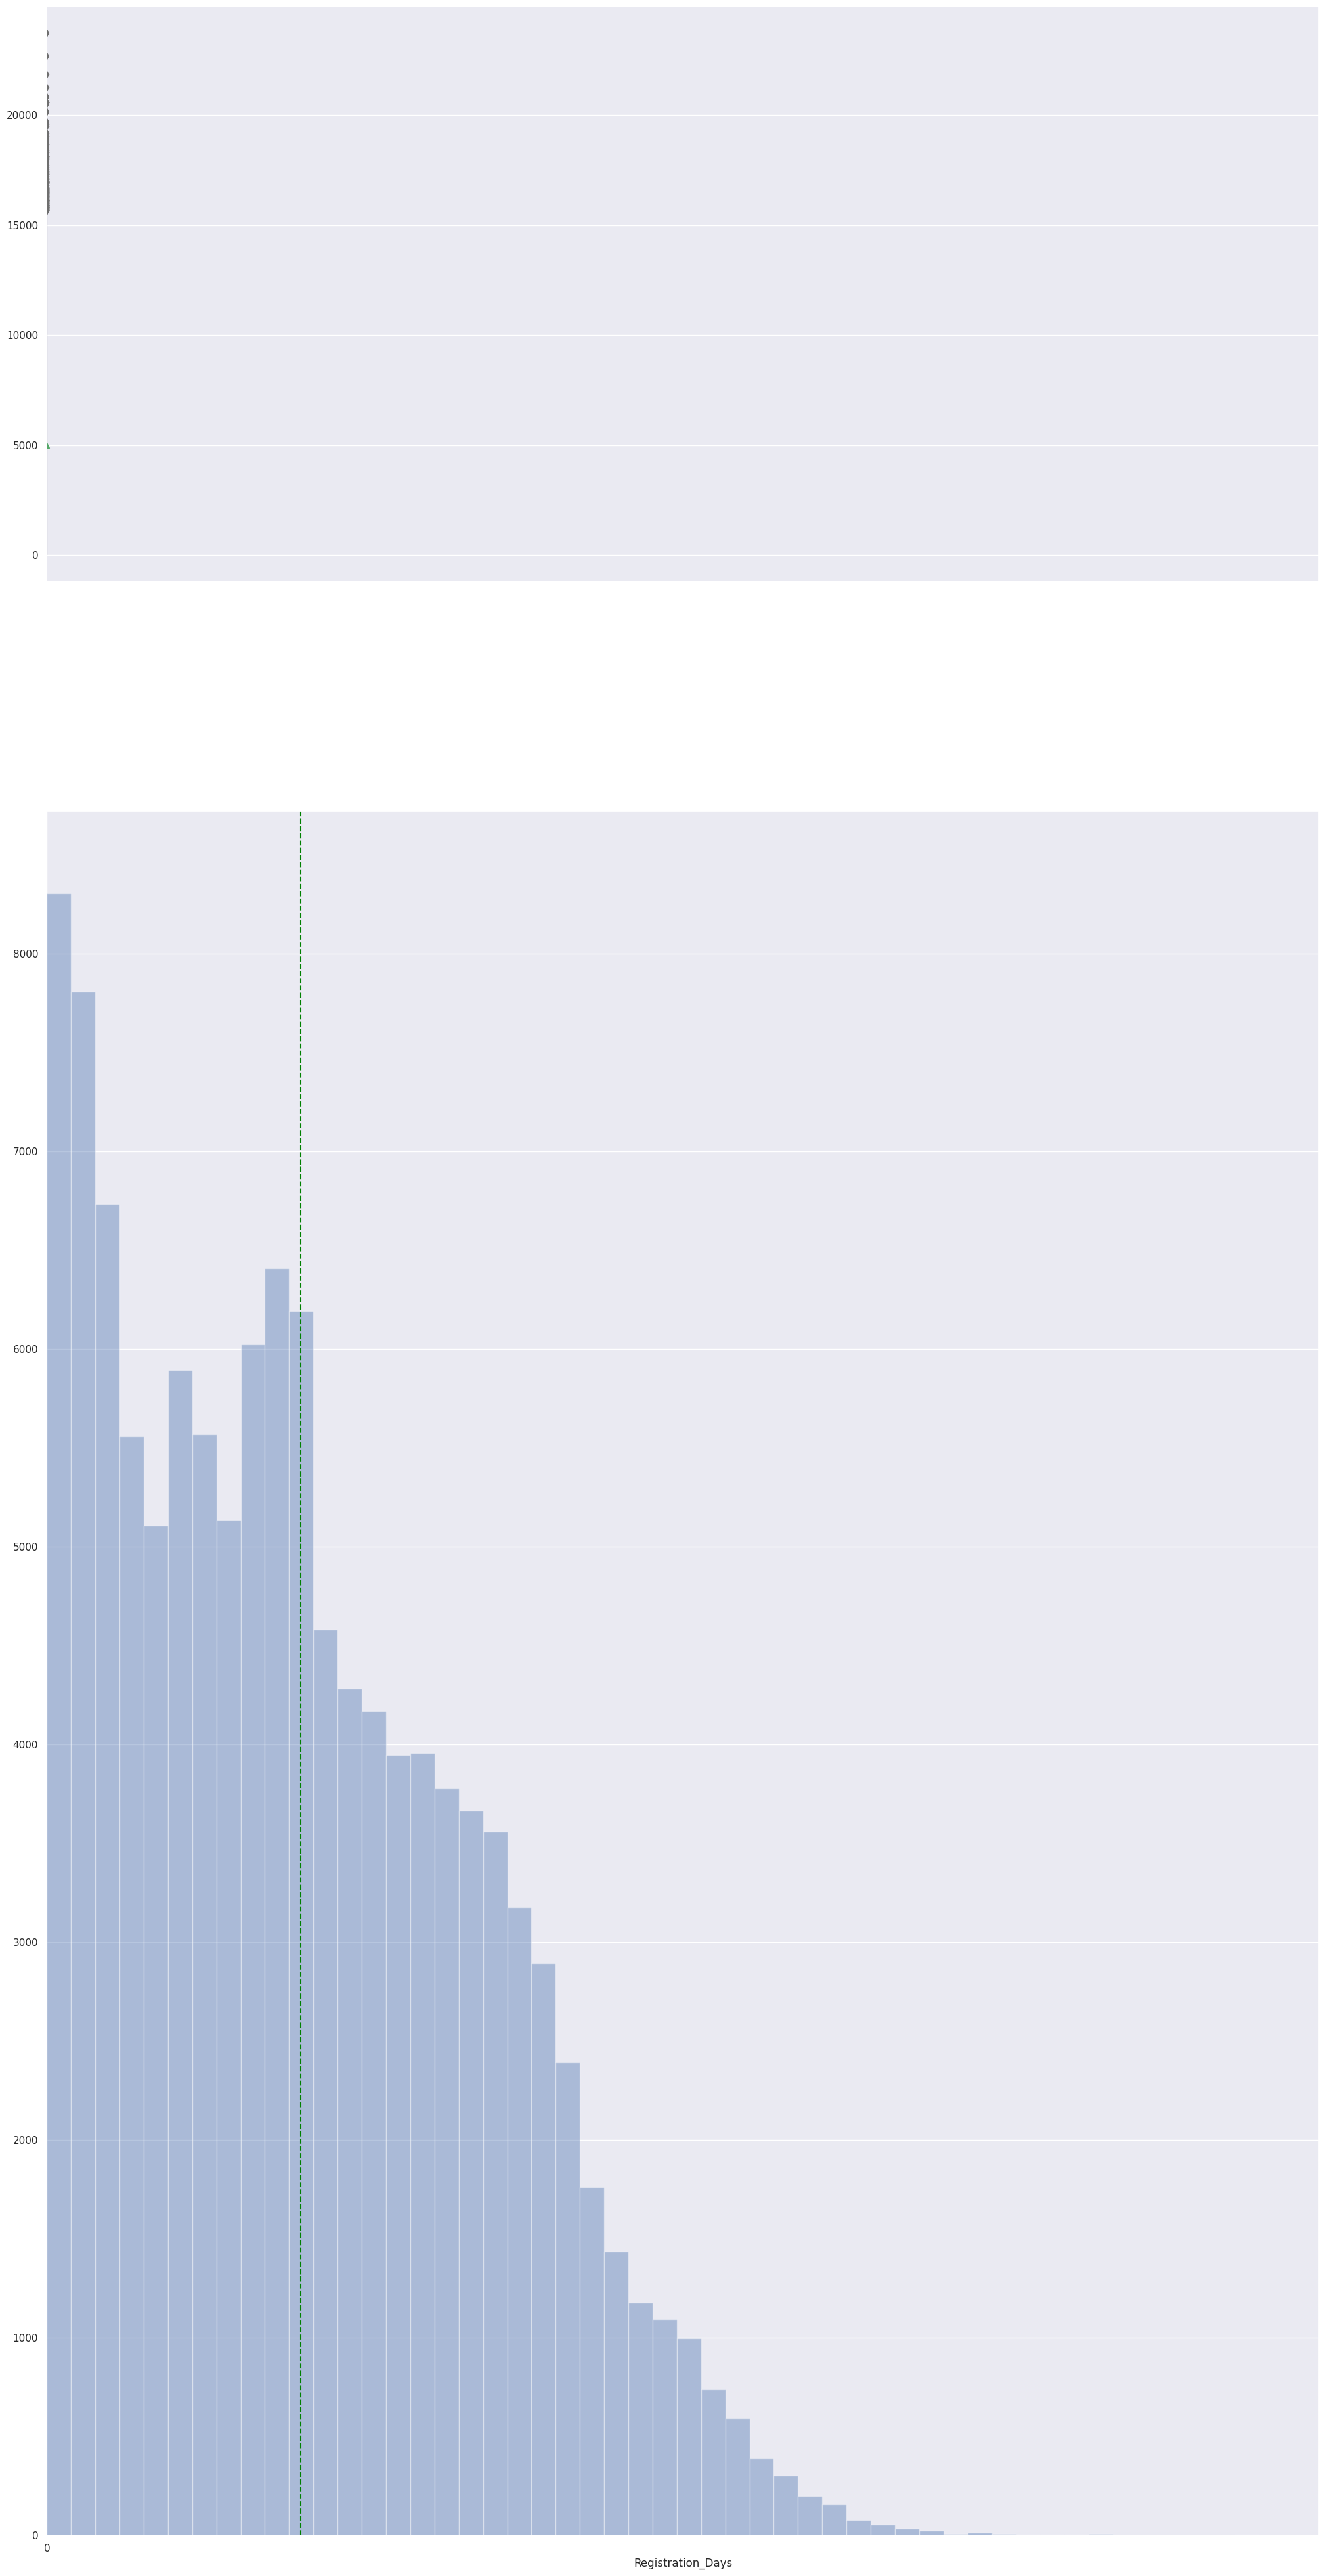

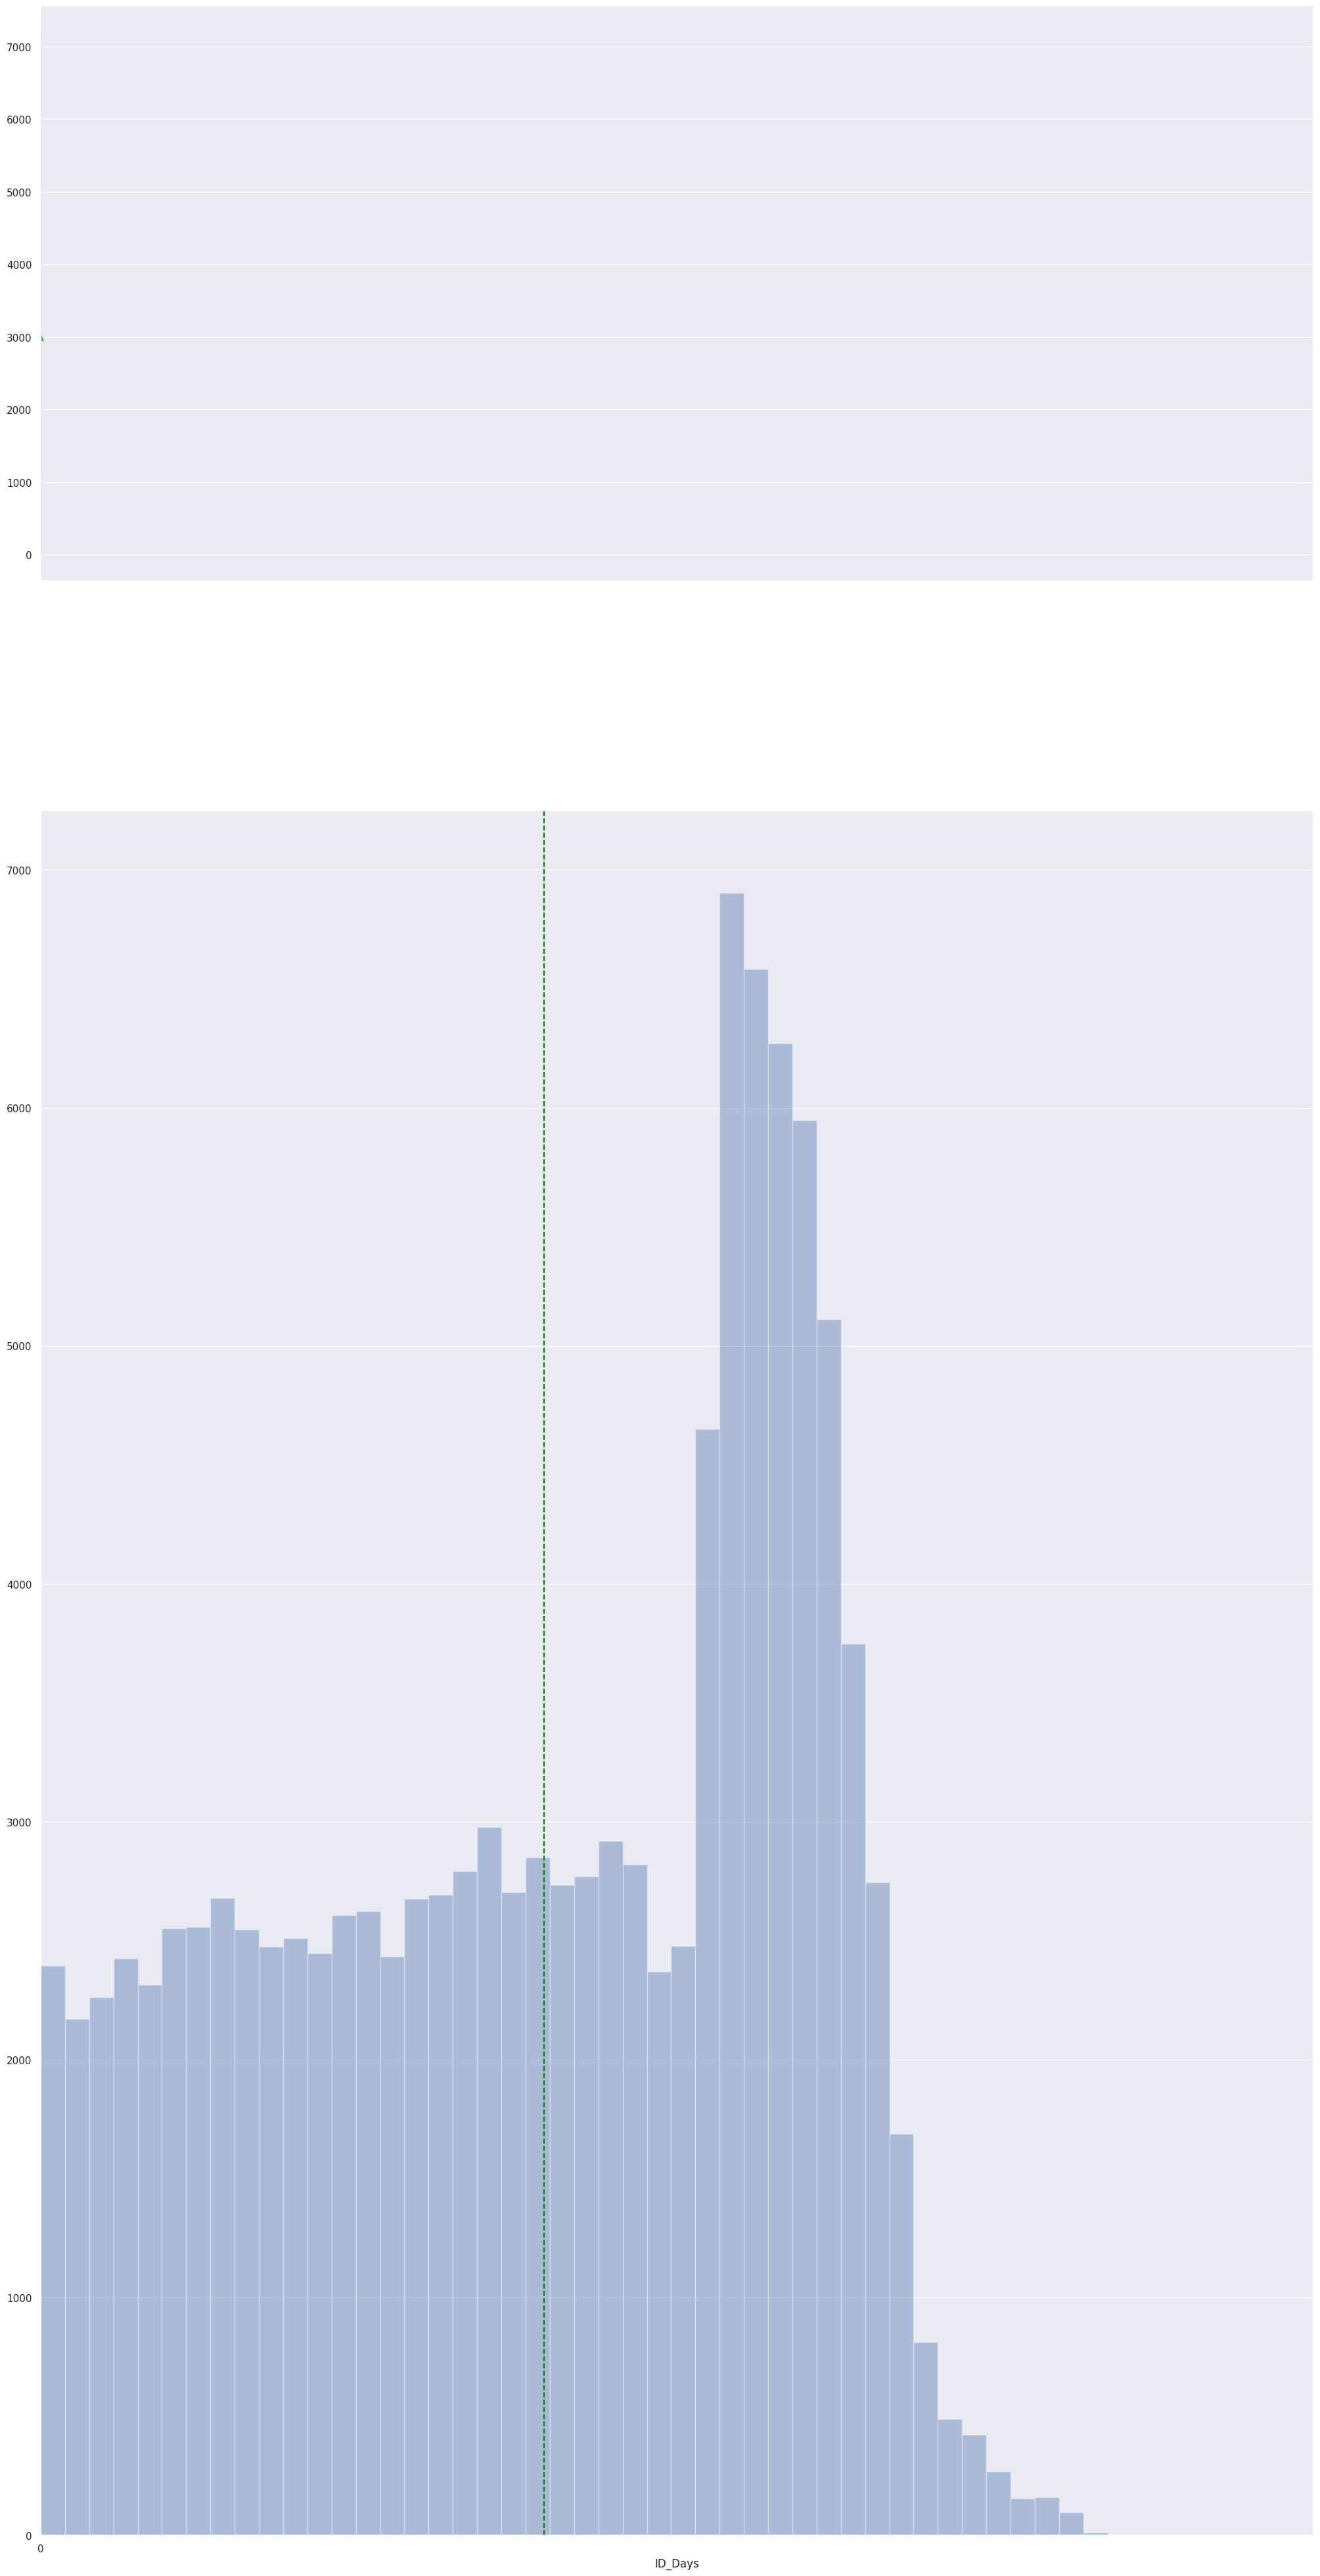

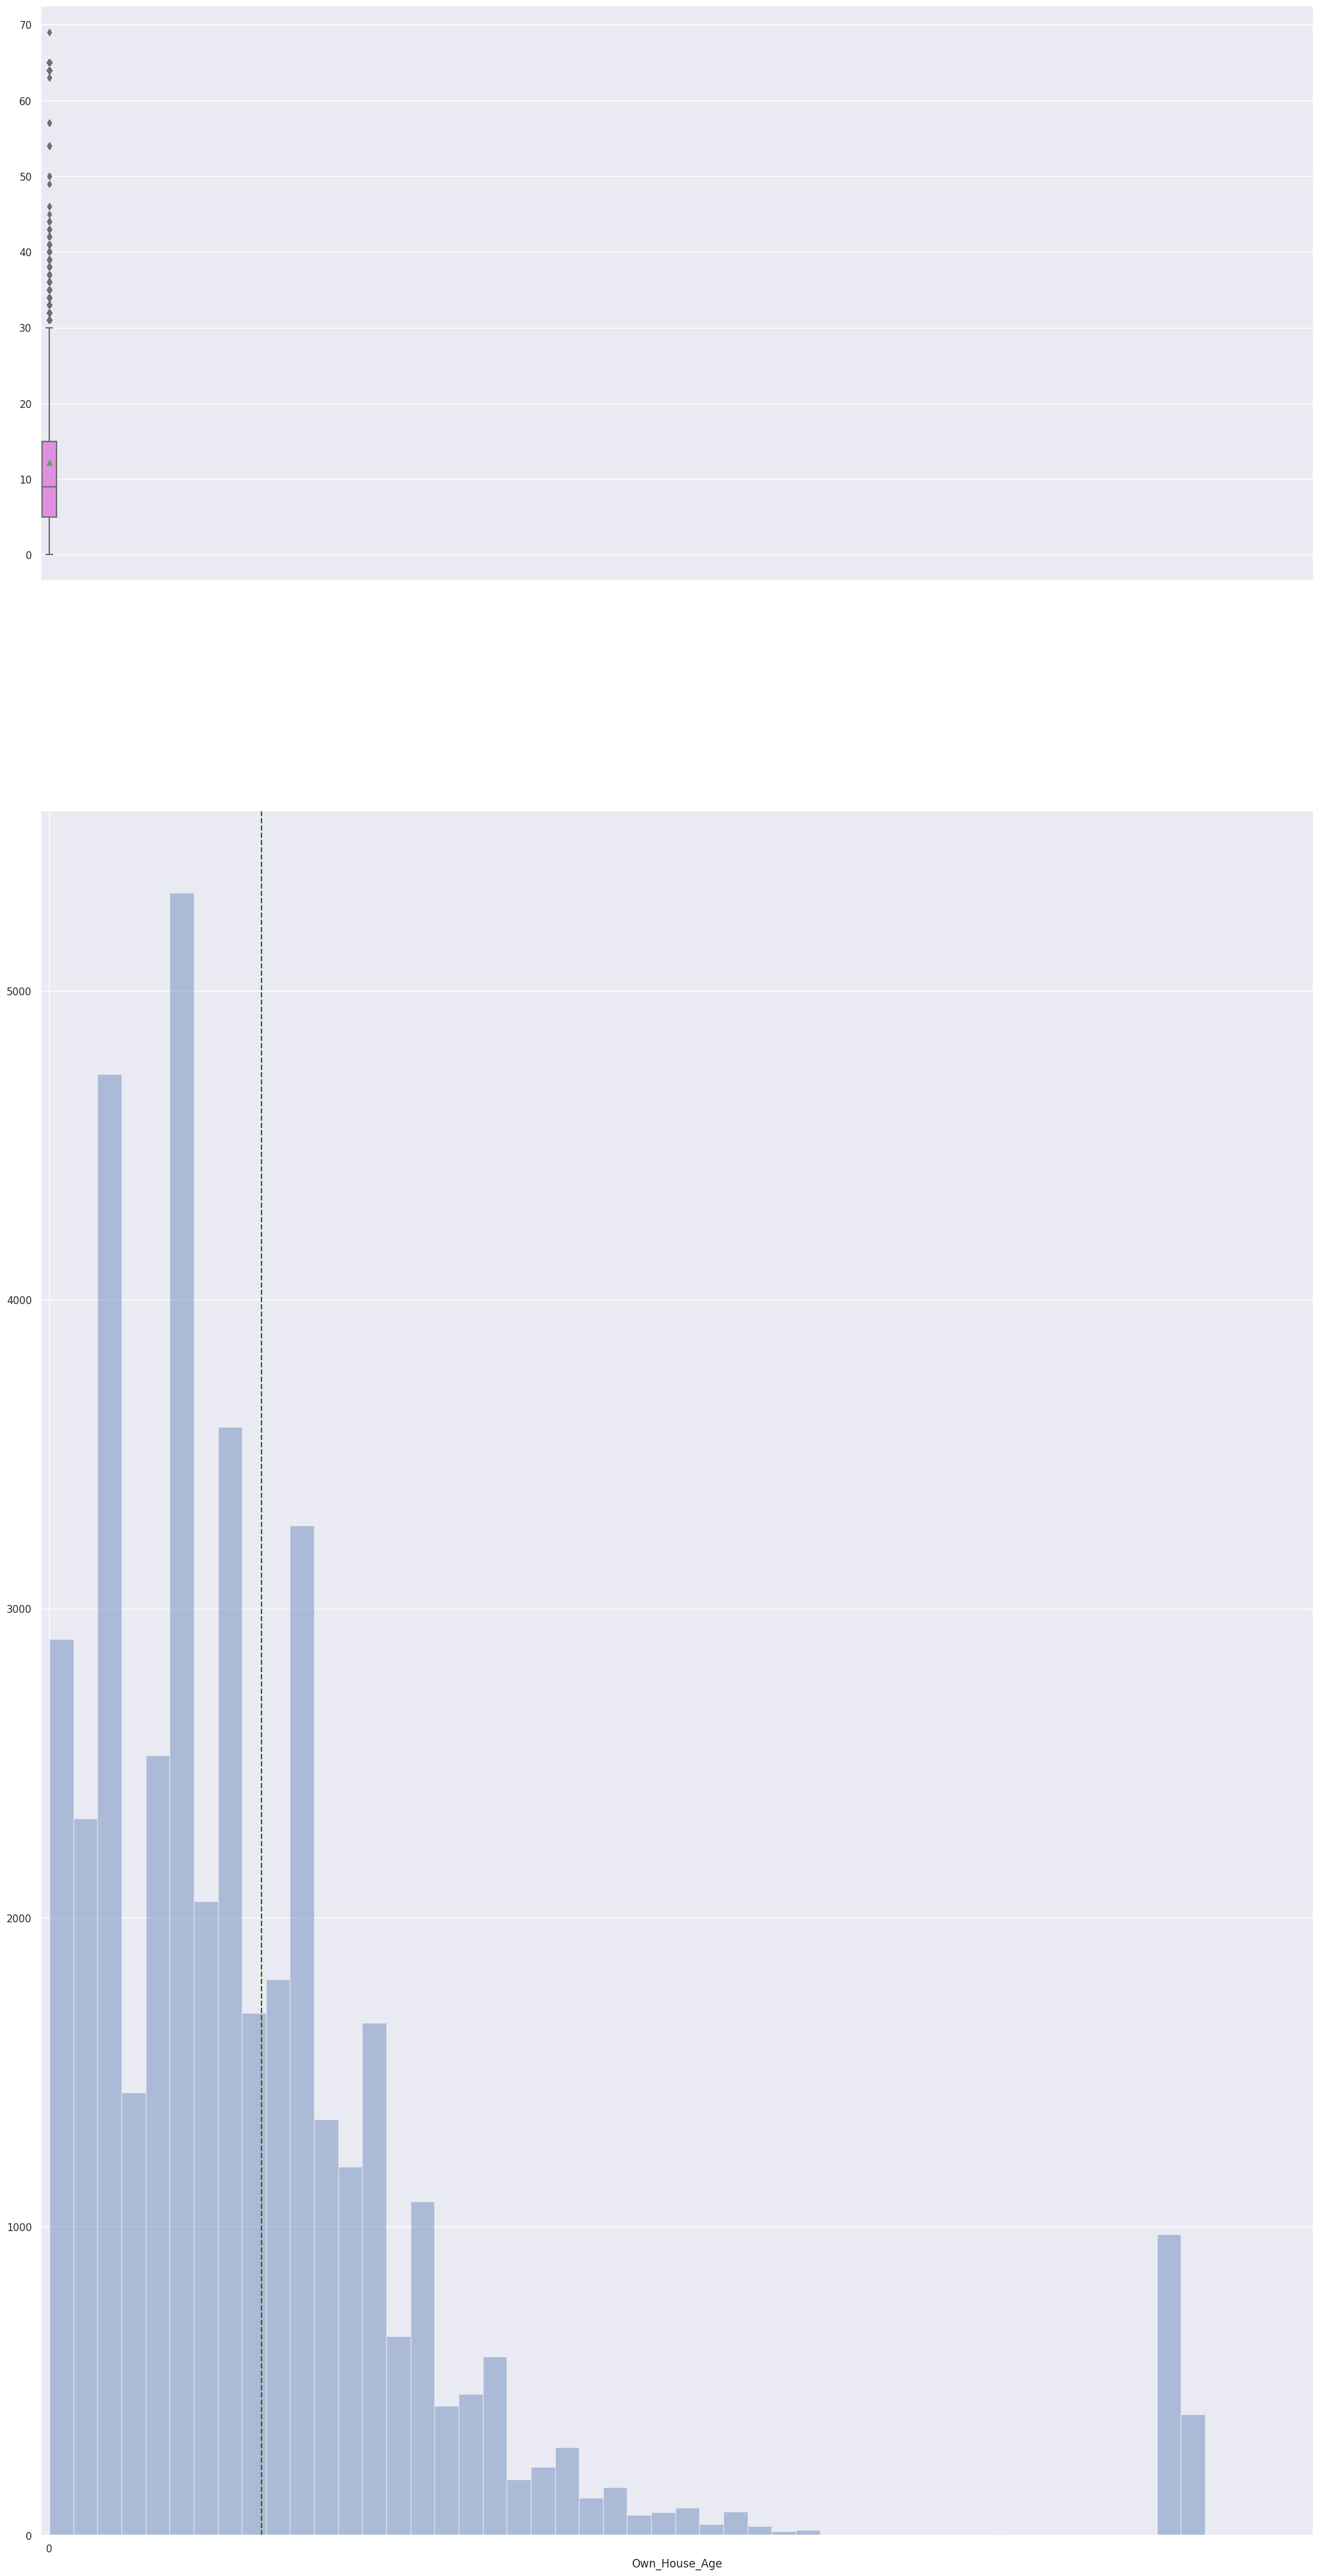

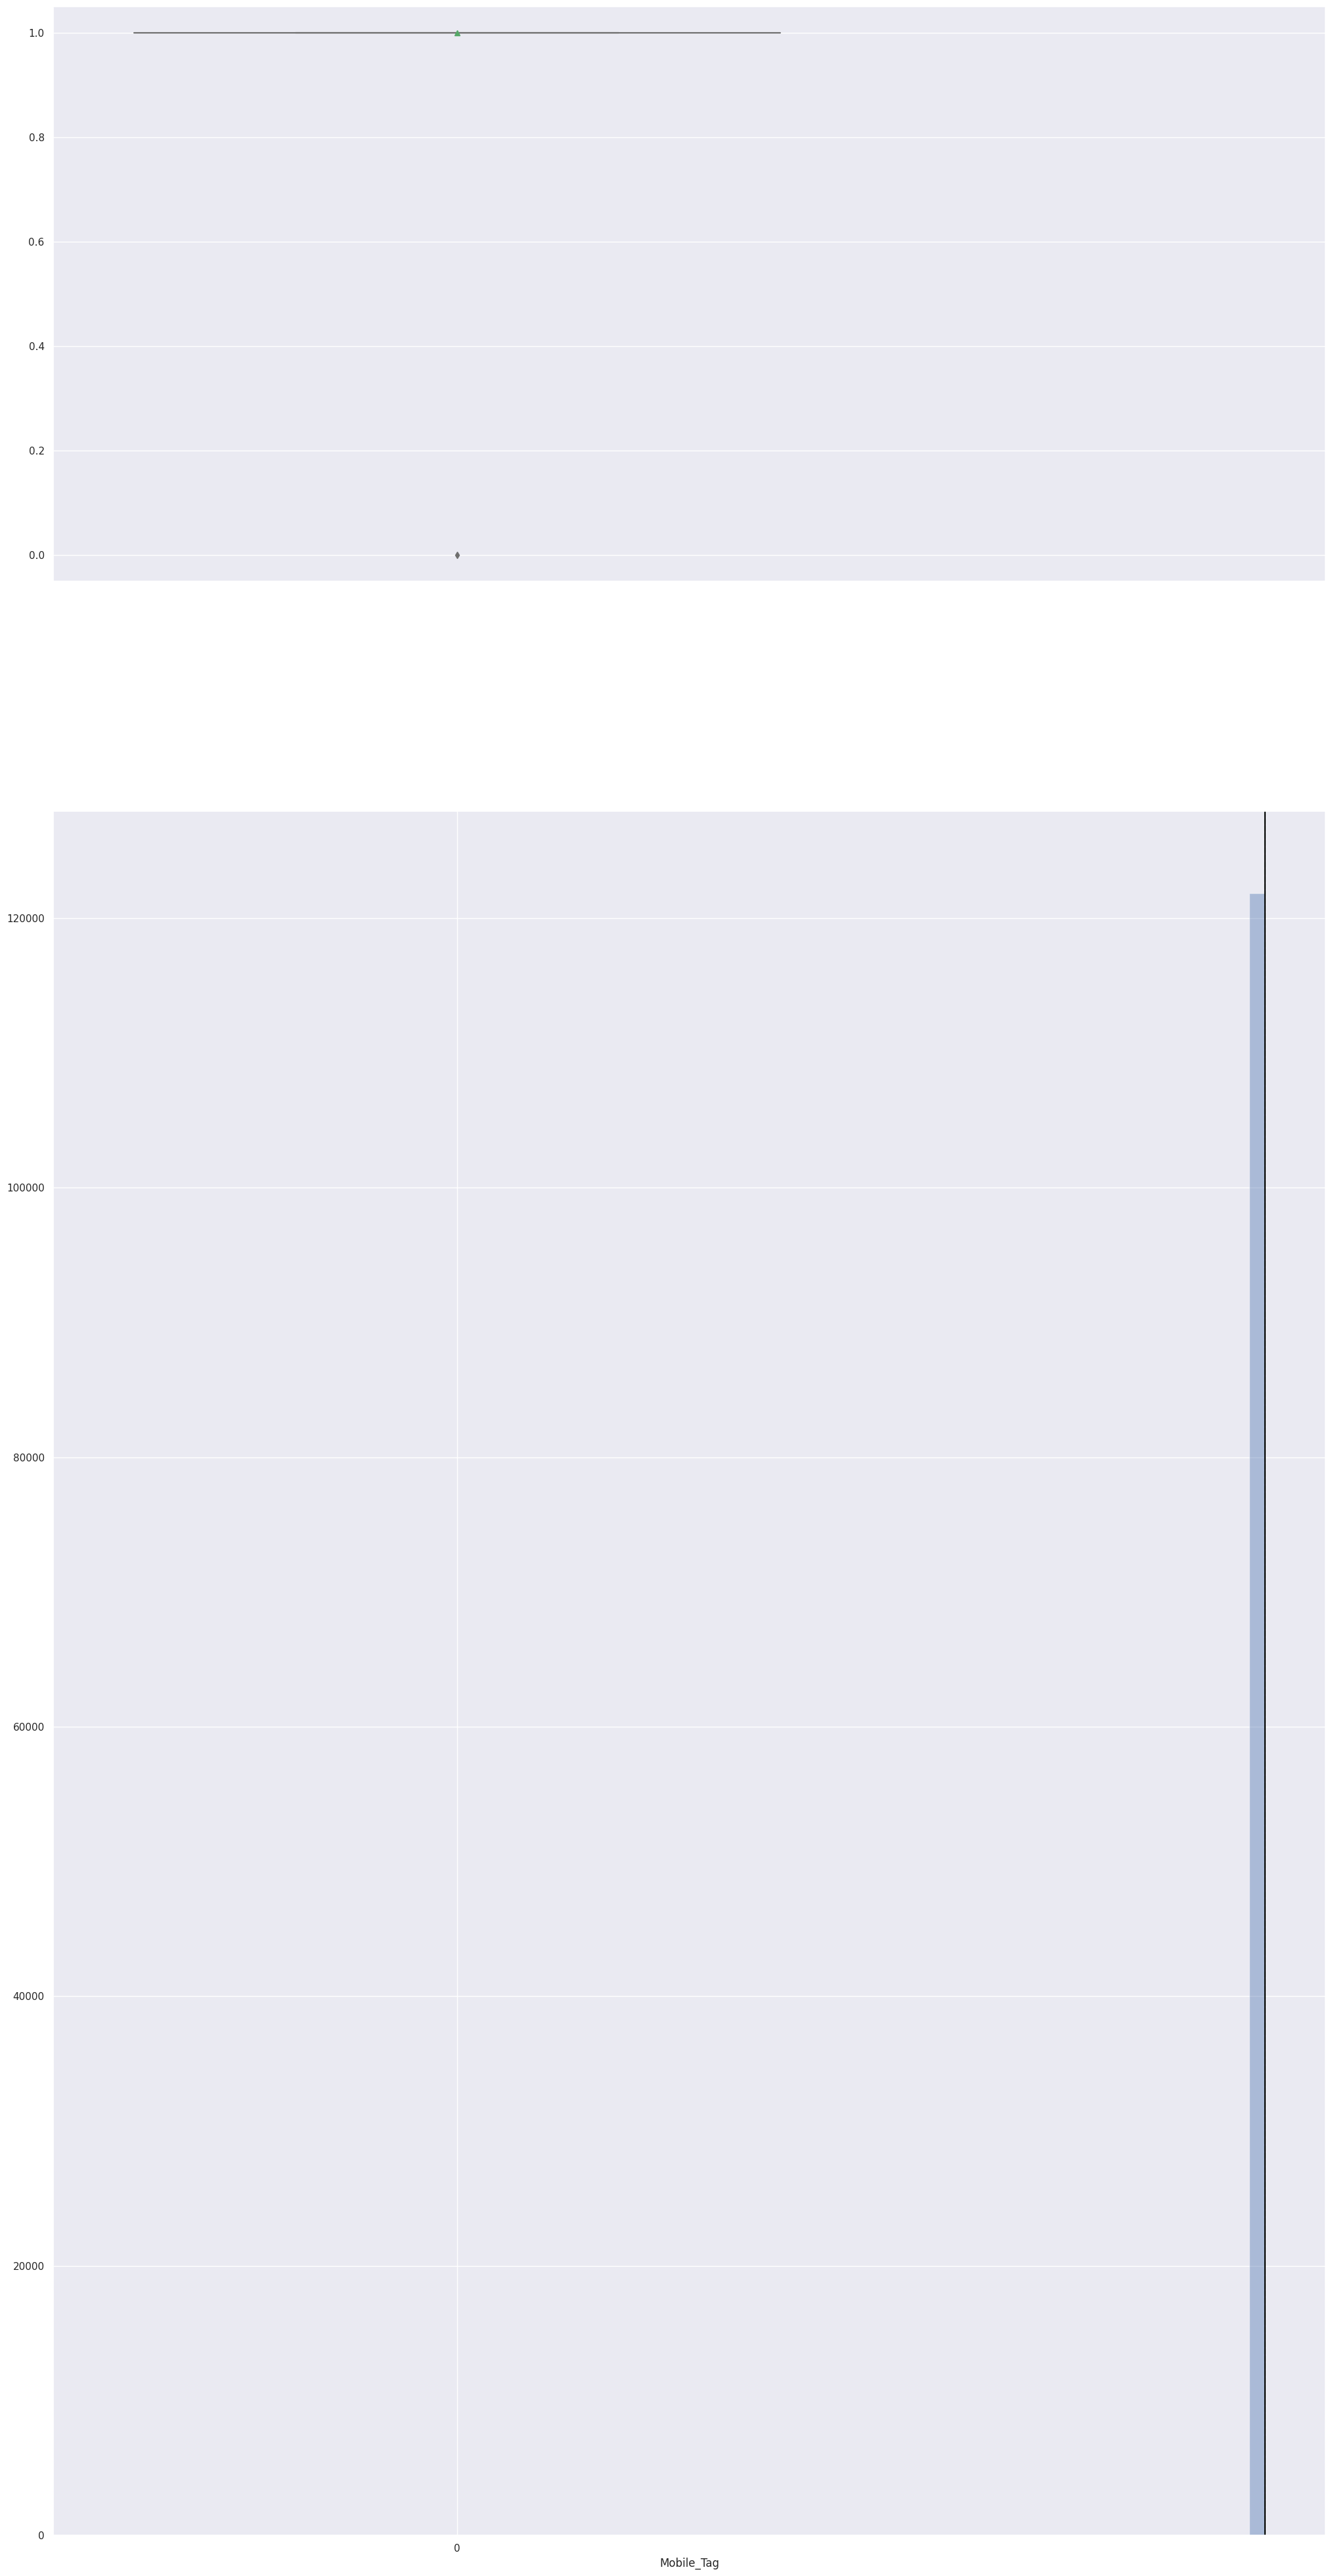

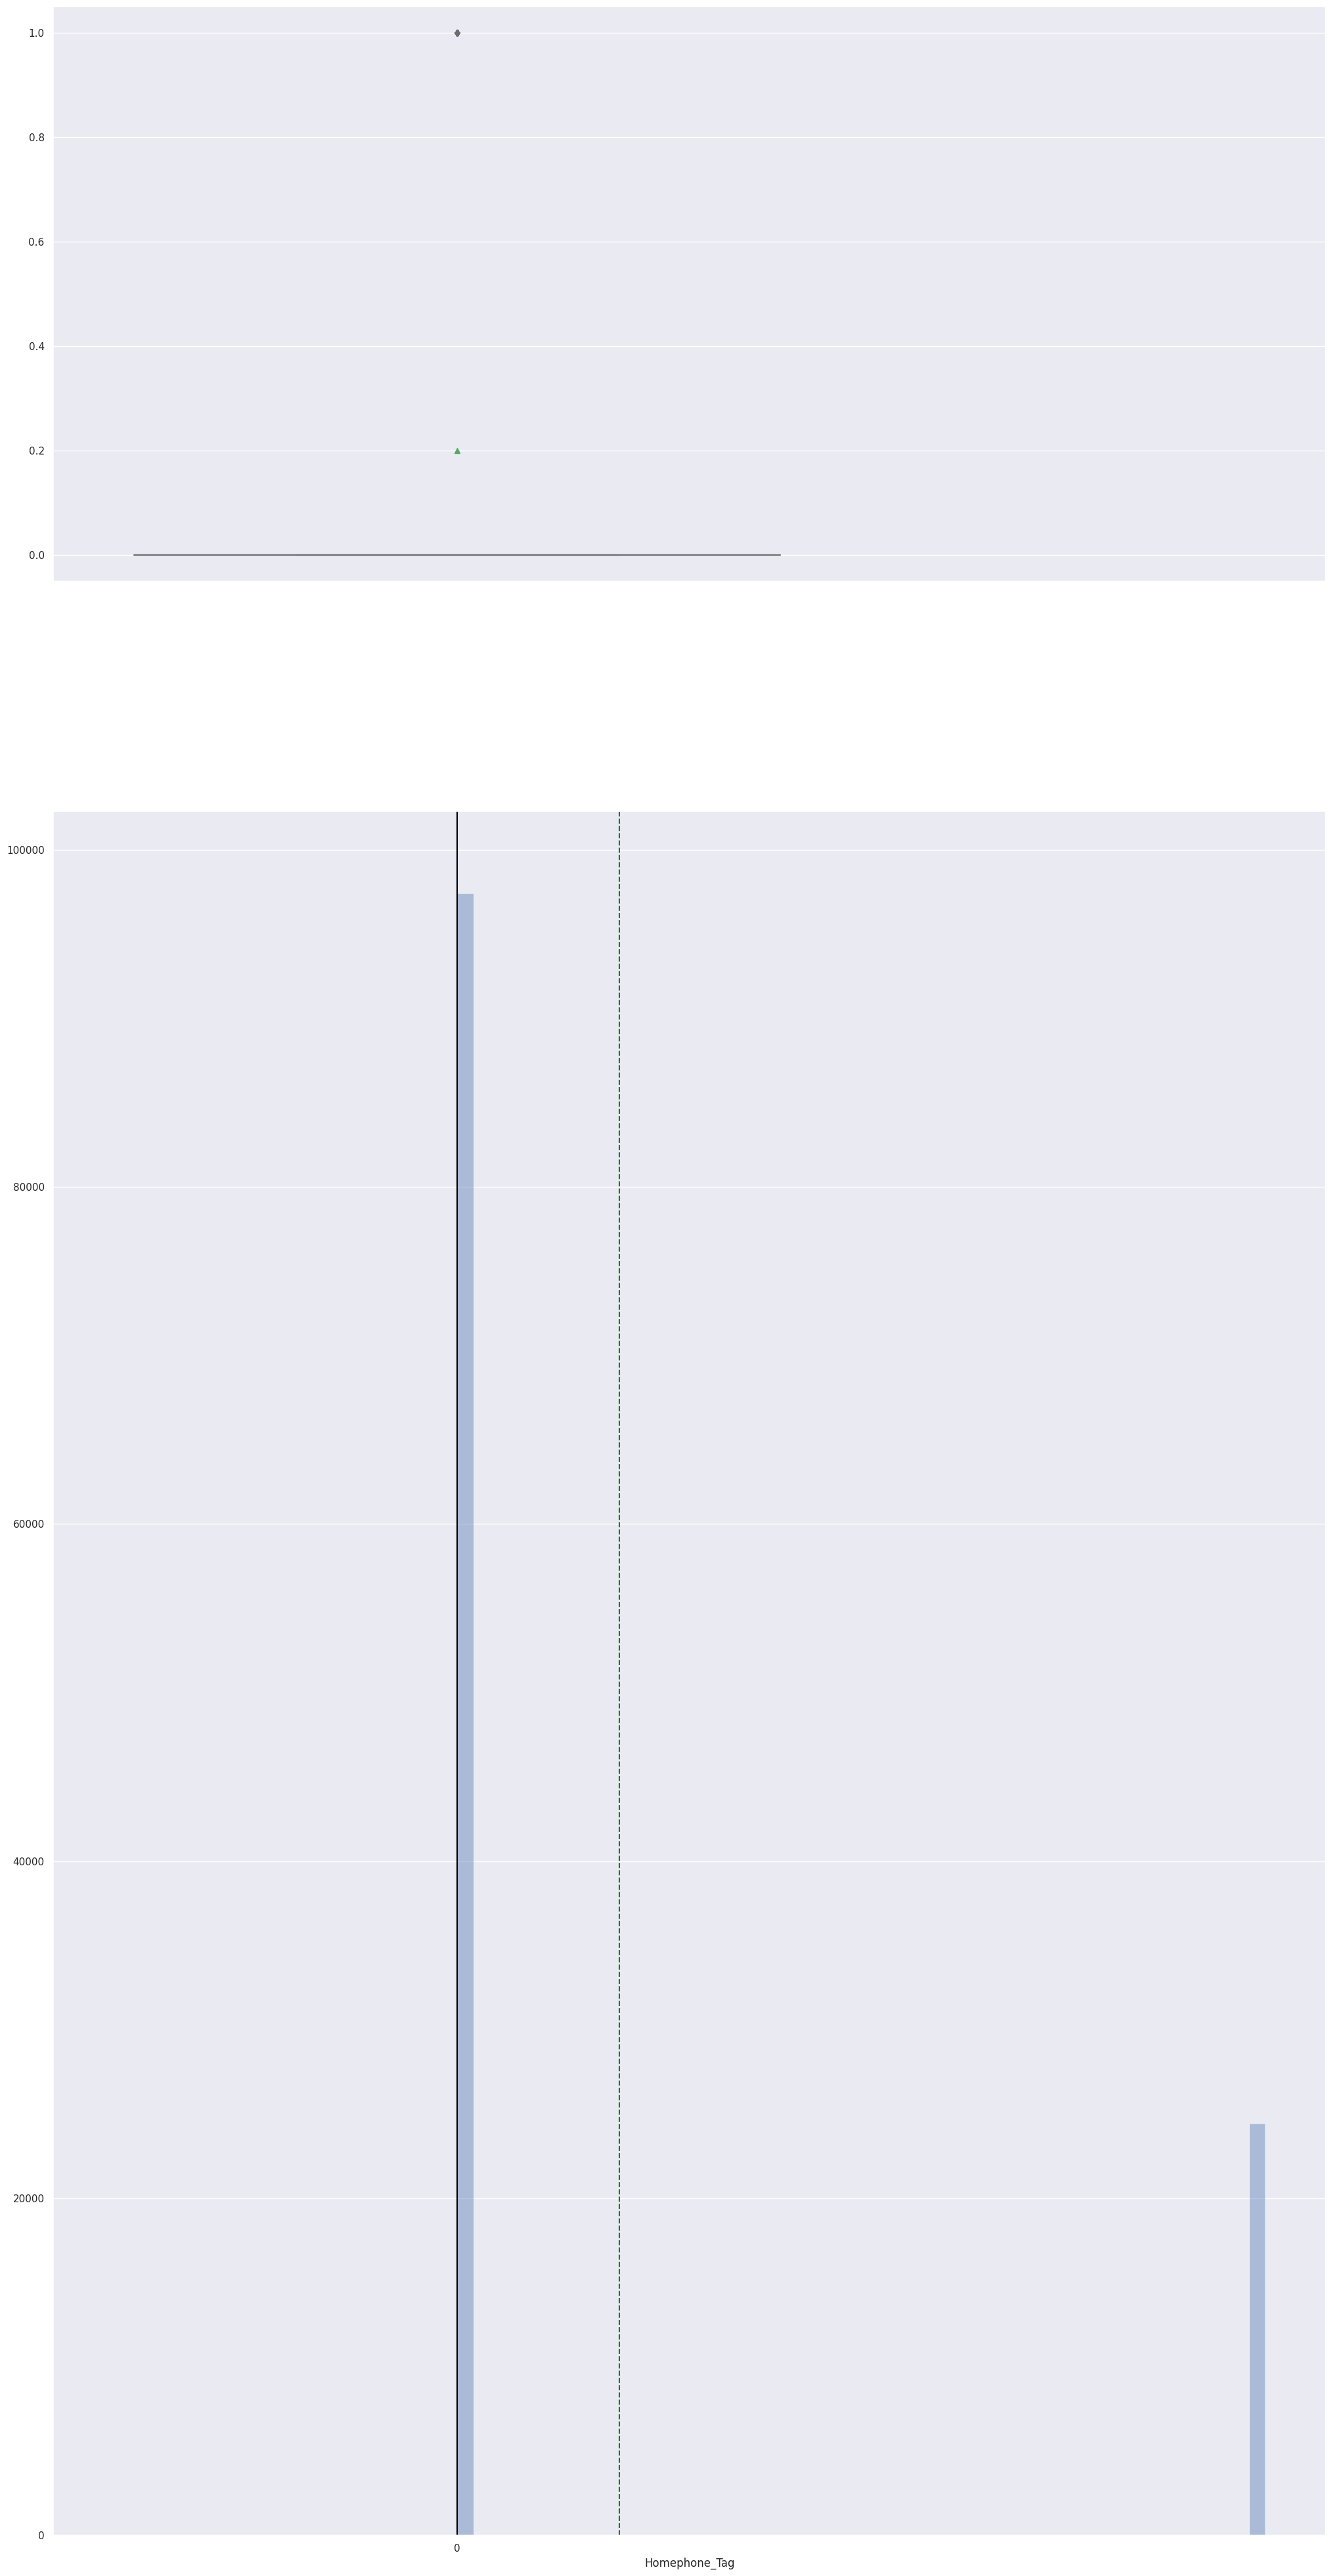

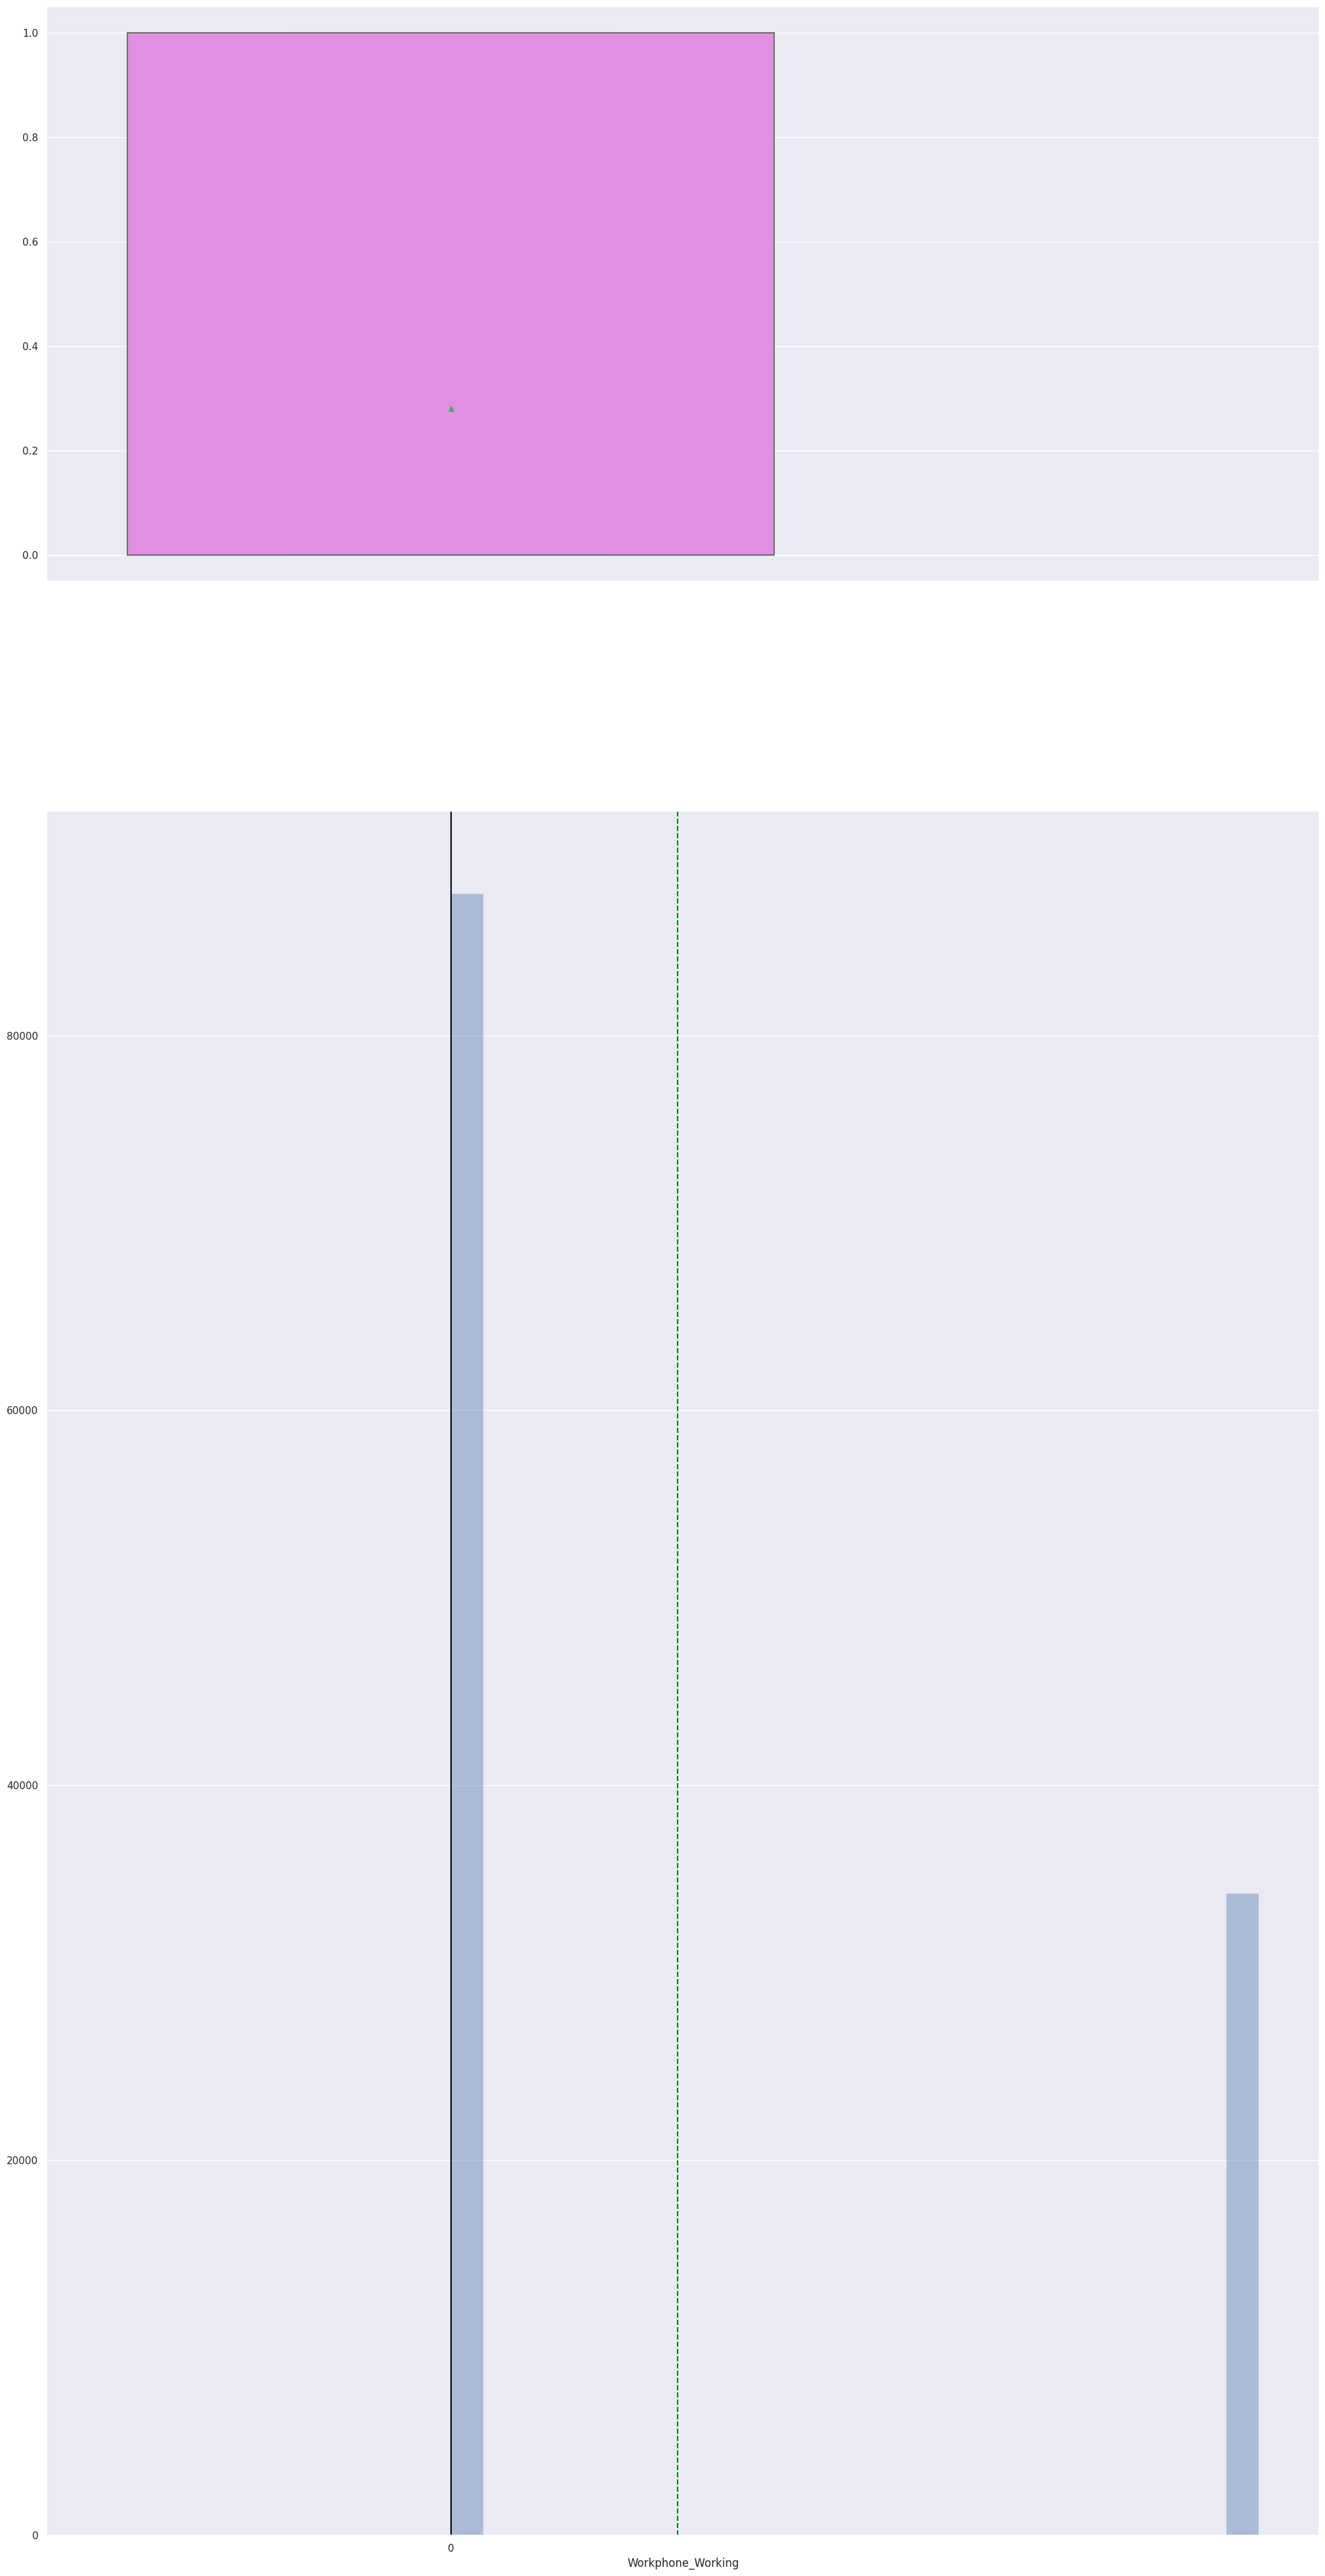

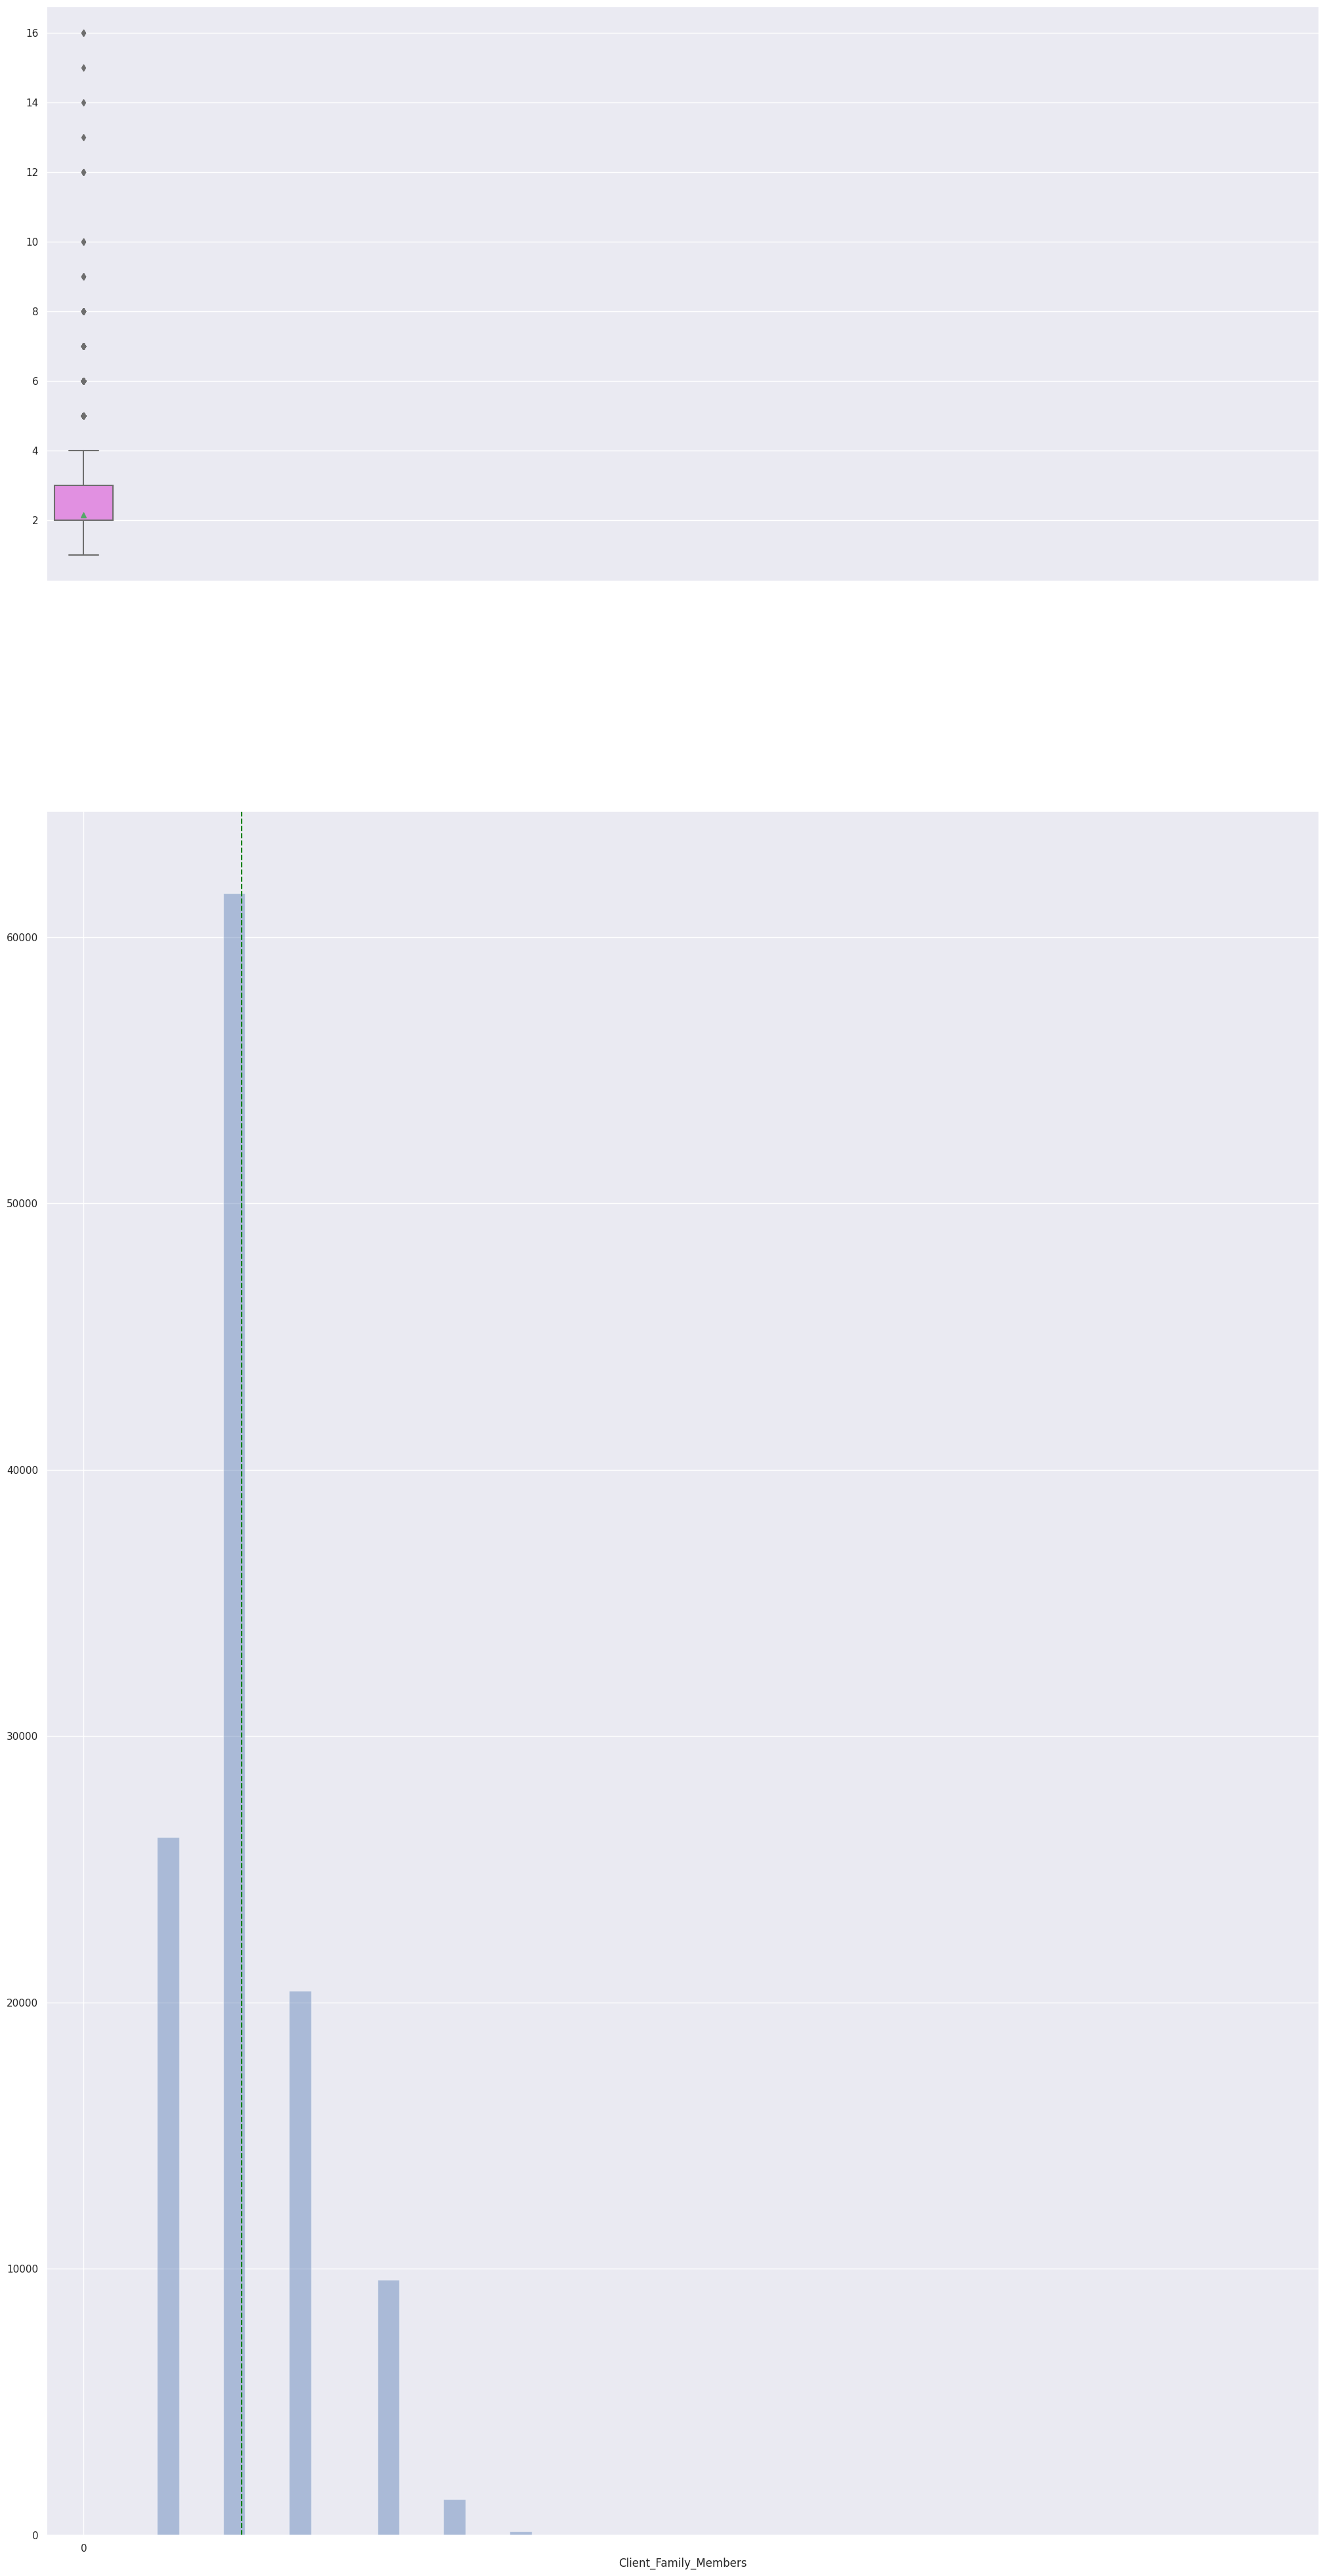

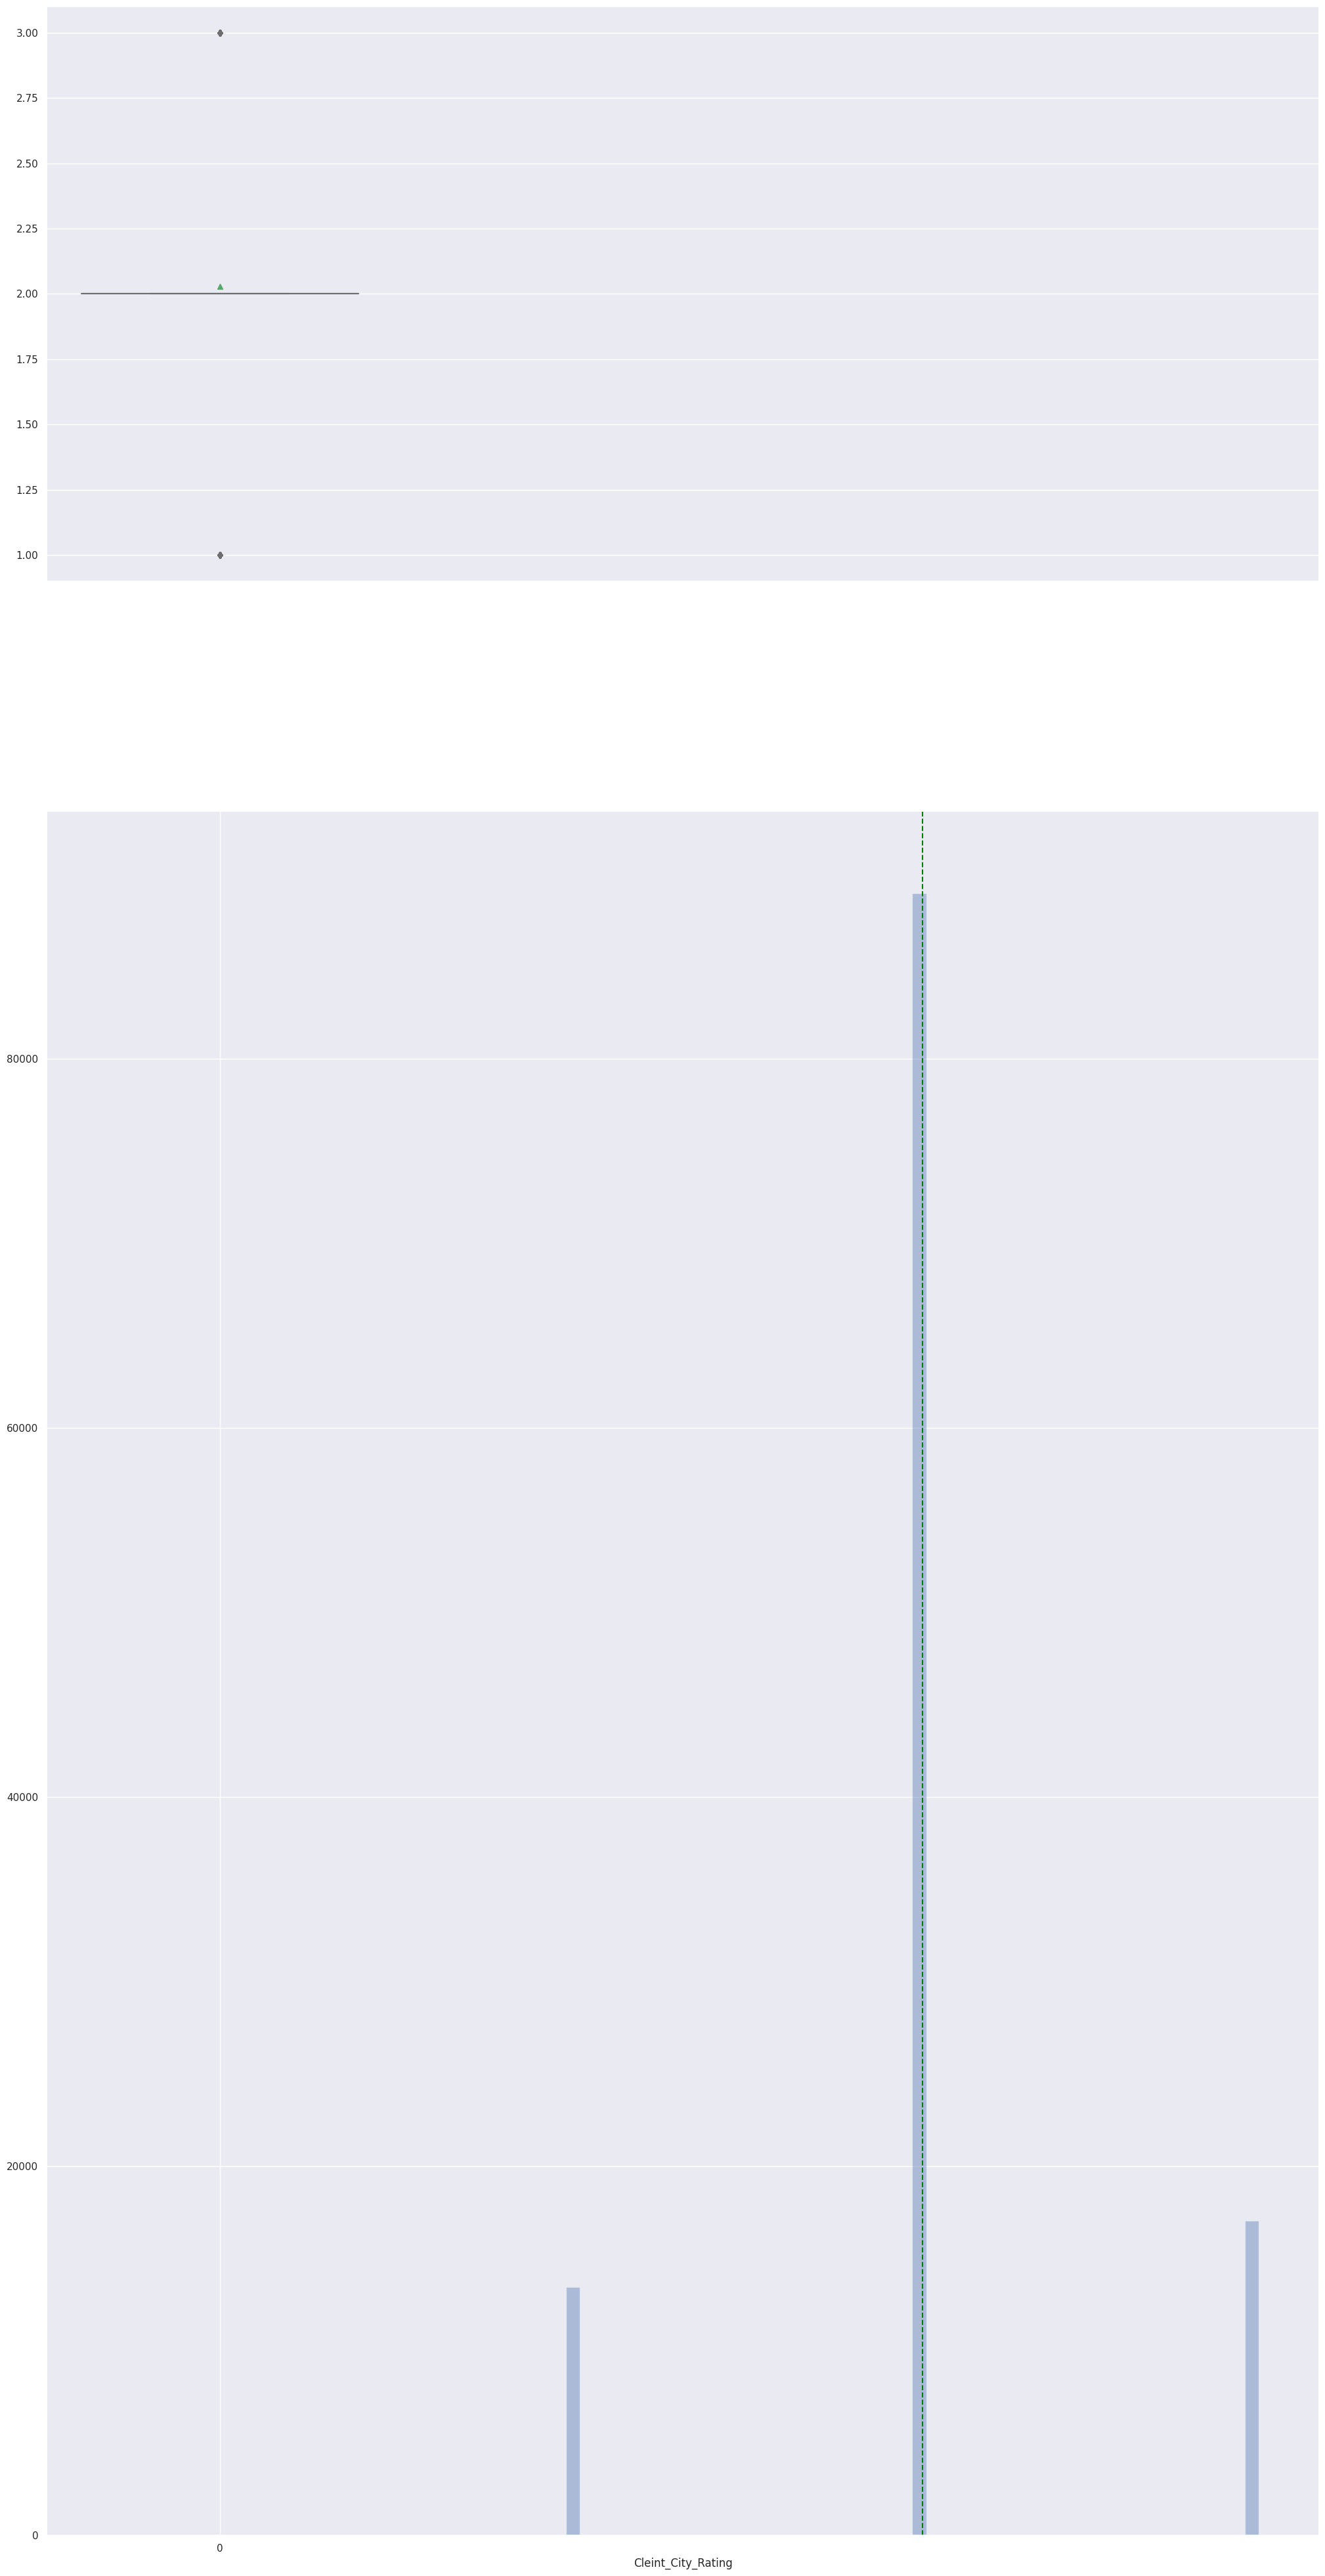

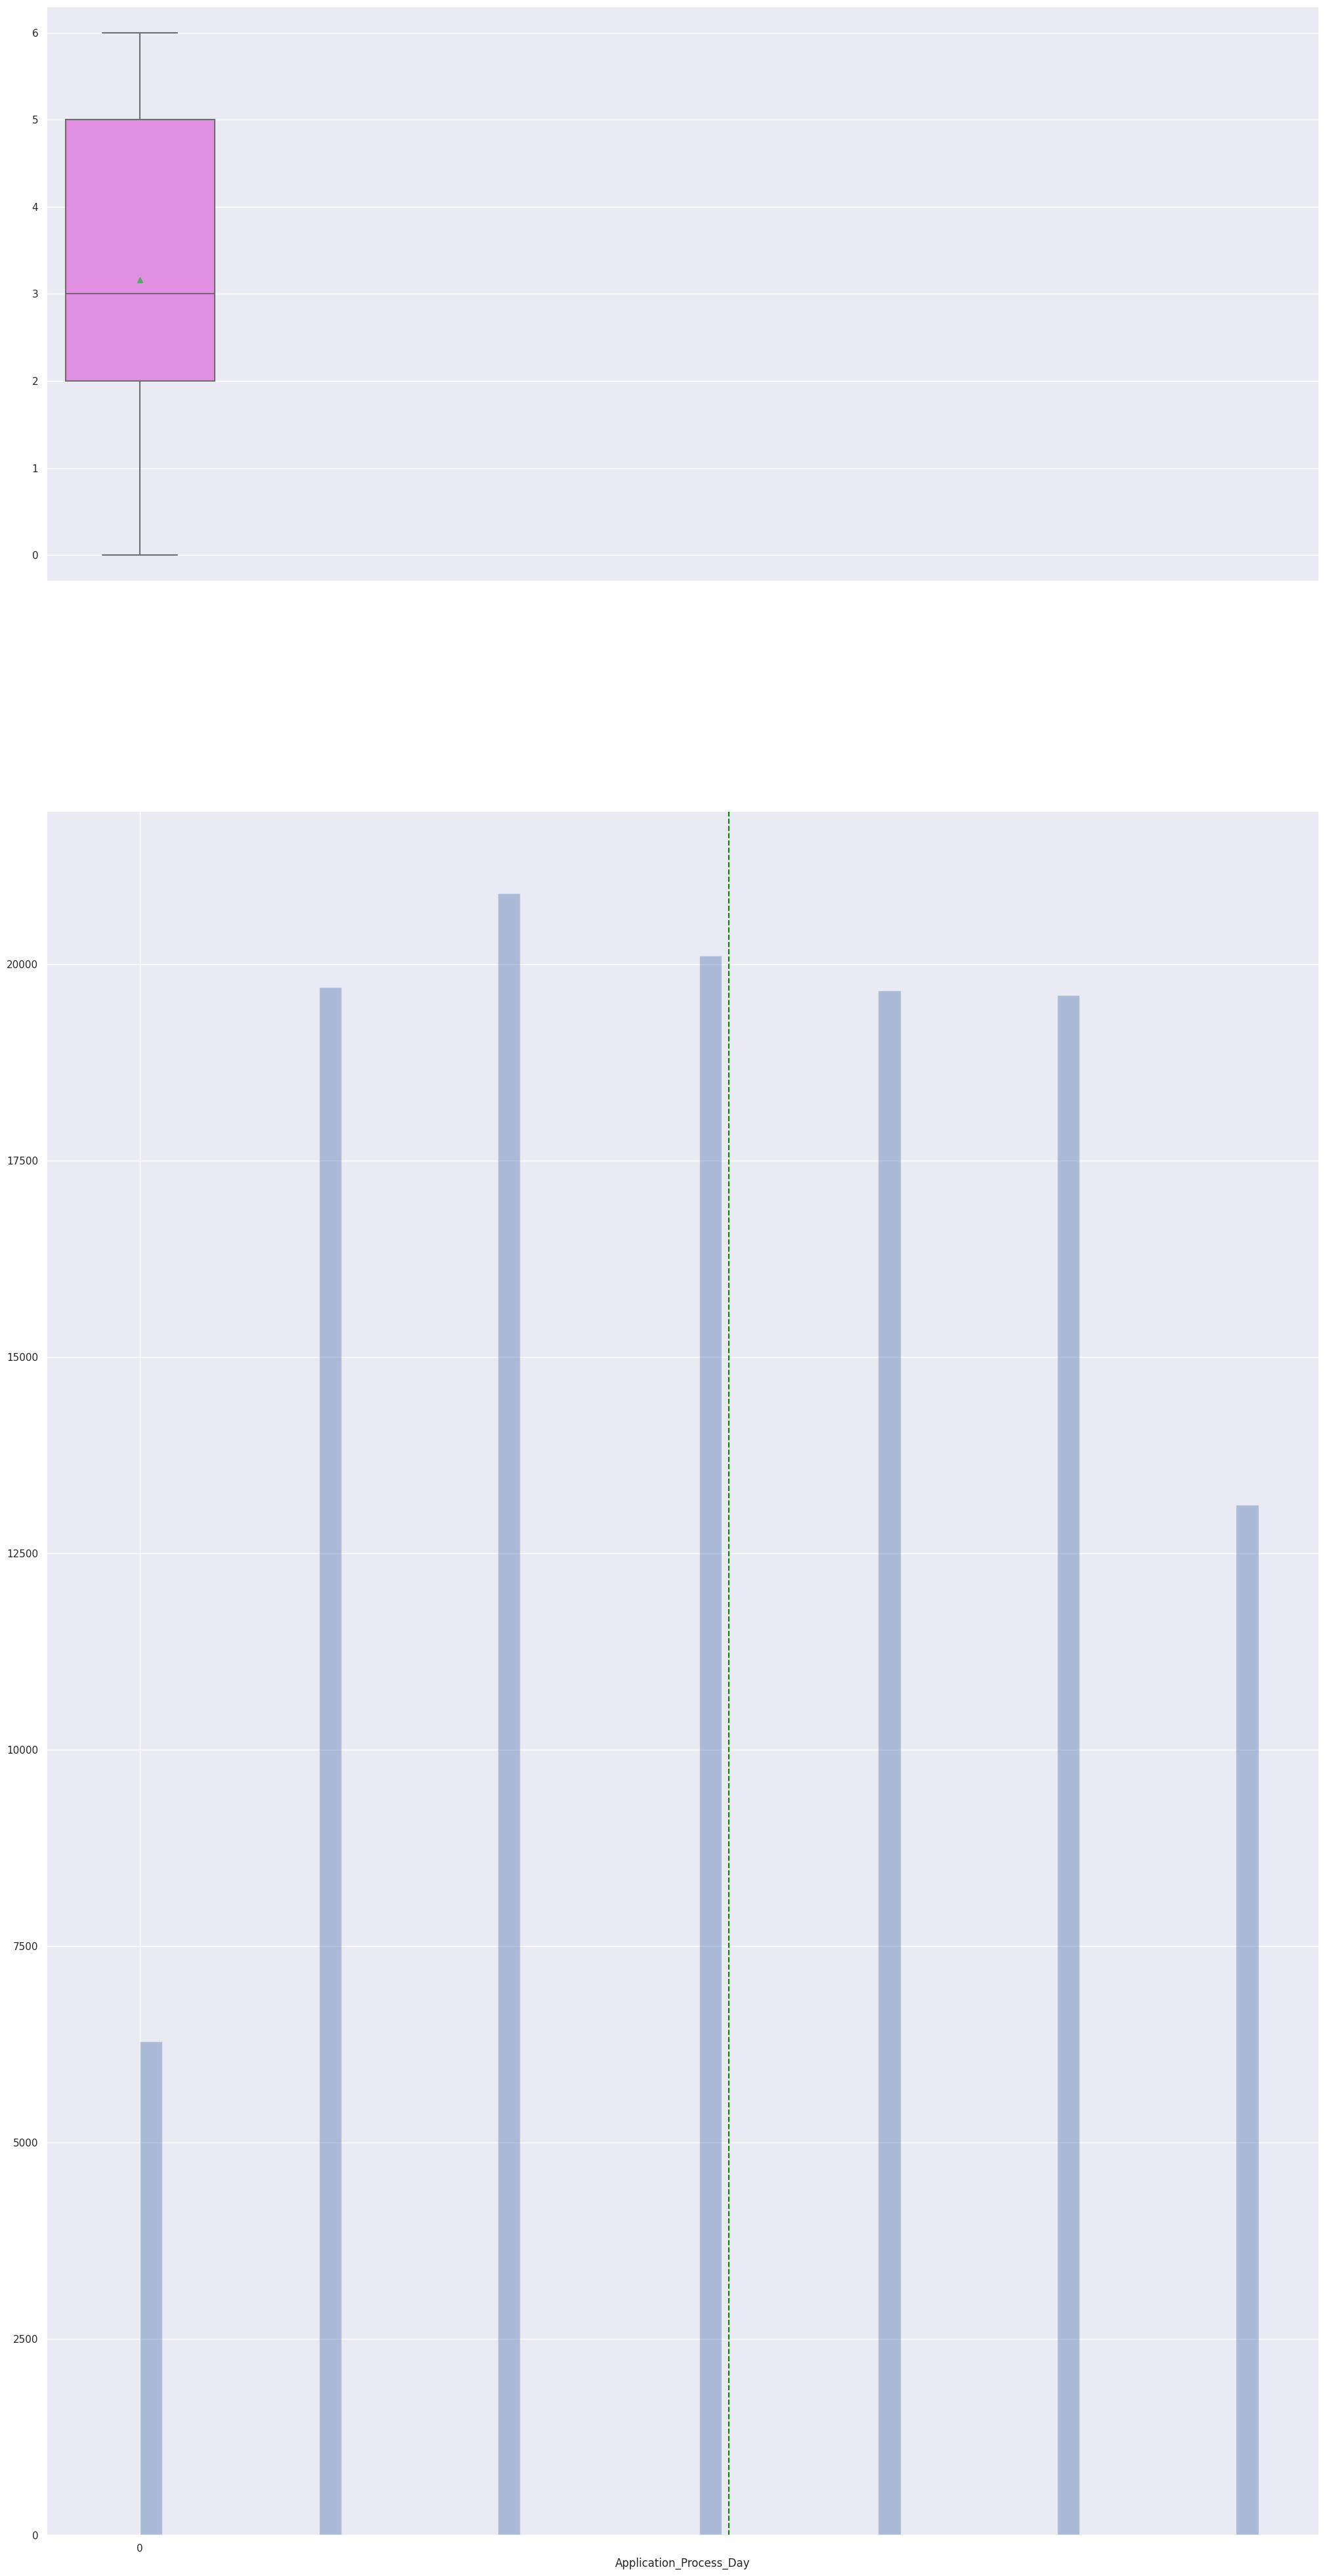

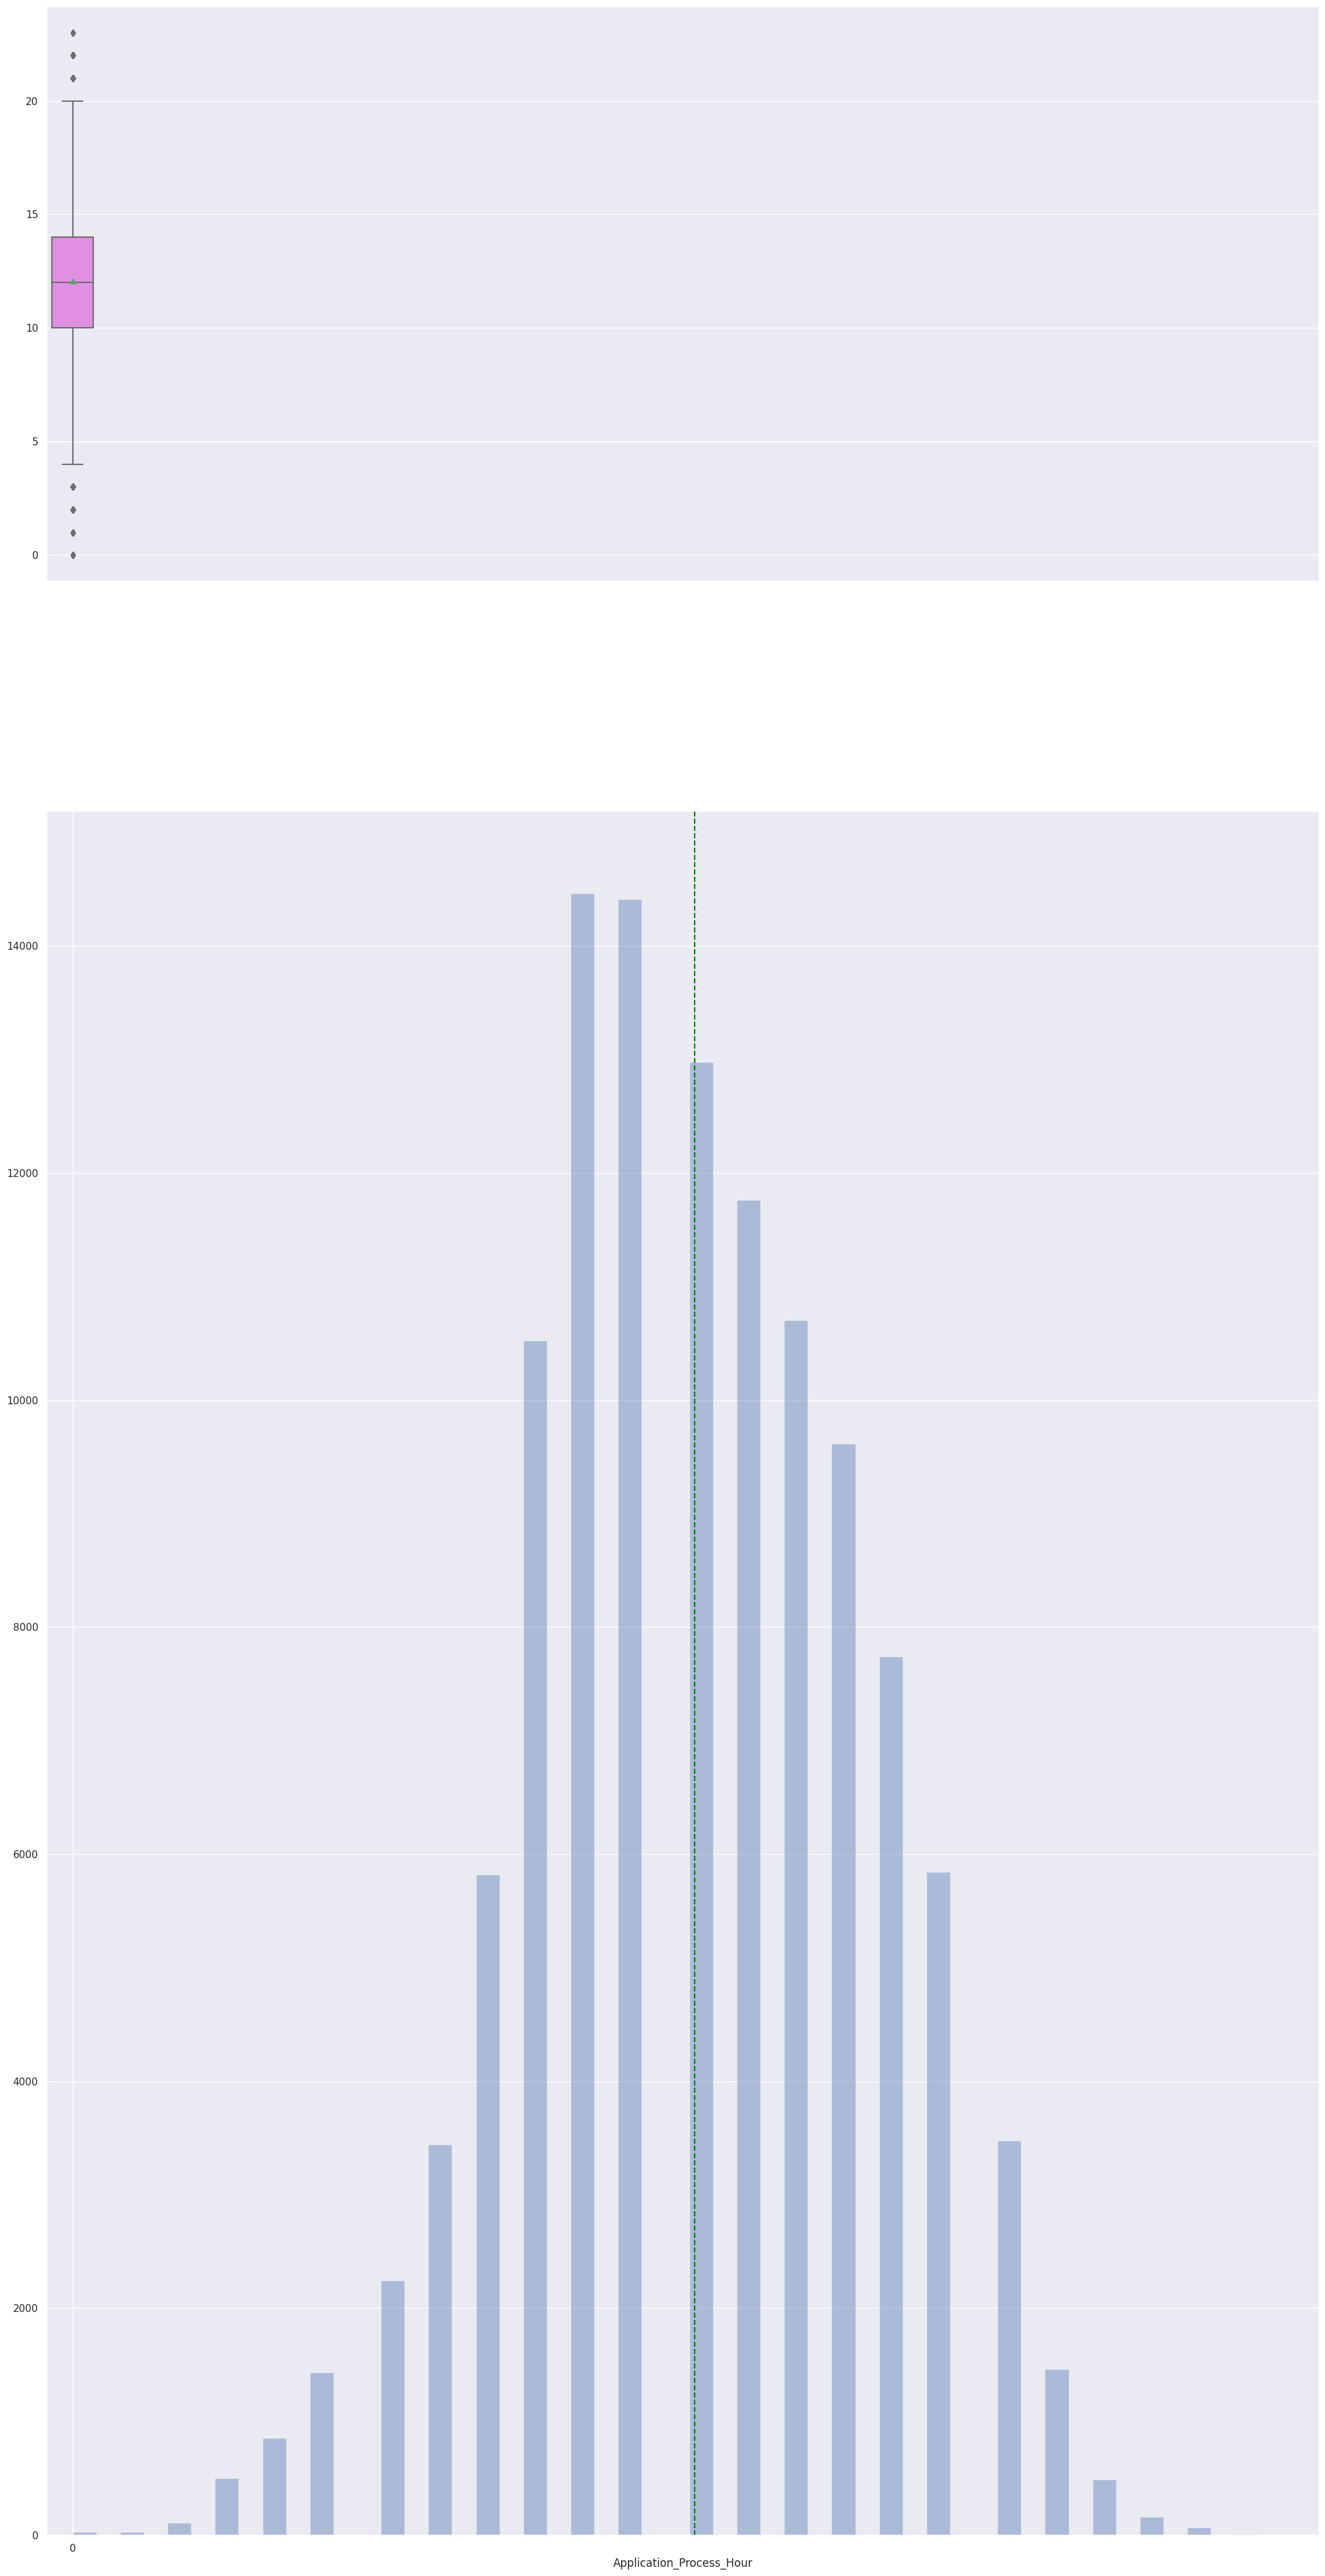

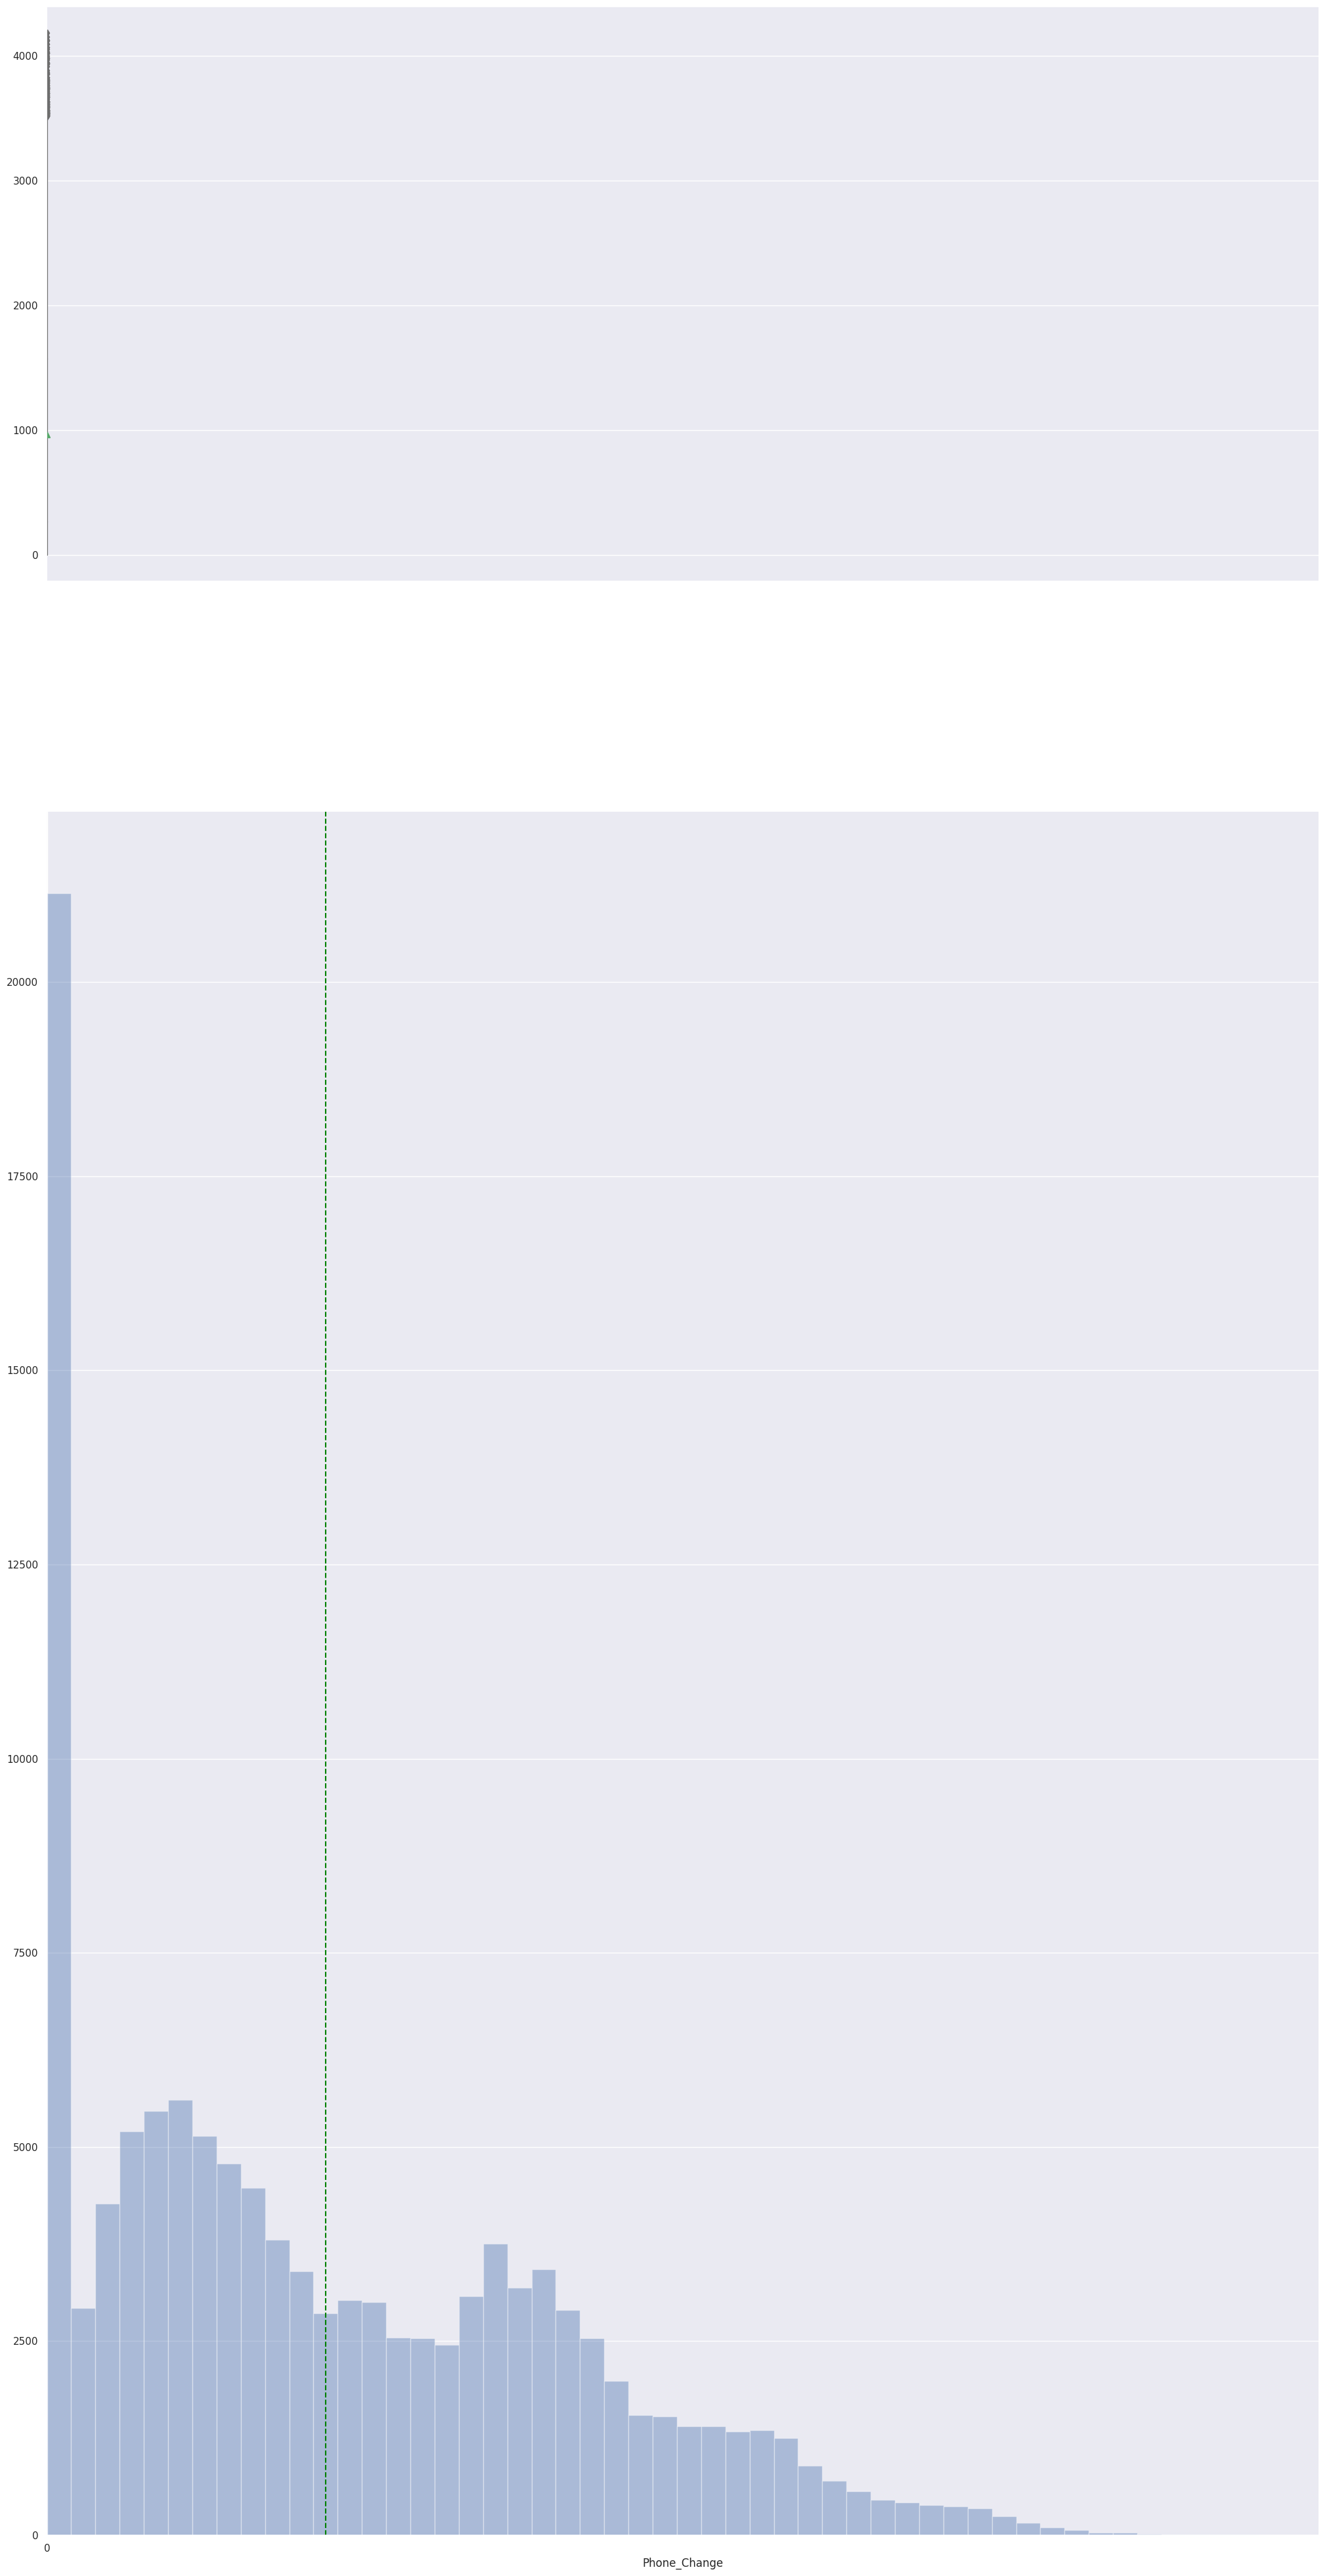

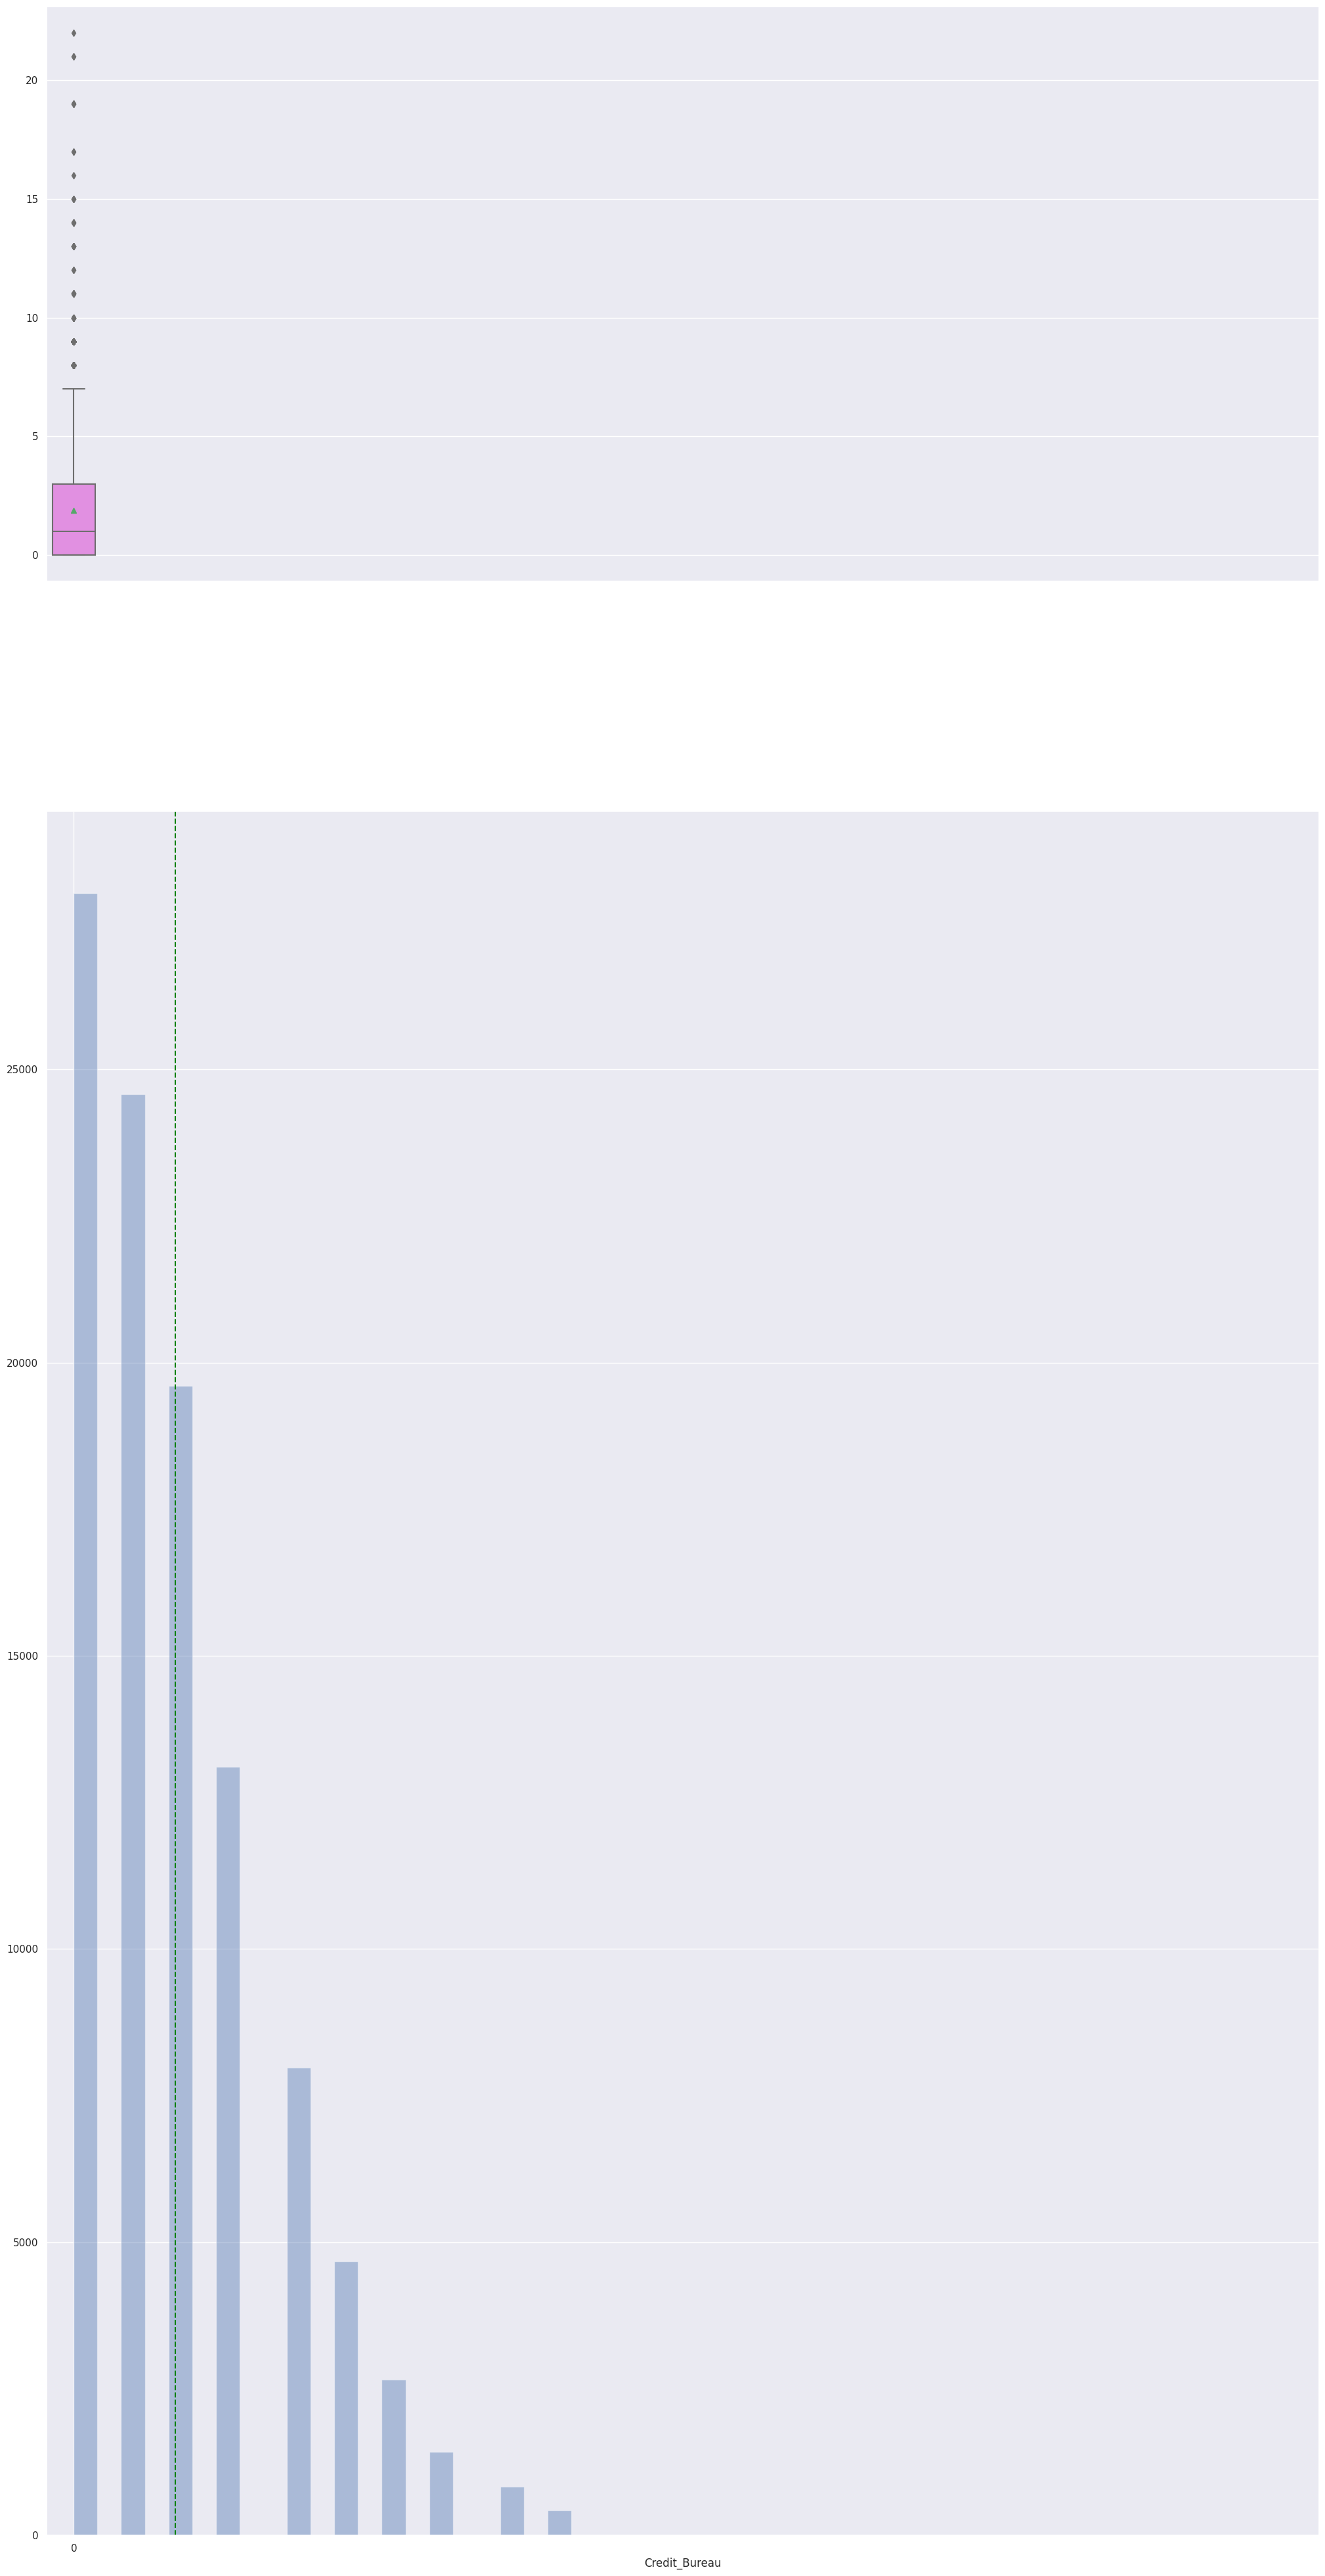

In [24]:
# Building the histogram boxplot for Loan
for i in num_cols:
    histogram_boxplot(data[i])


# **2. Univariate Analysis - Categorical Data**

In [25]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage

    plt.show() # show the plot

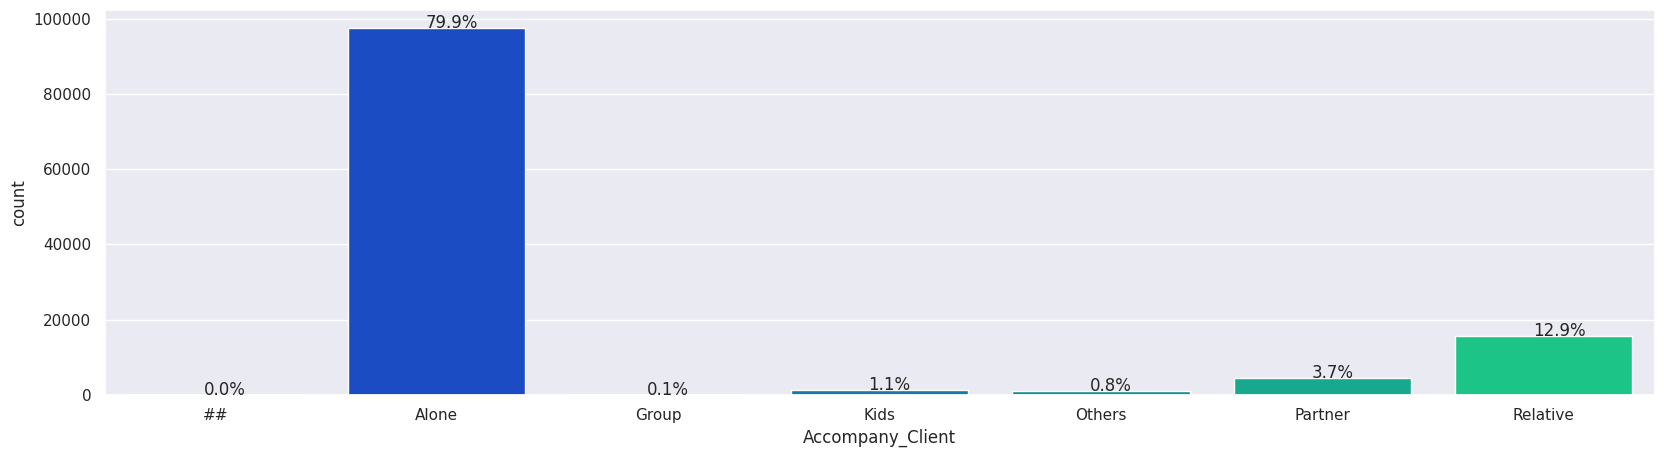

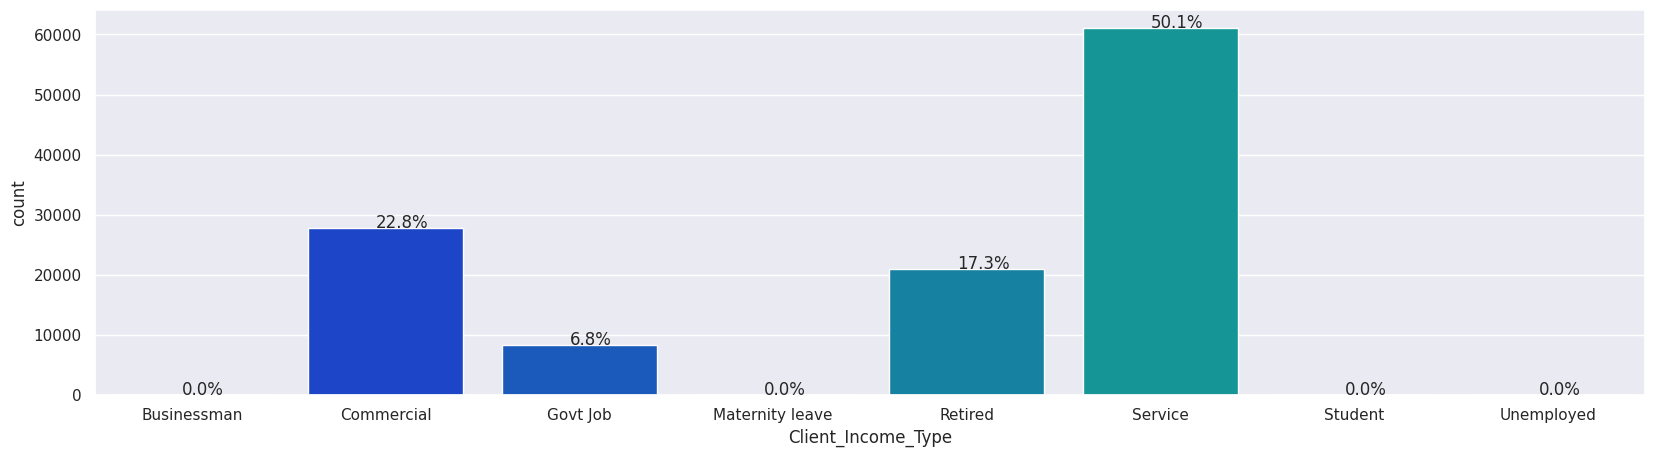

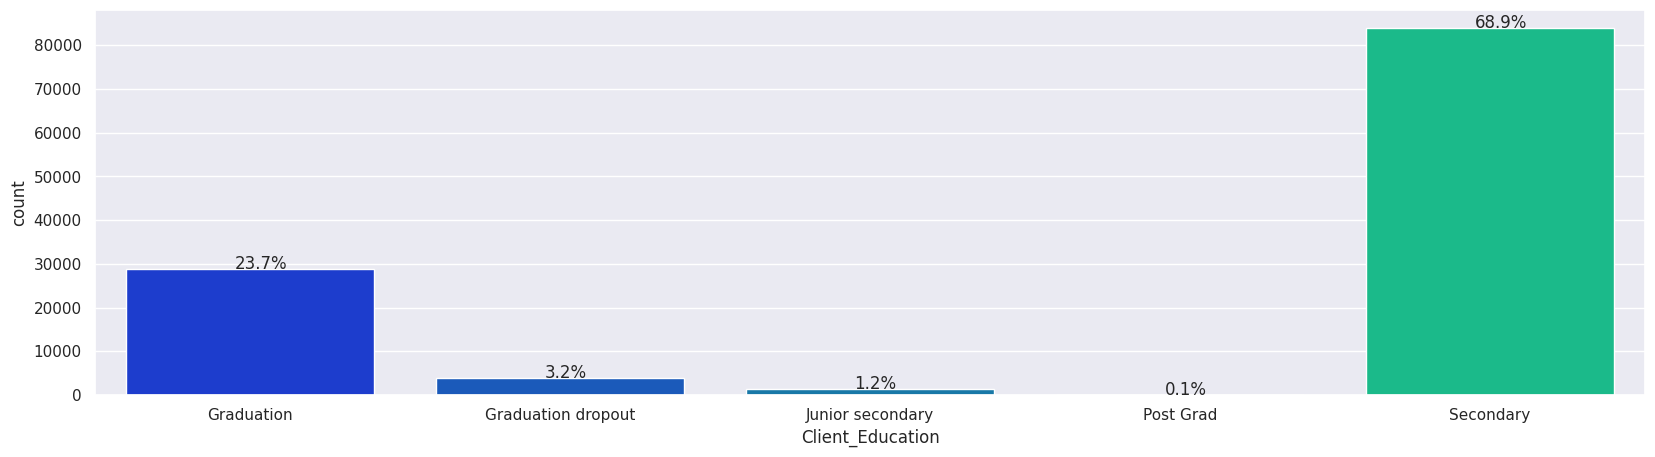

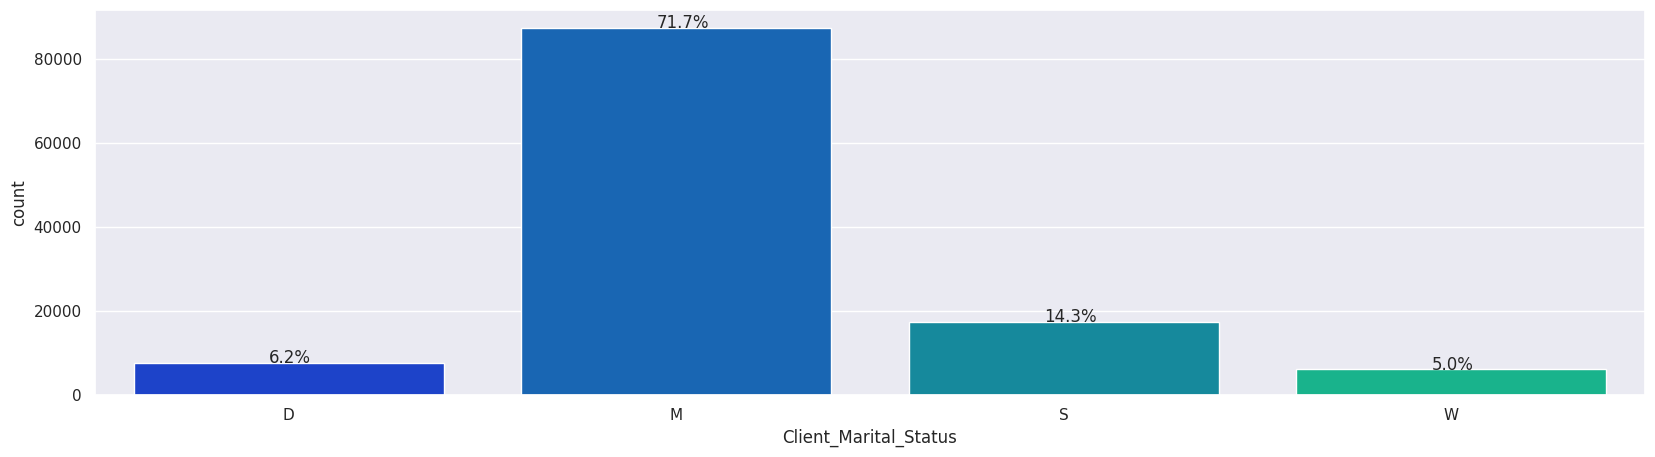

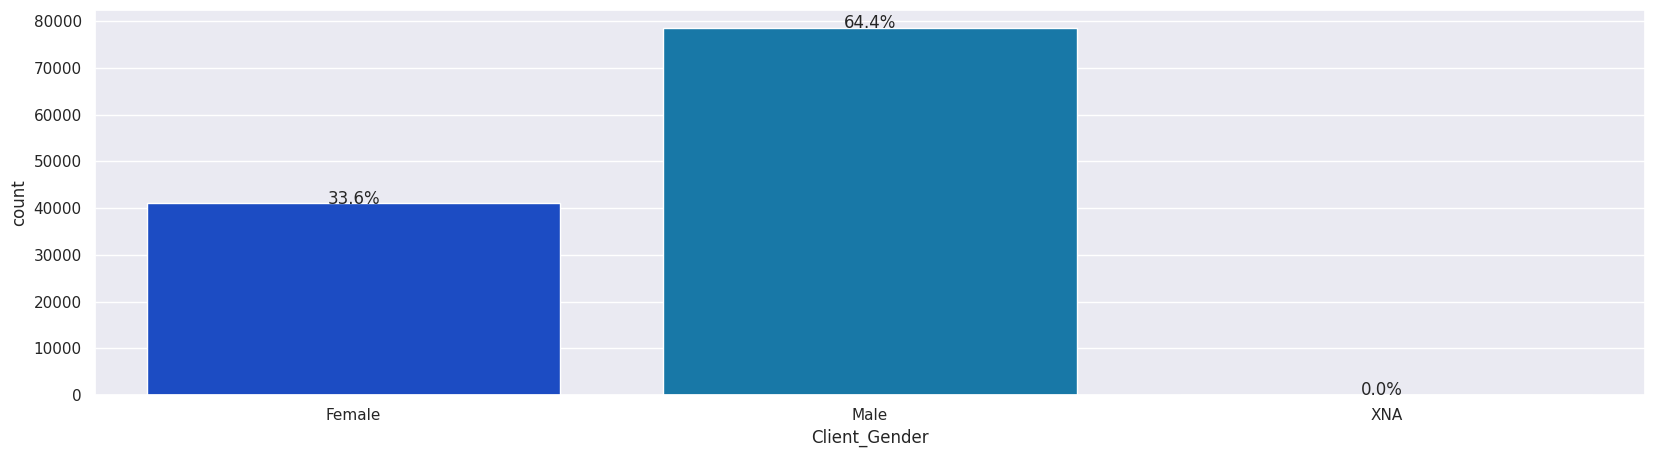

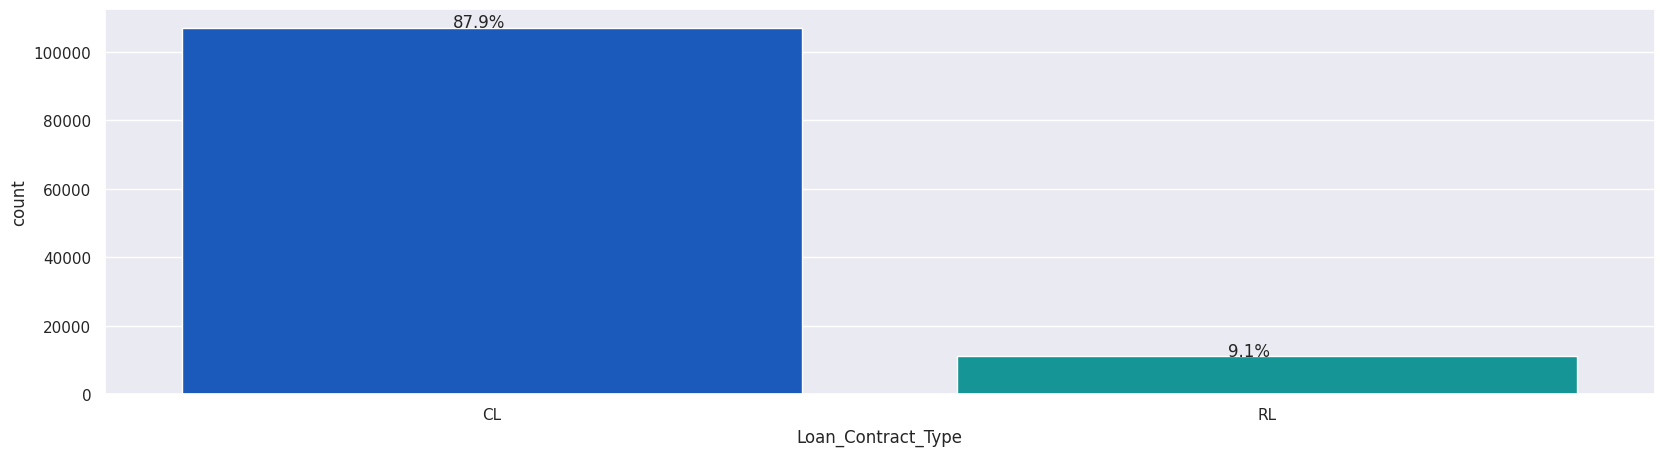

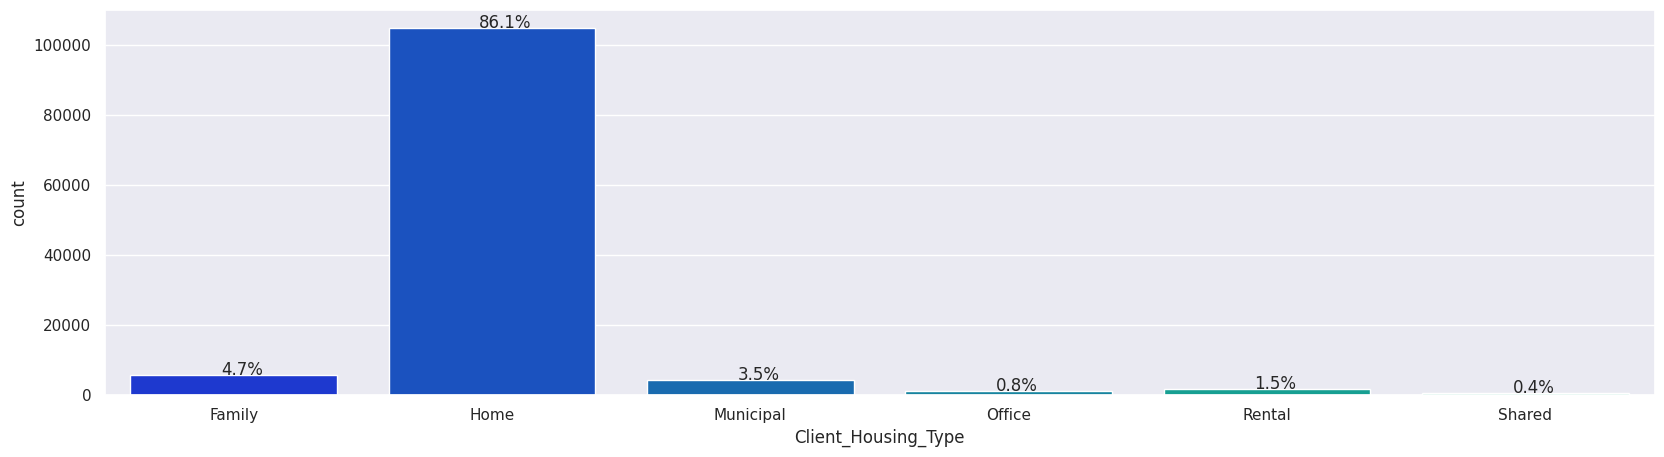

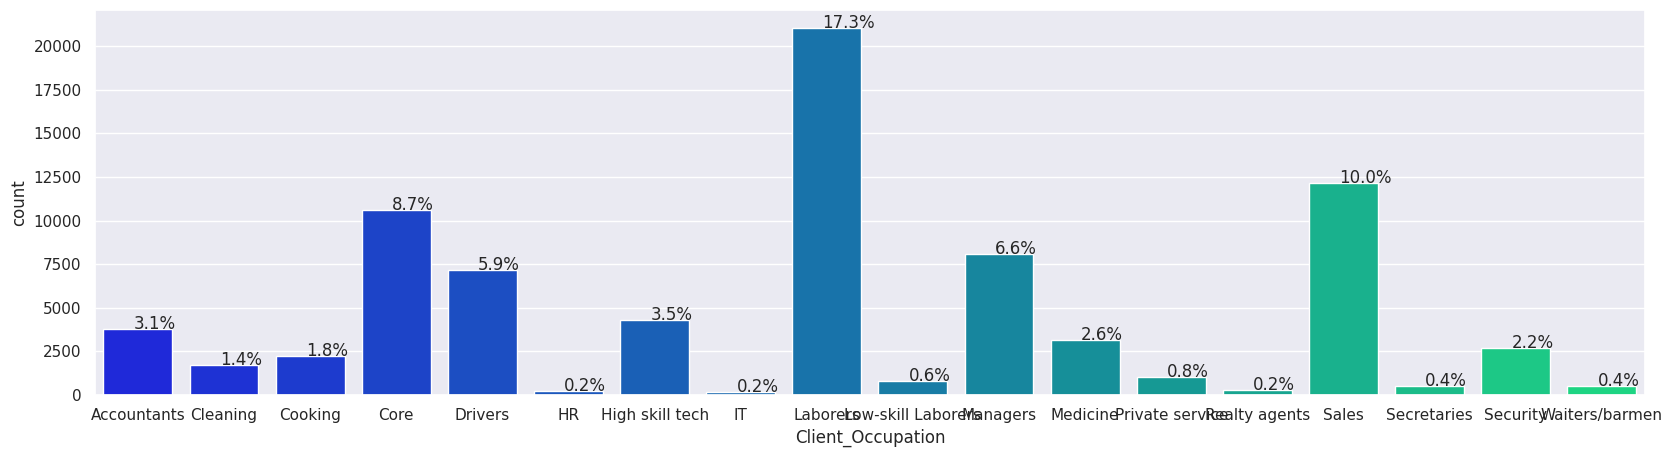

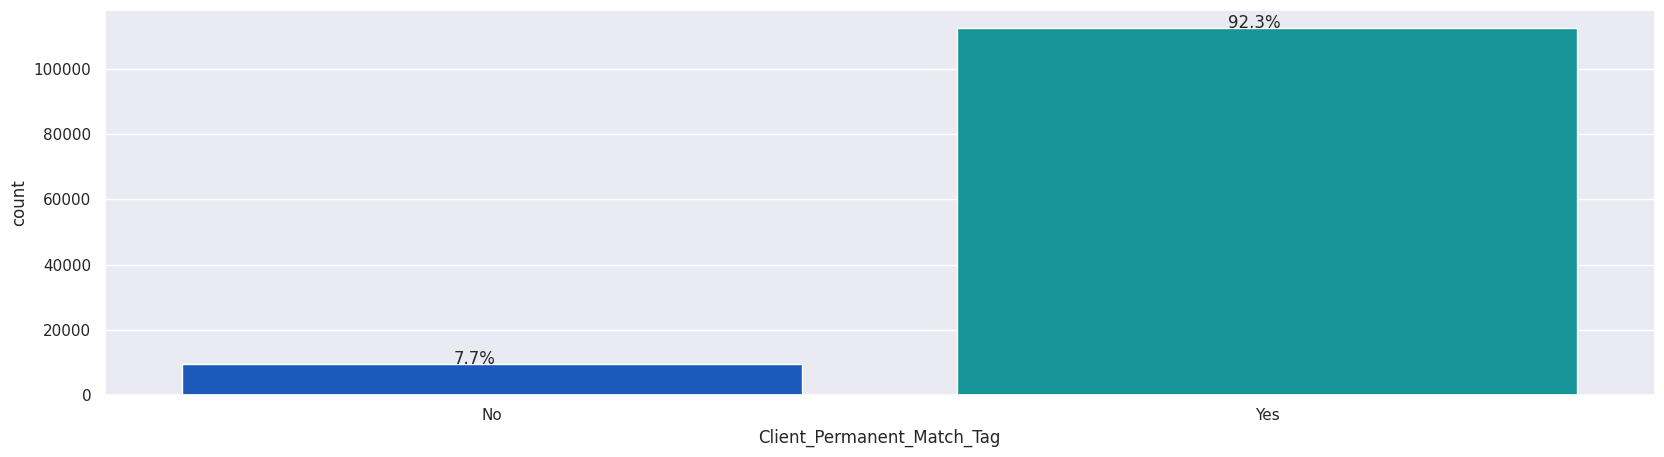

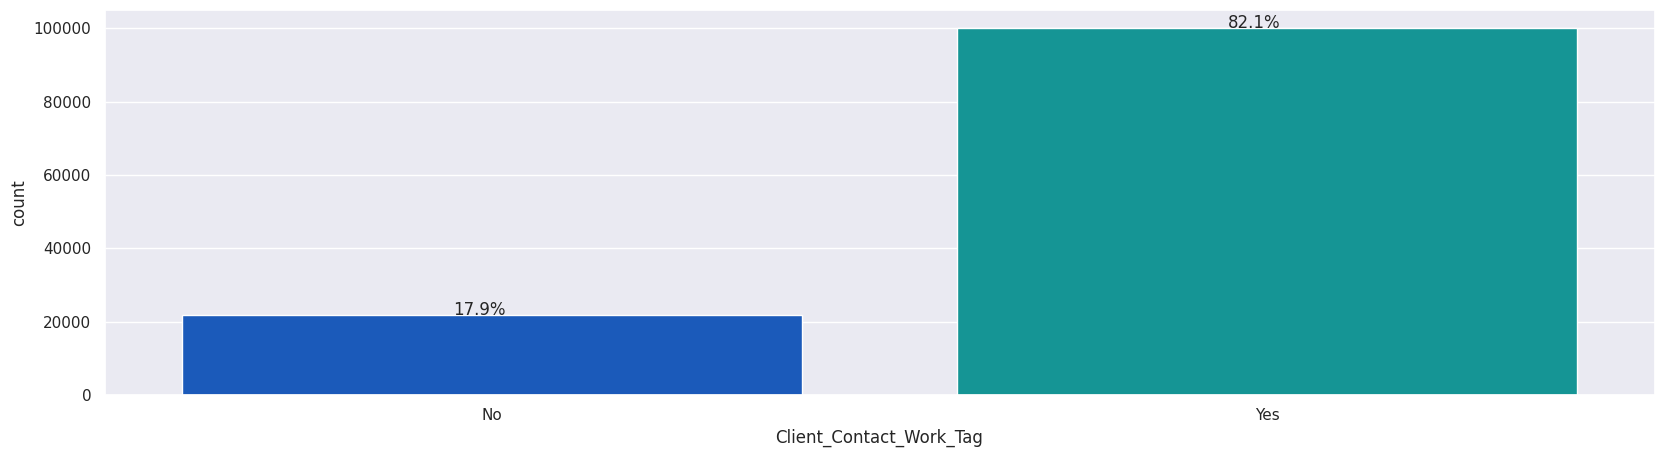

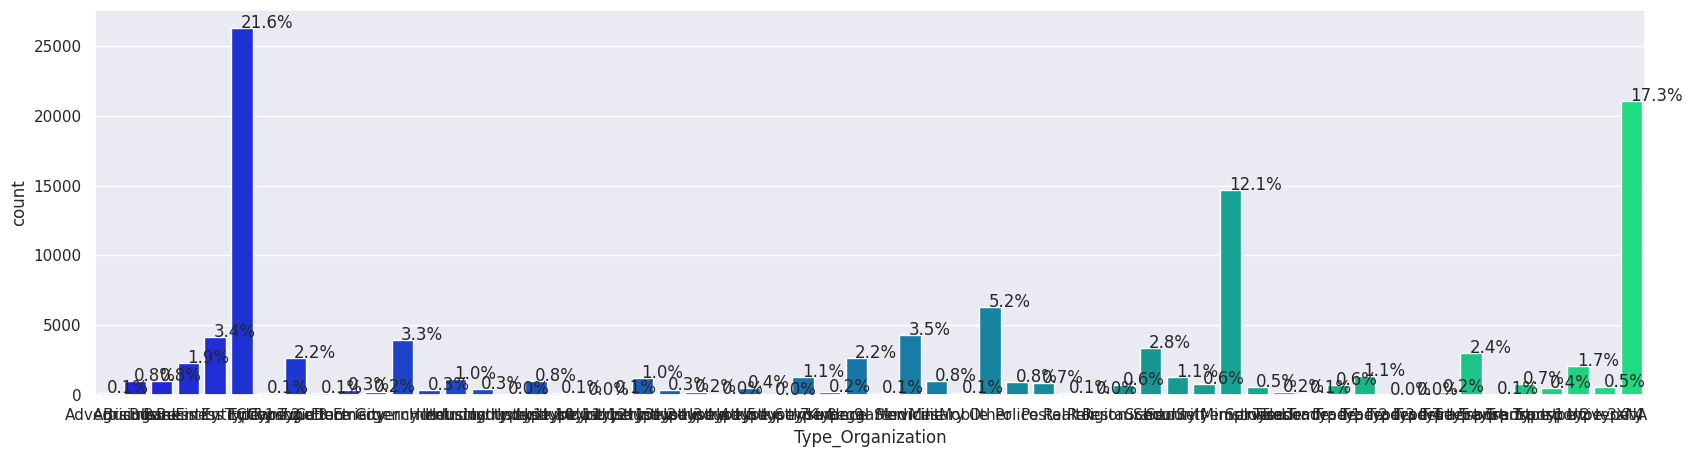

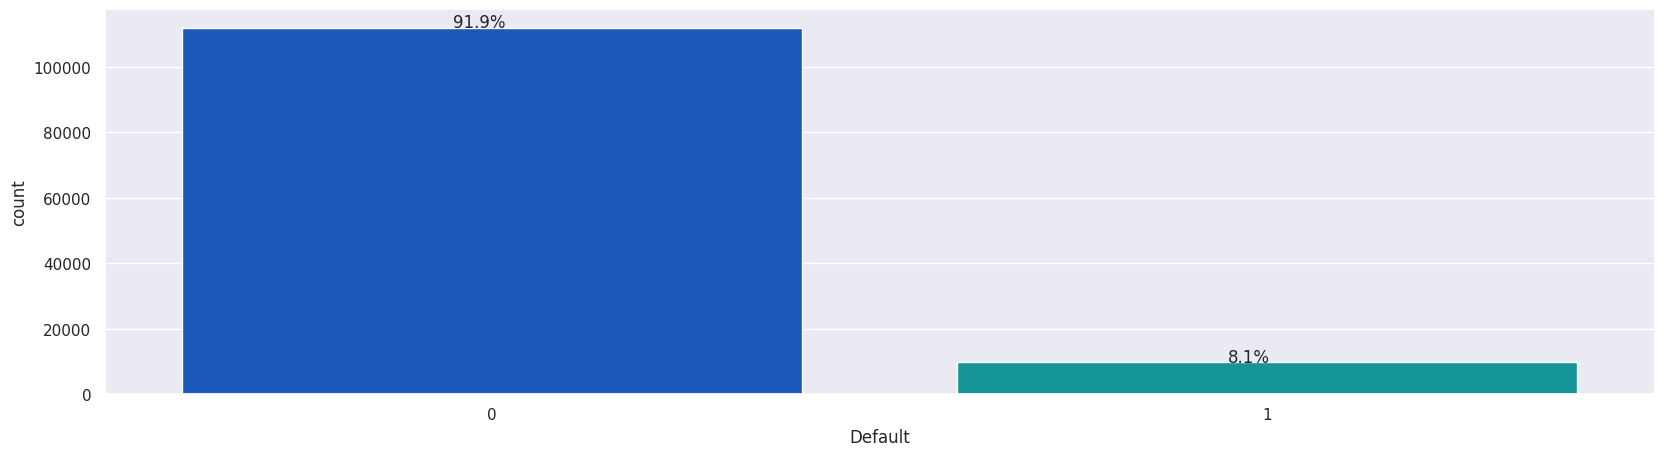

In [26]:
for i in cols:
    plt.figure(figsize=(20, 5))
    if data[i].dtype == 'O':  # Check if the column is of object (string) type
        ax = sns.countplot(data[i], palette='winter')
        perc_on_bar(ax, data[i])
    else:
        ax = sns.countplot(x=i, data=data, palette='winter')
        perc_on_bar(ax, data[i])

    plt.show()


# **Bivariate Analysis**
Bivariate Analysis: Continuous and Categorical Variables
Analyze BAD vs Loan

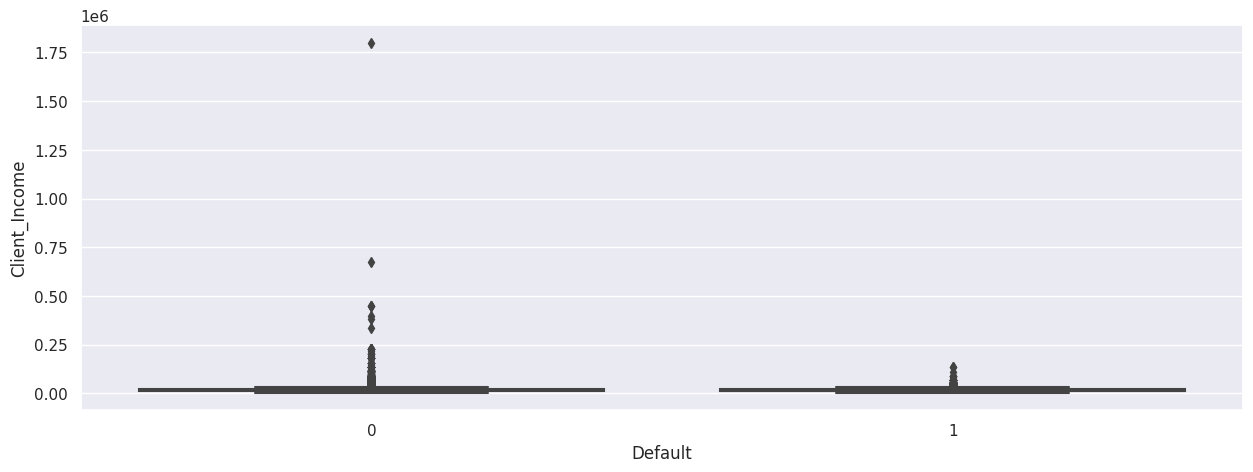

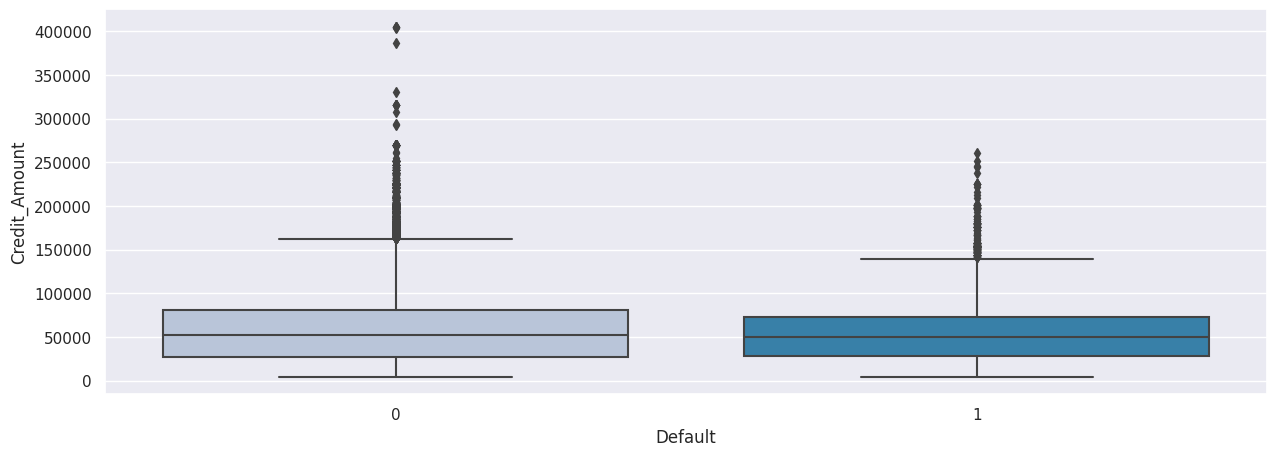

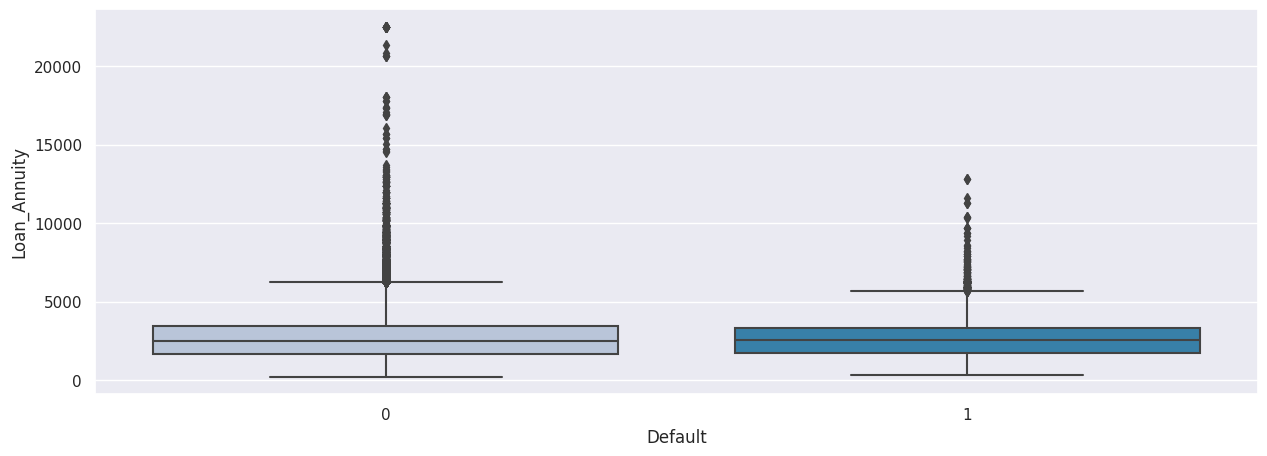

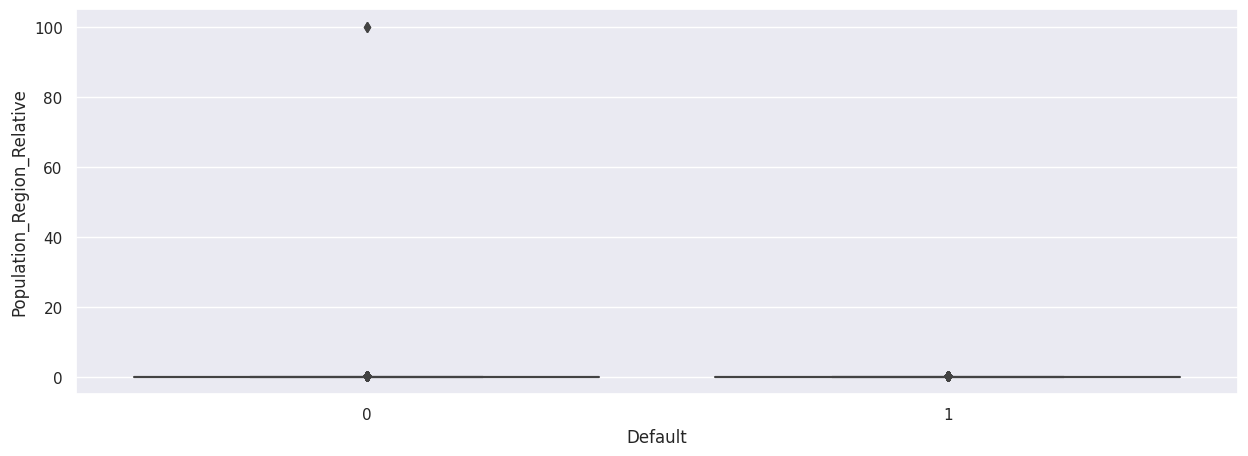

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
sns.boxplot(x=data["Default"], y=data['Client_Income'], palette="PuBu")
plt.show()

plt.figure(figsize=(15, 5))
sns.boxplot(x=data["Default"], y=data['Credit_Amount'], palette="PuBu")
plt.show()

plt.figure(figsize=(15, 5))
sns.boxplot(x=data["Default"], y=data['Loan_Annuity'], palette="PuBu")
plt.show()

plt.figure(figsize=(15, 5))
sns.boxplot(x=data["Default"], y=data['Population_Region_Relative'], palette="PuBu")
plt.show()


**Bivariate Analysis: BAD vs Categorical Variables
The stacked bar**

In [28]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['Default'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['Default'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

Default                0     1     All
Accompany_Client                      
##                    10     2      12
Alone              89400  8009   97409
Group                 97     7     104
Kids                1244    90    1334
Others               902    85     987
Partner             4158   358    4516
Relative           14577  1171   15748
All               110388  9722  120110
------------------------------------------------------------------------------------------------------------------------


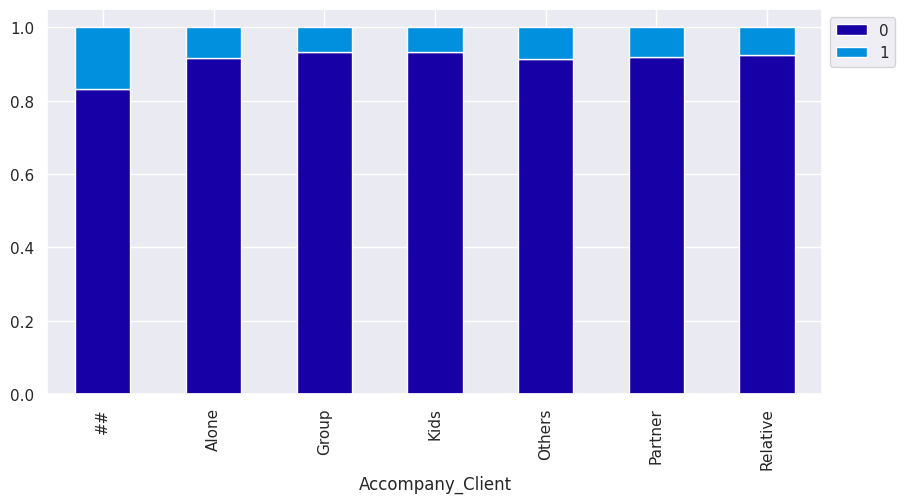

Default                  0     1     All
Client_Income_Type                      
Businessman              1     0       1
Commercial           25657  2107   27764
Govt Job              7819   484    8303
Maternity leave          2     0       2
Retired              19877  1166   21043
Service              55242  5786   61028
Student                  8     0       8
Unemployed               3     3       6
All                 108609  9546  118155
------------------------------------------------------------------------------------------------------------------------


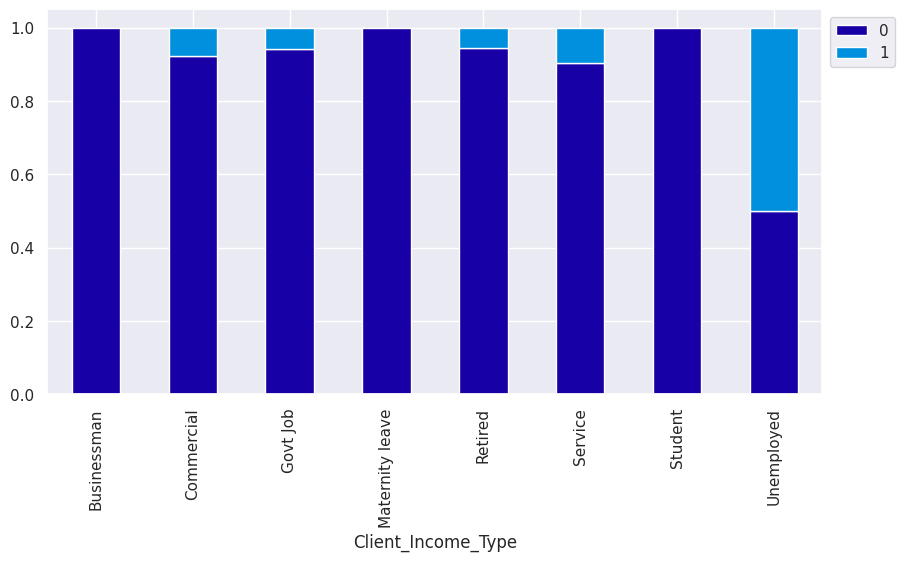

In [29]:
# Plotting stacked bar plot for BAD and REASON
stacked_plot(data['Accompany_Client'])
stacked_plot(data['Client_Income_Type'])

**Multivariate Analysis**

Analyze Correlation Heatmap for Numerical Variables

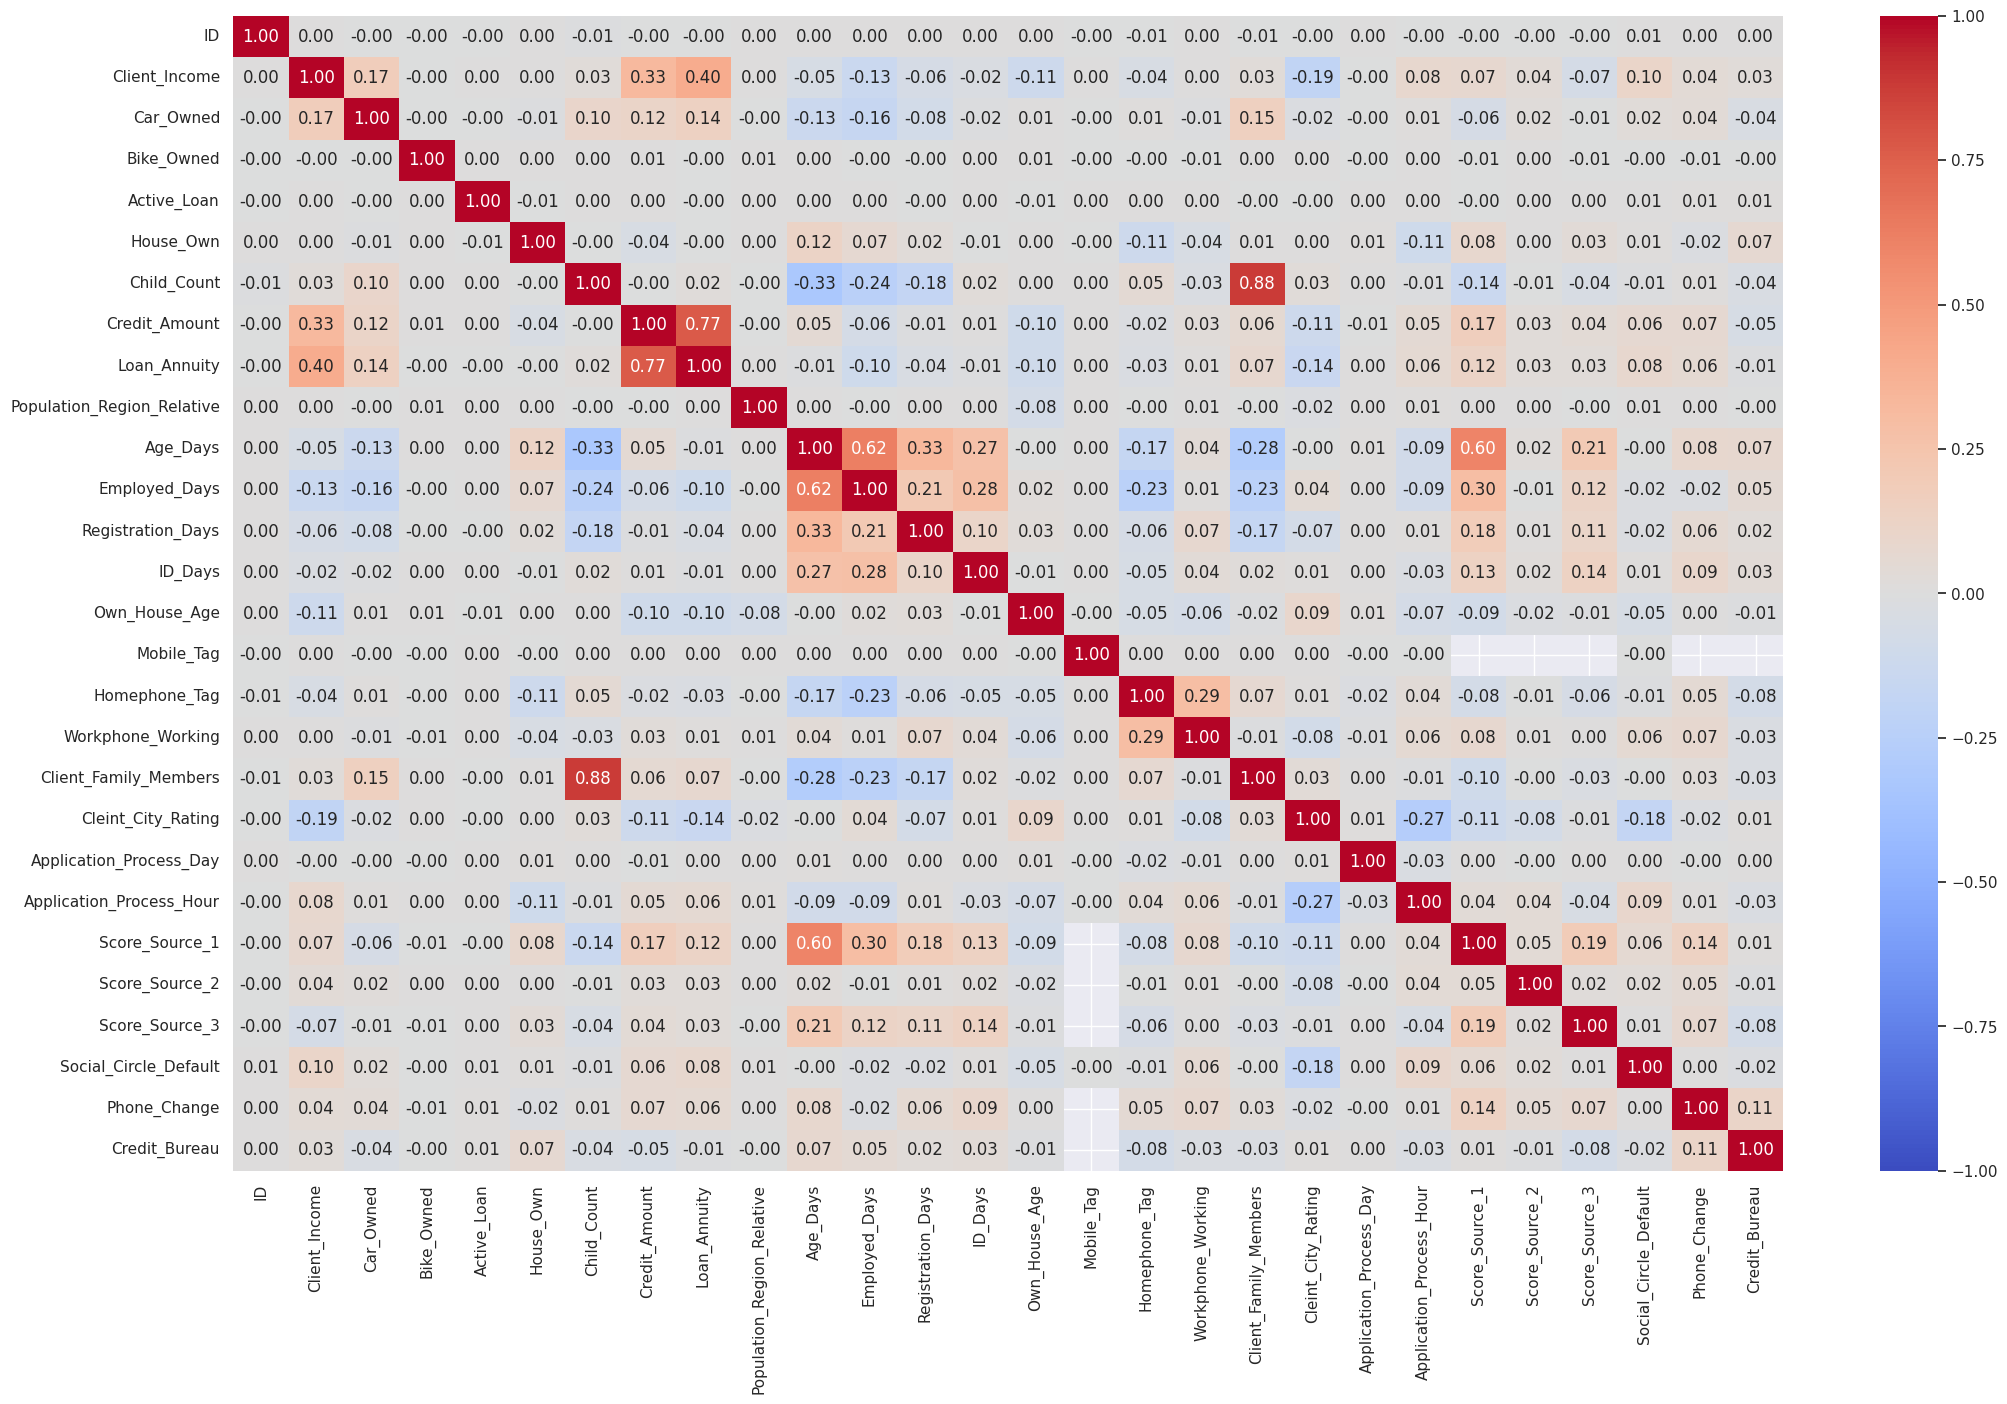

In [30]:
# Separating numerical variables
numerical_col = data.select_dtypes(include=np.number).columns.tolist()

# Building correlation matrix for numerical columns
corr = data[numerical_col].corr()

# plotting the heatmap
plt.figure(figsize=(25,15))
sns.heatmap(corr,cmap='coolwarm',vmax=1,vmin=-1,
        fmt=".2f",
        annot = True,
        xticklabels=corr.columns,
        yticklabels=corr.columns);

In [31]:
# Building pairplot for the data with hue = 'Default'

#sns.pairplot(data, hue="Default")

**Treating Outliers**

In [32]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''

    Q1=df[col].quantile(q = .25) # 25th quantile
    Q3=df[col].quantile(q = .75)  # 75th quantile
    IQR = Q3-Q1   # IQR Range
    Lower_Whisker = Q1 - 1.5*IQR  #define lower whisker
    Upper_Whisker = Q3 + 1.5*IQR  # define upper Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)

    return df

In [33]:
df_raw = data.copy()

numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

df = treat_outliers_all(df_raw,numerical_col)

In [34]:
df

ID  Client_Income  Car_Owned  Bike_Owned  Active_Loan  \
0       12142509         6750.0        0.0         0.0          1.0   
1       12138936        20250.0        1.0         0.0          1.0   
2       12181264        18000.0        0.0         0.0          1.0   
3       12188929        15750.0        0.0         0.0          1.0   
4       12133385        33750.0        1.0         0.0          1.0   
...          ...            ...        ...         ...          ...   
121851  12207714        29250.0        0.0         0.0          NaN   
121852  12173765        15750.0        0.0         1.0          1.0   
121853  12103937         8100.0        0.0         1.0          0.0   
121854  12170623        33750.0        1.0         1.0          0.0   
121855  12105610         9000.0        1.0         1.0          1.0   

        House_Own  Child_Count  Credit_Amount  Loan_Annuity Accompany_Client  \
0             0.0          0.0       61190.55       3416.85            Alone   
1             NaN          0.0       15282.00       1826.55            Alone   
2             0.0          1.0       59527.35       2788.20            Alone   
3             1.0          0.0       53870.40       2295.45            Alone   
4             0.0          2.0      133988.40       3547.35            Alone   
...           ...          ...            ...           ...              ...   
121851        1.0          0.0      107820.00       3165.30         Relative   
121852        0.0          0.0      104256.00       3388.05            Alone   
121853        1.0          1.0       55107.90       2989.35            Alone   
121854        1.0          0.0       45000.00       2719.35            Alone   
121855        1.0          1.0       62428.95       4201.65            Alone   

        ... Client_Permanent_Match_Tag Client_Contact_Work_Tag  \
0       ...                        Yes                     Yes   
1       ...                        Yes                     Yes   
2       ...                        Yes                     Yes   
3       ...                        Yes                     Yes   
4       ...                        Yes                     Yes   
...     ...                        ...                     ...   
121851  ...                        Yes                      No   
121852  ...                        Yes                     Yes   
121853  ...                         No                      No   
121854  ...                        Yes                     Yes   
121855  ...                        Yes                     Yes   

             Type_Organization Score_Source_1 Score_Source_2 Score_Source_3  \
0                Self-employed       0.568066       0.478787       0.420611   
1                   Government       0.563360       0.215068            NaN   
2                Self-employed            NaN       0.552795       0.329655   
3                          XNA            NaN       0.135182       0.631355   
4       Business Entity Type 3       0.508199       0.301182       0.355639   
...                        ...            ...            ...            ...   
121851  Business Entity Type 2            NaN       0.173527       0.184116   
121852           Self-employed            NaN       0.371559       0.406617   
121853           Trade: type 6       0.169049       0.048079            NaN   
121854  Business Entity Type 3       0.182737       0.103538       0.077499   
121855  Business Entity Type 3            NaN       0.556414       0.298595   

        Social_Circle_Default  Phone_Change  Credit_Bureau  Default  
0                      0.0186          63.0            0.0        0  
1                         NaN           NaN            NaN        0  
2                      0.0742         277.0            0.0        0  
3                         NaN        1700.0            3.0        0  
4                      0.2021         674.0            1.0        0  
...                       ...         

**Adding new columns in the dataset for each column which has missing values**

In [35]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0.
def add_binary_flag(df,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary falg for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    df[new_col] = df[col].isna()
    return df

In [36]:
# list of columns that has missing values in it
missing_col = [col for col in df.columns if df[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(df,colmn)

**Filling missing values in numerical columns with median and mode in categorical variables**

In [37]:
#  Treating Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = df.select_dtypes('number')

# Selecting string and object columns.
cat_data = df.select_dtypes('category').columns.tolist() #df.select_dtypes('object')

# Filling numeric columns with median.
df.fillna(value = df.median(), inplace = True)

# Filling object columns with model.
for column in cat_data:
    mode = df[column].mode()[0]
    df[column].fillna(df[column].mode()[0], inplace=True)

In [38]:
df.isnull().sum()

ID                                           0
Client_Income                                0
Car_Owned                                    0
Bike_Owned                                   0
Active_Loan                                  0
                                            ..
Score_Source_2_missing_values_flag           0
Score_Source_3_missing_values_flag           0
Social_Circle_Default_missing_values_flag    0
Phone_Change_missing_values_flag             0
Credit_Bureau_missing_values_flag            0
Length: 73, dtype: int64

In [39]:
df.head()

ID  Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  \
0  12142509         6750.0        0.0         0.0          1.0        0.0   
1  12138936        20250.0        1.0         0.0          1.0        1.0   
2  12181264        18000.0        0.0         0.0          1.0        0.0   
3  12188929        15750.0        0.0         0.0          1.0        1.0   
4  12133385        33750.0        1.0         0.0          1.0        0.0   

   Child_Count  Credit_Amount  Loan_Annuity Accompany_Client  ...  \
0          0.0       61190.55       3416.85            Alone  ...   
1          0.0       15282.00       1826.55            Alone  ...   
2          1.0       59527.35       2788.20            Alone  ...   
3          0.0       53870.40       2295.45            Alone  ...   
4          2.0      133988.40       3547.35            Alone  ...   

  Cleint_City_Rating_missing_values_flag  \
0                                  False   
1                                  False   
2                                  False   
3                                  False   
4                                  False   

  Application_Process_Day_missing_values_flag  \
0                                       False   
1                                       False   
2                                       False   
3                                       False   
4                                       False   

  Application_Process_Hour_missing_values_flag  \
0                                        False   
1                                        False   
2                                         True   
3                                        False   
4                                         True   

  Type_Organization_missing_values_flag Score_Source_1_missing_values_flag  \
0                                 False                              False   
1                                 False                              False   
2                                 False                               True   
3                                 False                               True   
4                                 False                              False   

  Score_Source_2_missing_values_flag  Score_Source_3_missing_values_flag  \
0                              False                               False   
1                              False                                True   
2                              False                               False   
3                              False                               False   
4                              False                               False   

   Social_Circle_Default_missing_values_flag  \
0                                      False   
1                                       True   
2                                      False   
3                                       True   
4                                      False   

   Phone_Change_missing_values_flag  Credit_Bureau_missing_values_flag  
0                             False                              False  
1                              True                               True  
2                             False                              False  
3                             False                              False  
4                             False                              False  

[5 rows x 73 columns]

In [40]:
df.tail()

ID  Client_Income  Car_Owned  Bike_Owned  Active_Loan  \
121851  12207714        29250.0        0.0         0.0          0.0   
121852  12173765        15750.0        0.0         1.0          1.0   
121853  12103937         8100.0        0.0         1.0          0.0   
121854  12170623        33750.0        1.0         1.0          0.0   
121855  12105610         9000.0        1.0         1.0          1.0   

        House_Own  Child_Count  Credit_Amount  Loan_Annuity Accompany_Client  \
121851        1.0          0.0      107820.00       3165.30         Relative   
121852        0.0          0.0      104256.00       3388.05            Alone   
121853        1.0          1.0       55107.90       2989.35            Alone   
121854        1.0          0.0       45000.00       2719.35            Alone   
121855        1.0          1.0       62428.95       4201.65            Alone   

        ... Cleint_City_Rating_missing_values_flag  \
121851  ...                                  False   
121852  ...                                  False   
121853  ...                                  False   
121854  ...                                  False   
121855  ...                                  False   

       Application_Process_Day_missing_values_flag  \
121851                                       False   
121852                                       False   
121853                                       False   
121854                                       False   
121855                                       False   

       Application_Process_Hour_missing_values_flag  \
121851                                        False   
121852                                        False   
121853                                        False   
121854                                        False   
121855                                        False   

       Type_Organization_missing_values_flag  \
121851                                 False   
121852                                 False   
121853                                 False   
121854                                 False   
121855                                 False   

       Score_Source_1_missing_values_flag Score_Source_2_missing_values_flag  \
121851                               True                              False   
121852                               True                              False   
121853                              False                              False   
121854                              False                              False   
121855                               True                              False   

        Score_Source_3_missing_values_flag  \
121851                               False   
121852                               False   
121853                                True   
121854                               False   
121855                               False   

        Social_Circle_Default_missing_values_flag  \
121851                                      False   
121852                                      False   
121853                                       True   
121854                                      False   
121855                                      False   

        Phone_Change_missing_values_flag  Credit_Bureau_missing_values_flag  
121851                             False                              False  
121852                             False                              False  
121853                             False                               True  
121854                             False                              False  
121855                             False                              False  

[5 rows x 73 columns]

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 73 columns):
 #   Column                                          Non-Null Count   Dtype   
---  ------                                          --------------   -----   
 0   ID                                              121856 non-null  int64   
 1   Client_Income                                   121856 non-null  float64 
 2   Car_Owned                                       121856 non-null  float64 
 3   Bike_Owned                                      121856 non-null  float64 
 4   Active_Loan                                     121856 non-null  float64 
 5   House_Own                                       121856 non-null  float64 
 6   Child_Count                                     121856 non-null  float64 
 7   Credit_Amount                                   121856 non-null  float64 
 8   Loan_Annuity                                    121856 non-null  float64 
 9   Accompany_Clien

**Droping missing value flags**

In [42]:
#creating a list of bool features
bool_cols = df.select_dtypes(['bool']).columns.tolist()

#droping missing value flags
X = df.drop(columns = bool_cols)

In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   ID                          121856 non-null  int64   
 1   Client_Income               121856 non-null  float64 
 2   Car_Owned                   121856 non-null  float64 
 3   Bike_Owned                  121856 non-null  float64 
 4   Active_Loan                 121856 non-null  float64 
 5   House_Own                   121856 non-null  float64 
 6   Child_Count                 121856 non-null  float64 
 7   Credit_Amount               121856 non-null  float64 
 8   Loan_Annuity                121856 non-null  float64 
 9   Accompany_Client            121856 non-null  category
 10  Client_Income_Type          121856 non-null  category
 11  Client_Education            121856 non-null  category
 12  Client_Marital_Status       121856 non-null  category
 13 

# **Data Preparation**
## Separating the target variable from other variables

In [44]:
# Separating the target variable and other variables
Y = X['Default']

In [45]:
X = X.drop(columns=['Default'])

In [46]:
# Creating dummy variables for the categorical variables
to_get_dummies_for = ['Accompany_Client', 'Client_Income_Type', 'Client_Education', 'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type', 'Client_Occupation', 'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag', 'Type_Organization']


In [47]:
# Creating dummy variables
X = pd.get_dummies(data=X, columns=to_get_dummies_for, drop_first=True)

# **Scaling the data**

In this case features have different scales, so we will use the Standard Scaler method, which centers and scales the dataset using the Z-Score.

In [48]:
# Scaling the data
sc = StandardScaler()

X_scaled = sc.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

# **Splitting the data into 70% train and 30% test set**
The data is unbalanced (~80% is non defaulted and ~20% is defaulted). For this reason, we will use stratified sampling technique to ensure that relative class frequencies are approximately preserved in each train and validation fold.

In [49]:
# Splitting the data into training and test set
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.3, random_state = 1, stratify = Y)

**Model Evaluation Criterion**

In [50]:
#creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# **Building a Logistic Regression Model**
Logistic Regression is a supervised learning algorithm, generally used for binary classification problems, i.e., where the dependent variable is categorical and has only two possible values. In logistic regression, we use the sigmoid function to calculate the probability of an event Y, given some features X as:

                                    P(Y)=1/(1 + exp(-X))

In [51]:
# Defining the Logistic regression model
lg = LogisticRegression()

# Fitting the model on the training data
lg.fit(x_train,y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     78408
           1       0.47      0.01      0.02      6891

    accuracy                           0.92     85299
   macro avg       0.70      0.50      0.49     85299
weighted avg       0.88      0.92      0.88     85299



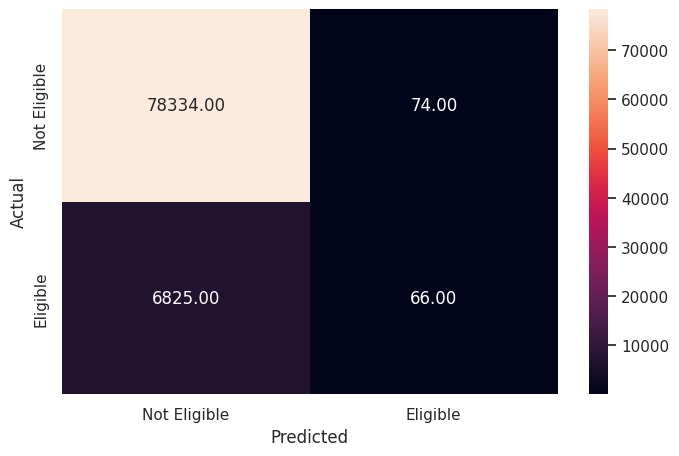

In [52]:
#Predicting for train set
y_pred_train = lg.predict(x_train)

#checking the performance on the train dataset
metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     33603
           1       0.46      0.01      0.02      2954

    accuracy                           0.92     36557
   macro avg       0.69      0.50      0.49     36557
weighted avg       0.88      0.92      0.88     36557



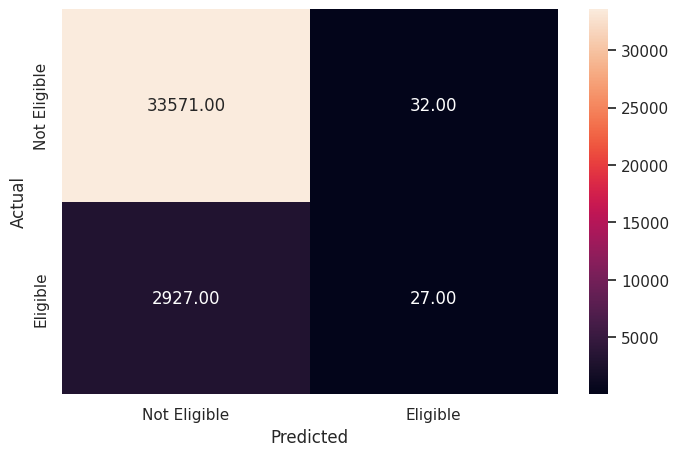

In [53]:
#Predicting for test set
y_pred_test = lg.predict(x_test)

#checking the performance on the test dataset
metrics_score(y_test, y_pred_test)

In [54]:
# Printing the coefficients of logistic regression

cols = X_scaled.columns

coef_lg = lg.coef_

pd.DataFrame(coef_lg,columns = cols).T.sort_values(by = 0, ascending = False)

0
Client_Education_Secondary  0.164822
Loan_Annuity                0.123003
Own_House_Age               0.072805
Client_Occupation_Laborers  0.060168
Client_Income_Type_Retired  0.058158
...                              ...
Employed_Days              -0.238300
Accompany_Client_Relative  -0.313781
Accompany_Client_Alone     -0.353279
Score_Source_2             -0.386079
Score_Source_3             -0.461352

[132 rows x 1 columns]

In [55]:
odds = np.exp(lg.coef_[0]) # Finding the odds

# Adding the odds to a DataFrame and sorting the values
pd.DataFrame(odds, x_train.columns, columns = ['odds']).sort_values(by = 'odds', ascending = False)

odds
Client_Education_Secondary  1.179184
Loan_Annuity                1.130888
Own_House_Age               1.075520
Client_Occupation_Laborers  1.062015
Client_Income_Type_Retired  1.059883
...                              ...
Employed_Days               0.787967
Accompany_Client_Relative   0.730679
Accompany_Client_Alone      0.702381
Score_Source_2              0.679717
Score_Source_3              0.630431

[132 rows x 1 columns]

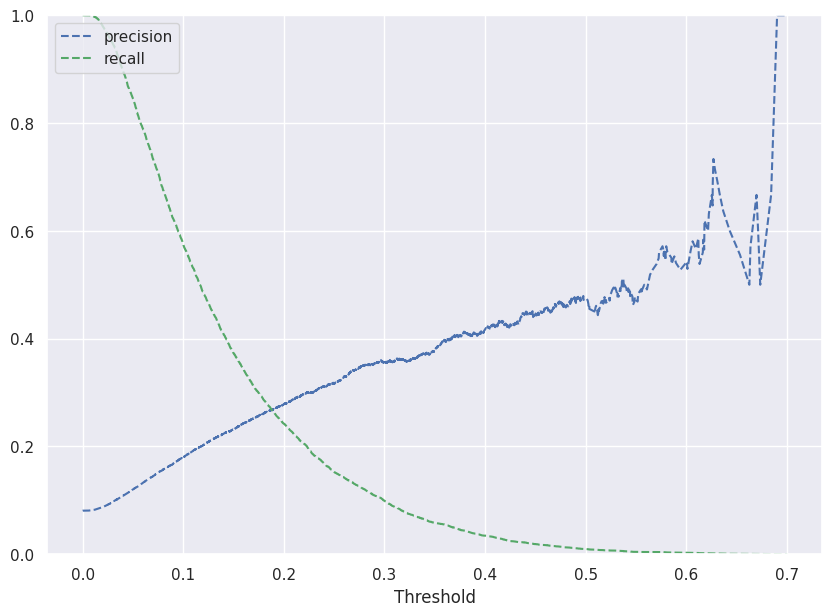

In [56]:
y_scores_lg = lg.predict_proba(x_train) # predict_proba gives the probability of each observation belonging to each class


precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:, 1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))

plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label = 'precision')

plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')

plt.xlabel('Threshold')

plt.legend(loc = 'upper left')

plt.ylim([0, 1])

plt.show()

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     78408
           1       0.35      0.12      0.18      6891

    accuracy                           0.91     85299
   macro avg       0.64      0.55      0.57     85299
weighted avg       0.88      0.91      0.89     85299



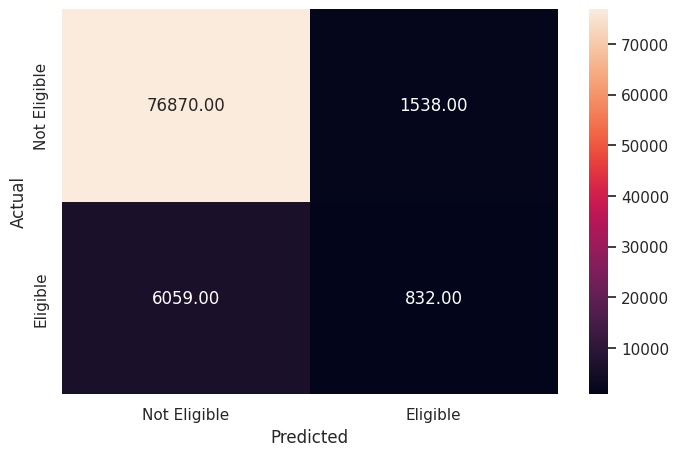

In [57]:
optimal_threshold1 = .28

y_pred_train = lg.predict_proba(x_train)

metrics_score(y_train, y_pred_train[:, 1] > optimal_threshold1)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     33603
           1       0.30      0.10      0.15      2954

    accuracy                           0.91     36557
   macro avg       0.61      0.54      0.55     36557
weighted avg       0.88      0.91      0.89     36557



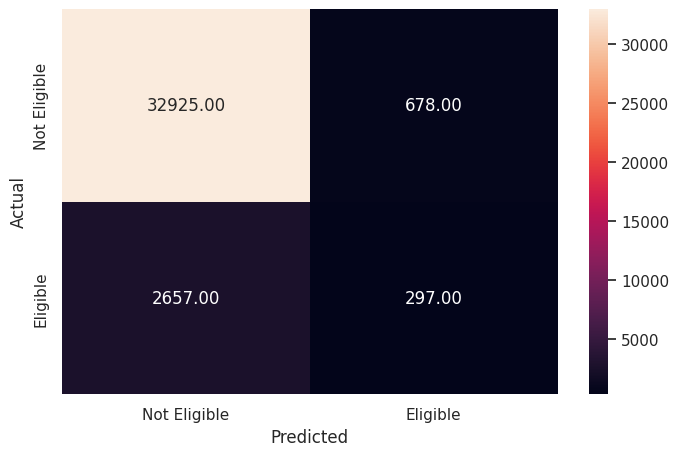

In [58]:
optimal_threshold1 = .28

y_pred_test = lg.predict_proba(x_test)

metrics_score(y_test, y_pred_test[:, 1] > optimal_threshold1)

# **Data Preparation for the tree based model**

Observation: We aren't going to treat de outliers in order to build the model because small changes in the training data can result in a large change in the tree and consequently the final predictions.

Data Preparation for the tree based model

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 73 columns):
 #   Column                                          Non-Null Count   Dtype   
---  ------                                          --------------   -----   
 0   ID                                              121856 non-null  int64   
 1   Client_Income                                   121856 non-null  float64 
 2   Car_Owned                                       121856 non-null  float64 
 3   Bike_Owned                                      121856 non-null  float64 
 4   Active_Loan                                     121856 non-null  float64 
 5   House_Own                                       121856 non-null  float64 
 6   Child_Count                                     121856 non-null  float64 
 7   Credit_Amount                                   121856 non-null  float64 
 8   Loan_Annuity                                    121856 non-null  float64 
 9   Accompany_Clien

In [60]:
#copying df to another variable
data = df.copy()

In [61]:
# Separating the target variable and other variables
Y = data.Default

In [62]:
X = data.drop(columns = ['Default'])

In [63]:
# Creating dummy variables for the categorical variables
to_get_dummies_for = ['Accompany_Client', 'Client_Income_Type', 'Client_Education', 'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type', 'Client_Occupation', 'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag', 'Type_Organization']


In [64]:
# Creating dummy variables
X = pd.get_dummies(data = X, columns = to_get_dummies_for, drop_first = True)

In [65]:
X

ID  Client_Income  Car_Owned  Bike_Owned  Active_Loan  \
0       12142509         6750.0        0.0         0.0          1.0   
1       12138936        20250.0        1.0         0.0          1.0   
2       12181264        18000.0        0.0         0.0          1.0   
3       12188929        15750.0        0.0         0.0          1.0   
4       12133385        33750.0        1.0         0.0          1.0   
...          ...            ...        ...         ...          ...   
121851  12207714        29250.0        0.0         0.0          0.0   
121852  12173765        15750.0        0.0         1.0          1.0   
121853  12103937         8100.0        0.0         1.0          0.0   
121854  12170623        33750.0        1.0         1.0          0.0   
121855  12105610         9000.0        1.0         1.0          1.0   

        House_Own  Child_Count  Credit_Amount  Loan_Annuity  \
0             0.0          0.0       61190.55       3416.85   
1             1.0          0.0       15282.00       1826.55   
2             0.0          1.0       59527.35       2788.20   
3             1.0          0.0       53870.40       2295.45   
4             0.0          2.0      133988.40       3547.35   
...           ...          ...            ...           ...   
121851        1.0          0.0      107820.00       3165.30   
121852        0.0          0.0      104256.00       3388.05   
121853        1.0          1.0       55107.90       2989.35   
121854        1.0          0.0       45000.00       2719.35   
121855        1.0          1.0       62428.95       4201.65   

        Population_Region_Relative  ...  Type_Organization_Trade: type 4  \
0                         0.028663  ...                                0   
1                         0.008575  ...                                0   
2                         0.022800  ...                                0   
3                         0.010556  ...                                0   
4                         0.020713  ...                                0   
...                            ...  ...                              ...   
121851                    0.031329  ...                                0   
121852                    0.018209  ...                                0   
121853                    0.008068  ...                                0   
121854                    0.028663  ...                                0   
121855                    0.018029  ...                                0   

        Type_Organization_Trade: type 5  Type_Organization_Trade: type 6  \
0                                     0                                0   
1                                     0                                0   
2                                     0                                0   
3                                     0                                0   
4                                     0                                0   
...                                 ...                              ...   
121851                                0                                0   
121852                                0                                0   
121853                                0                                1   
121854                                0                                0   
121855                                0                                0   

        Type_Organization_Trade: type 7  Type_Organization_Transport: type 1  \
0                                     0                                    0   
1                                     0                                    0   
2                                     0                                    0   
3                                     0                                    0   
4                                     0                                    0   
...                                 ...                                  ...   
121851            

**Split the data**

In [66]:
# Split the data into training and test set (We use Stratify = 1 because data is unbalanced)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

In [67]:
#Defining Decision tree model with class weights class_weight={0: 0.2, 1: 0.8}
dt = DecisionTreeClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1)

In [68]:

#fitting Decision tree model
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78408
           1       1.00      1.00      1.00      6891

    accuracy                           1.00     85299
   macro avg       1.00      1.00      1.00     85299
weighted avg       1.00      1.00      1.00     85299



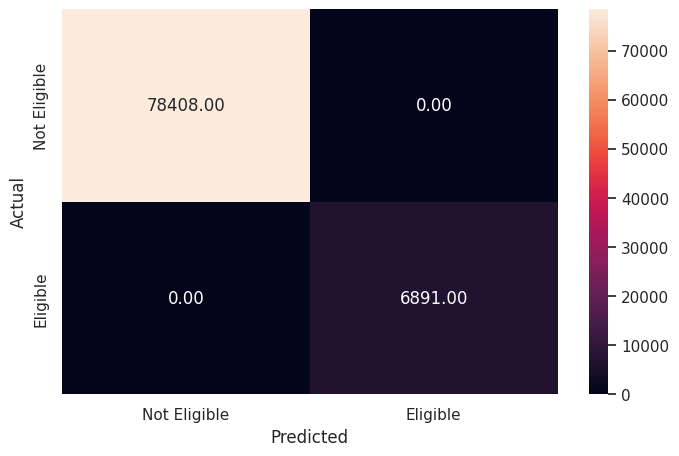

In [69]:
# Checking performance on the training data

y_train_pred_dt = dt.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     33603
           1       0.23      0.25      0.24      2954

    accuracy                           0.87     36557
   macro avg       0.58      0.59      0.58     36557
weighted avg       0.88      0.87      0.87     36557



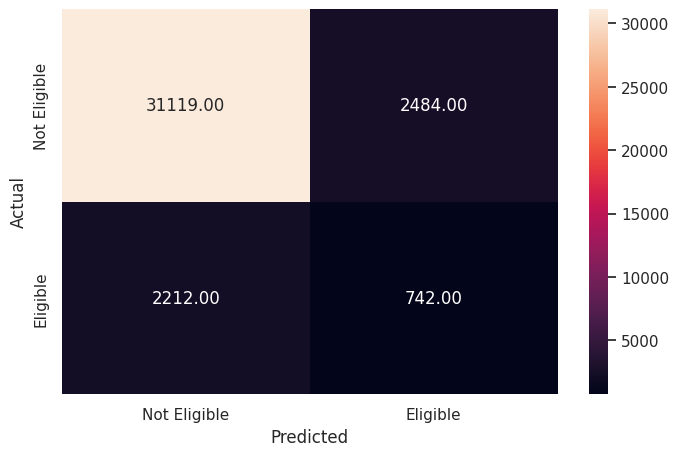

In [70]:
# Checking performance on the testing data

y_test_pred_dt = dt.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

# **Decision Tree - Hyperparameter Tuning**

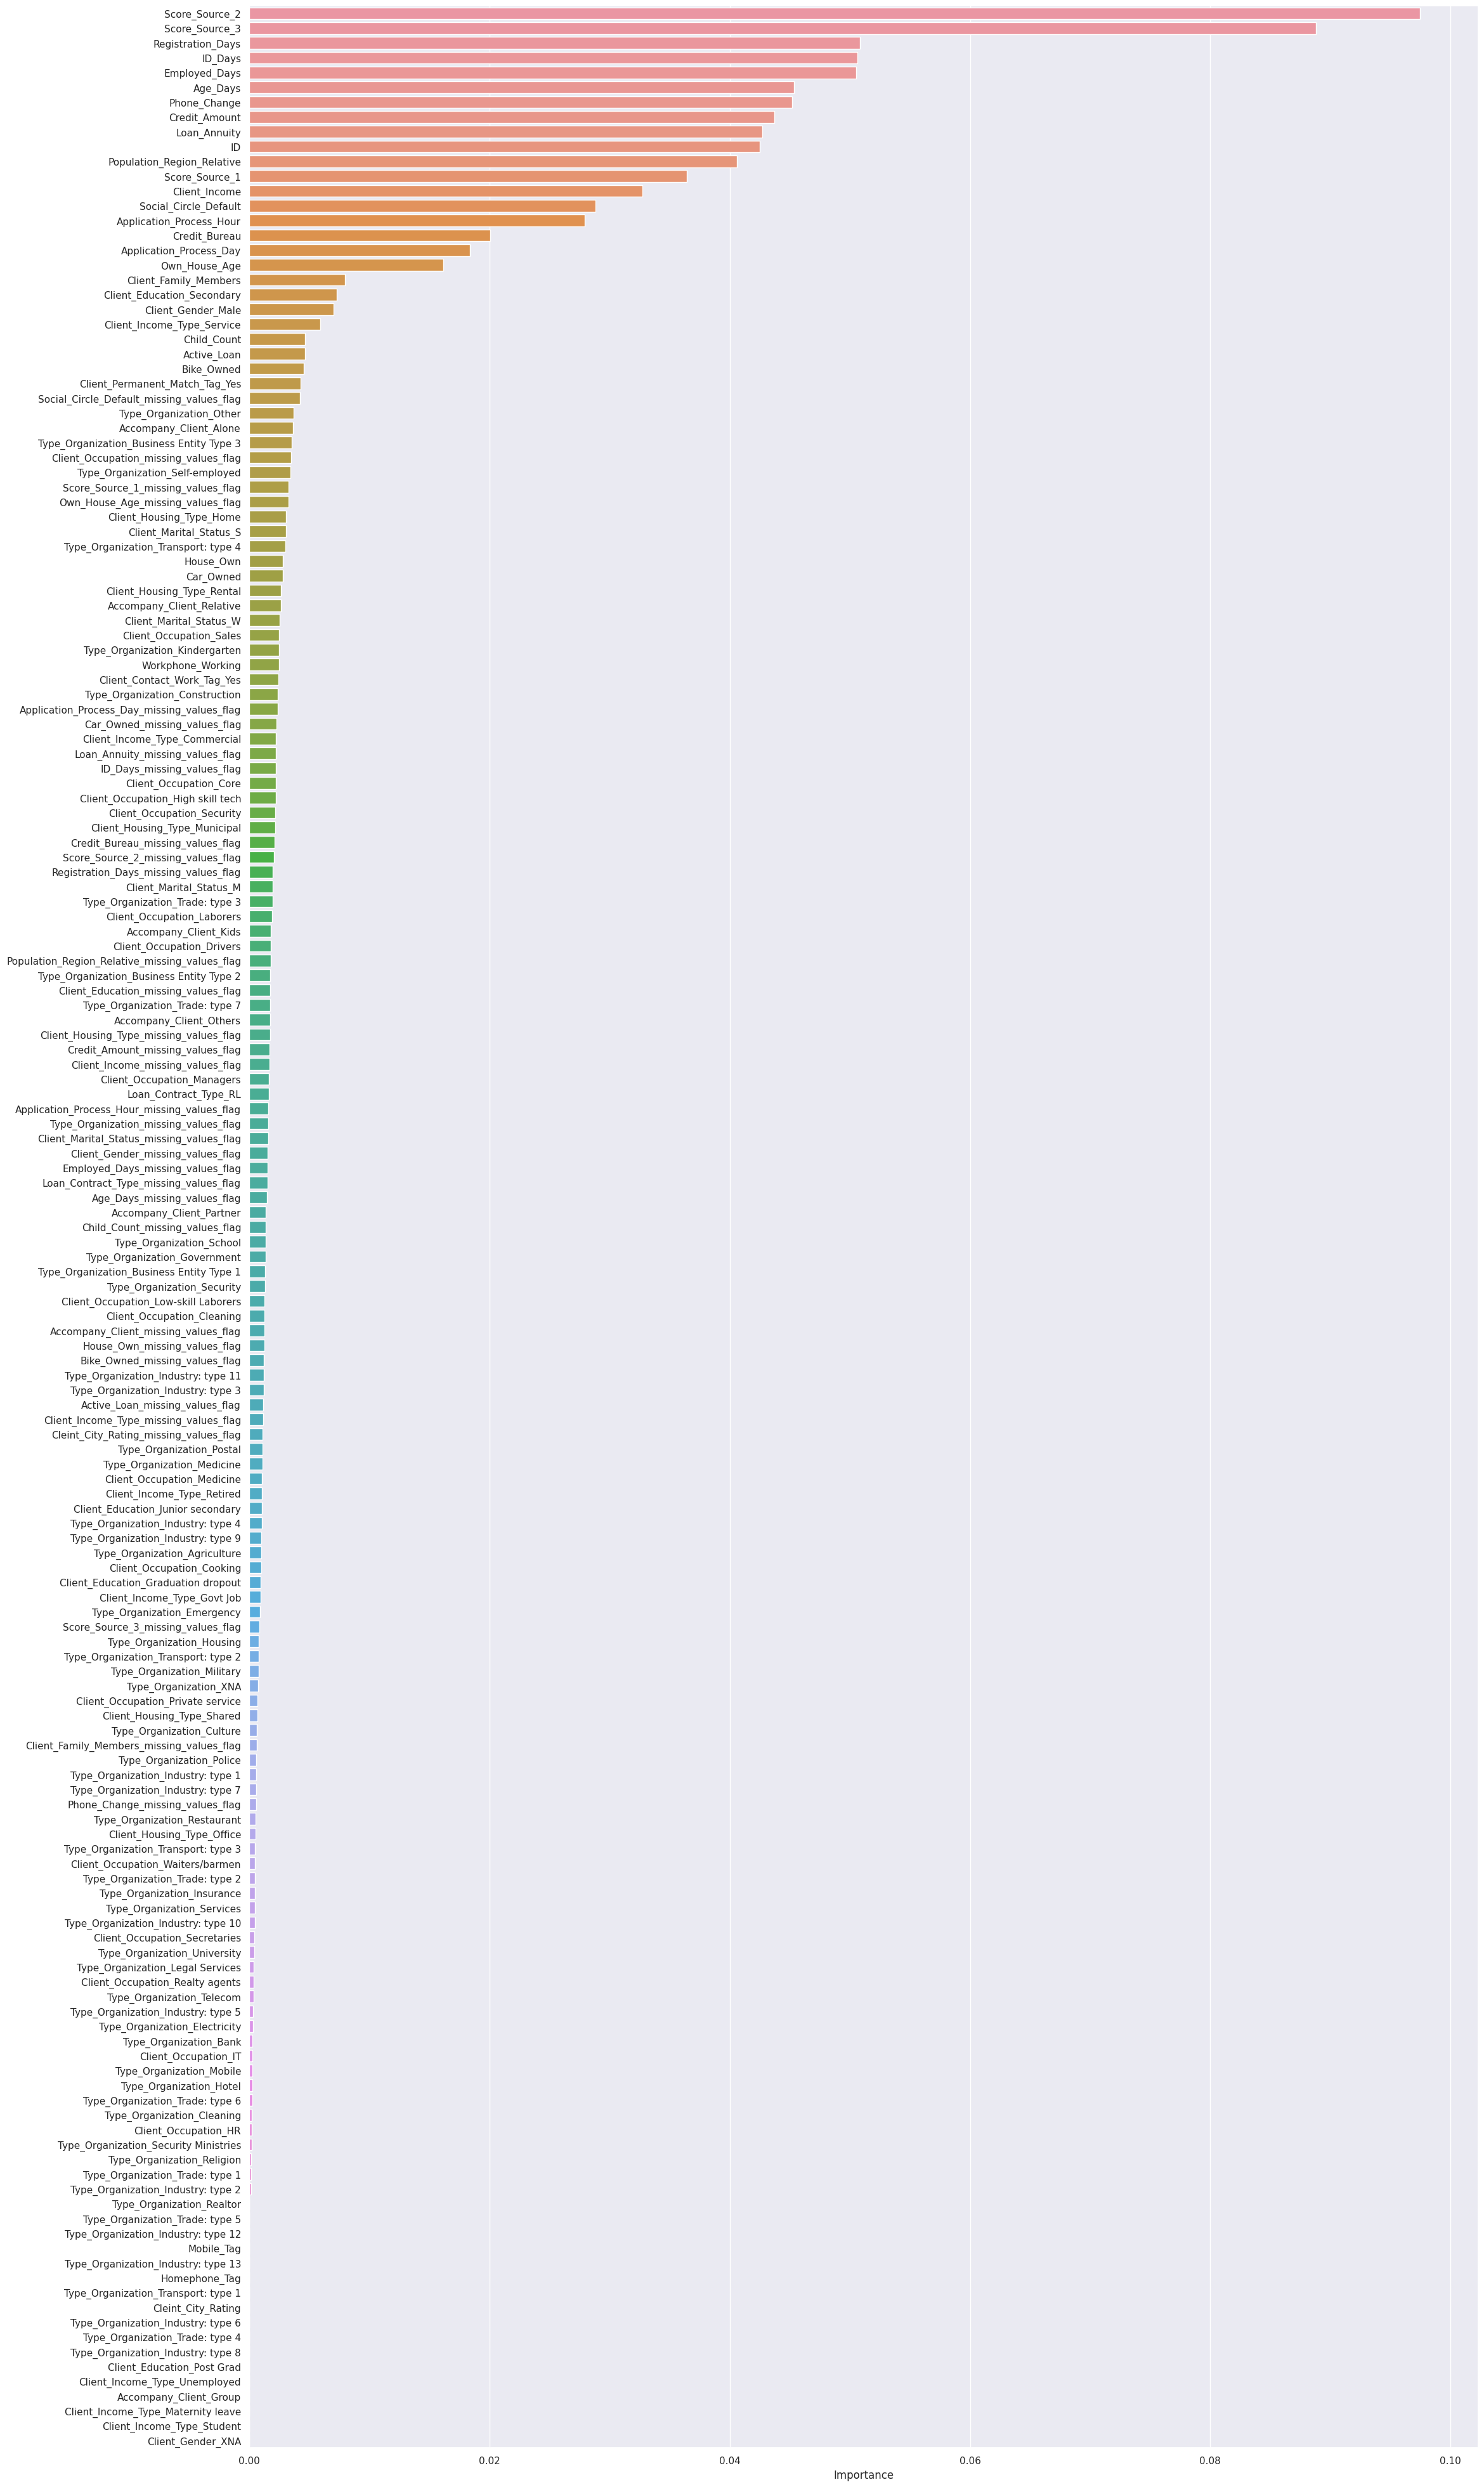

In [71]:
# Plotting the feature importance
importances = dt.feature_importances_
columns = X.columns

importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(25, 50))
sns.barplot(x=importance_df.Importance, y=importance_df.index)
plt.show()


**Using GridSearchCV for Hyperparameter tuning on the model**

In [72]:
# Choosing the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1)

In [73]:
# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 7),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

In [74]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

In [75]:
# Run the grid search
gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 10)

In [76]:
# Fitting the GridSearch on train dataset
gridCV = gridCV.fit(x_train, y_train)

In [77]:
# Setting the clf to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

In [78]:
# Fitting the best algorithm to the data.
dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='entropy',
                       max_depth=5, min_samples_leaf=20, random_state=1)

**Checking the performance on the train dataset**

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     78408
           1       0.28      0.21      0.24      6891

    accuracy                           0.89     85299
   macro avg       0.60      0.58      0.59     85299
weighted avg       0.88      0.89      0.88     85299



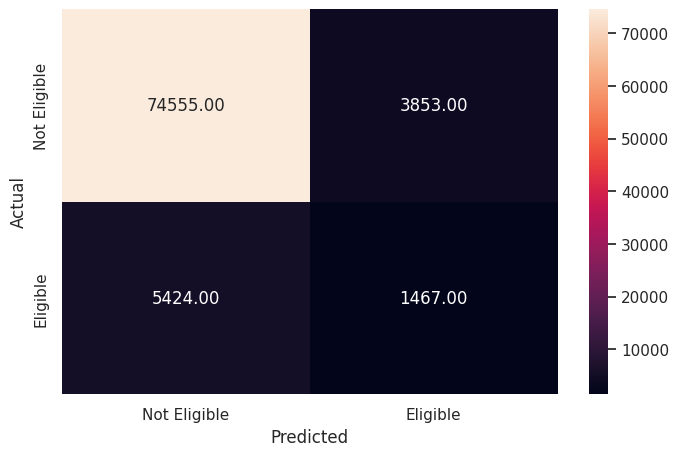

In [79]:
# Checking performance on the training data based on the tuned model

y_train_pred_dt = dtree_estimator.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

**Checking the performance on the test dataset**

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     33603
           1       0.24      0.19      0.21      2954

    accuracy                           0.89     36557
   macro avg       0.59      0.57      0.58     36557
weighted avg       0.87      0.89      0.88     36557



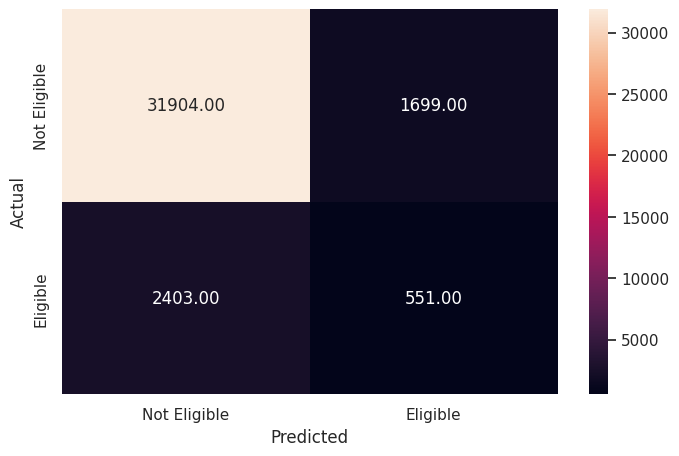

In [80]:
# Checking performance on the testing data based on the tuned model

y_test_pred_dt = dtree_estimator.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

**Let's look at the feature importance of this model and try to analyze why this is happening.**

In [81]:
importances = dtree_estimator.feature_importances_

columns = X.columns



In [82]:
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)




In [83]:
plt.figure(figsize = (13, 13))


<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

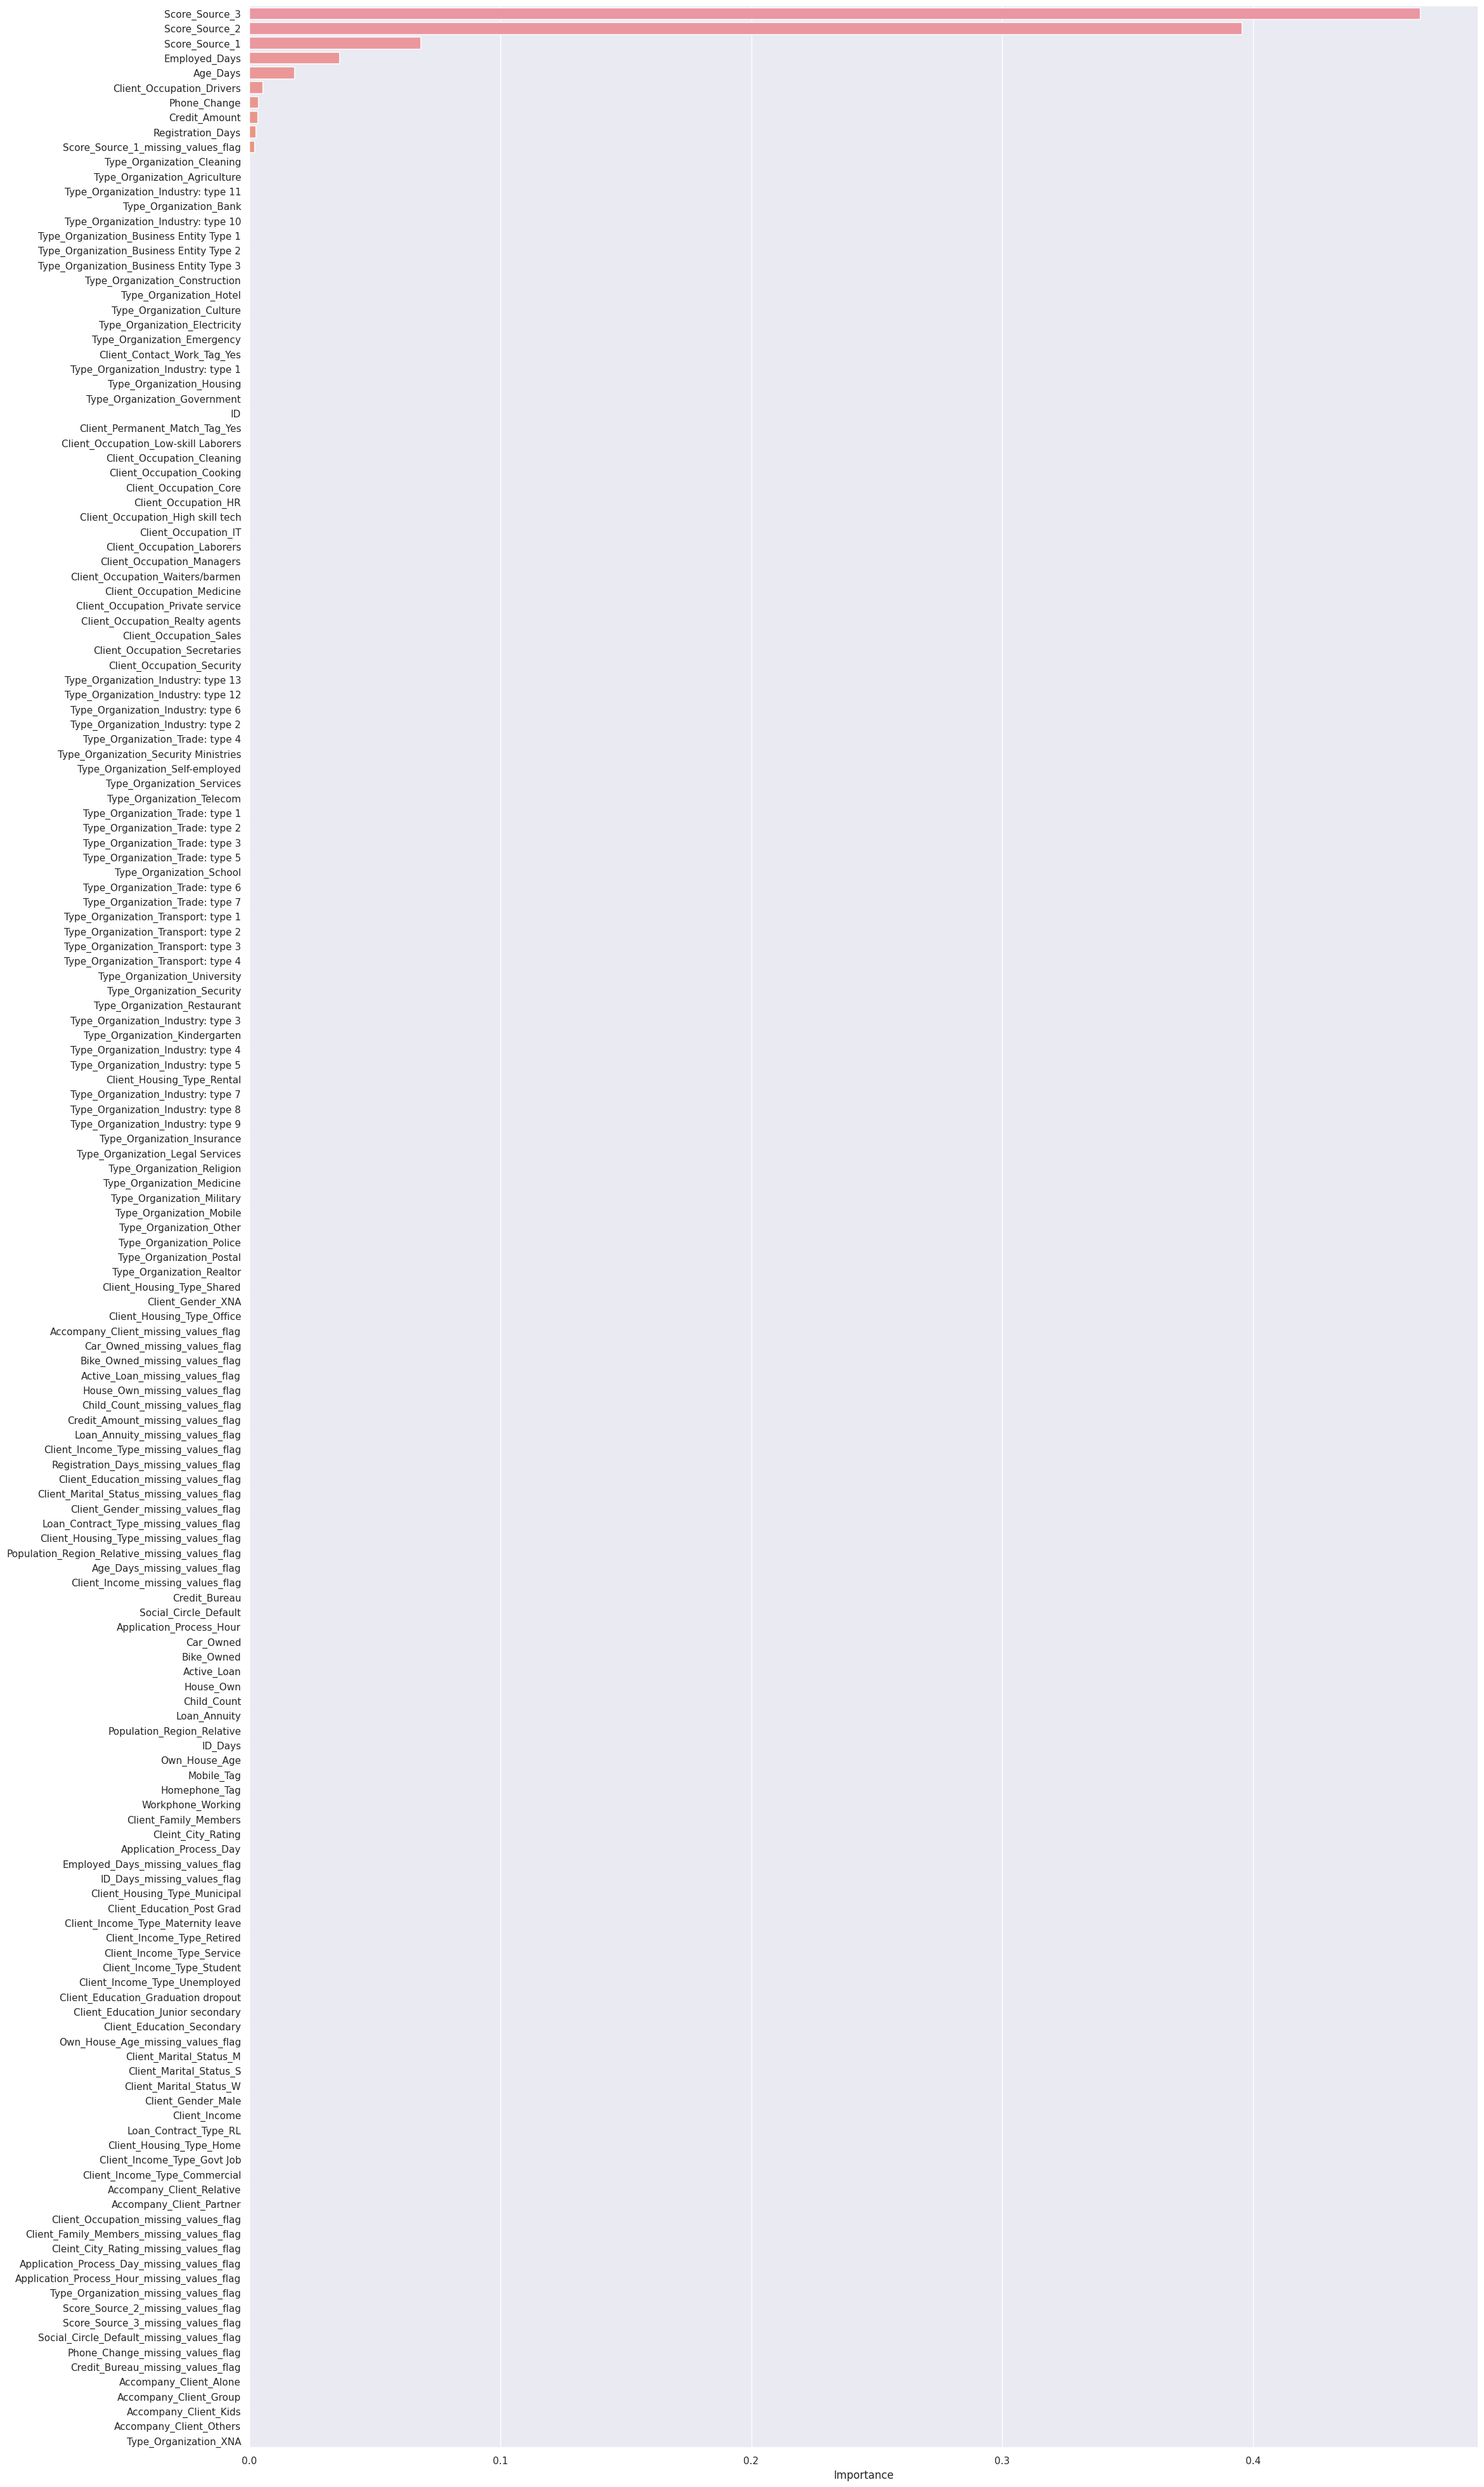

In [84]:
plt.figure(figsize=(25, 50))
sns.barplot(y=importance_df.index, x=importance_df['Importance'])
plt.show()

**Plotting the Decision Tree**

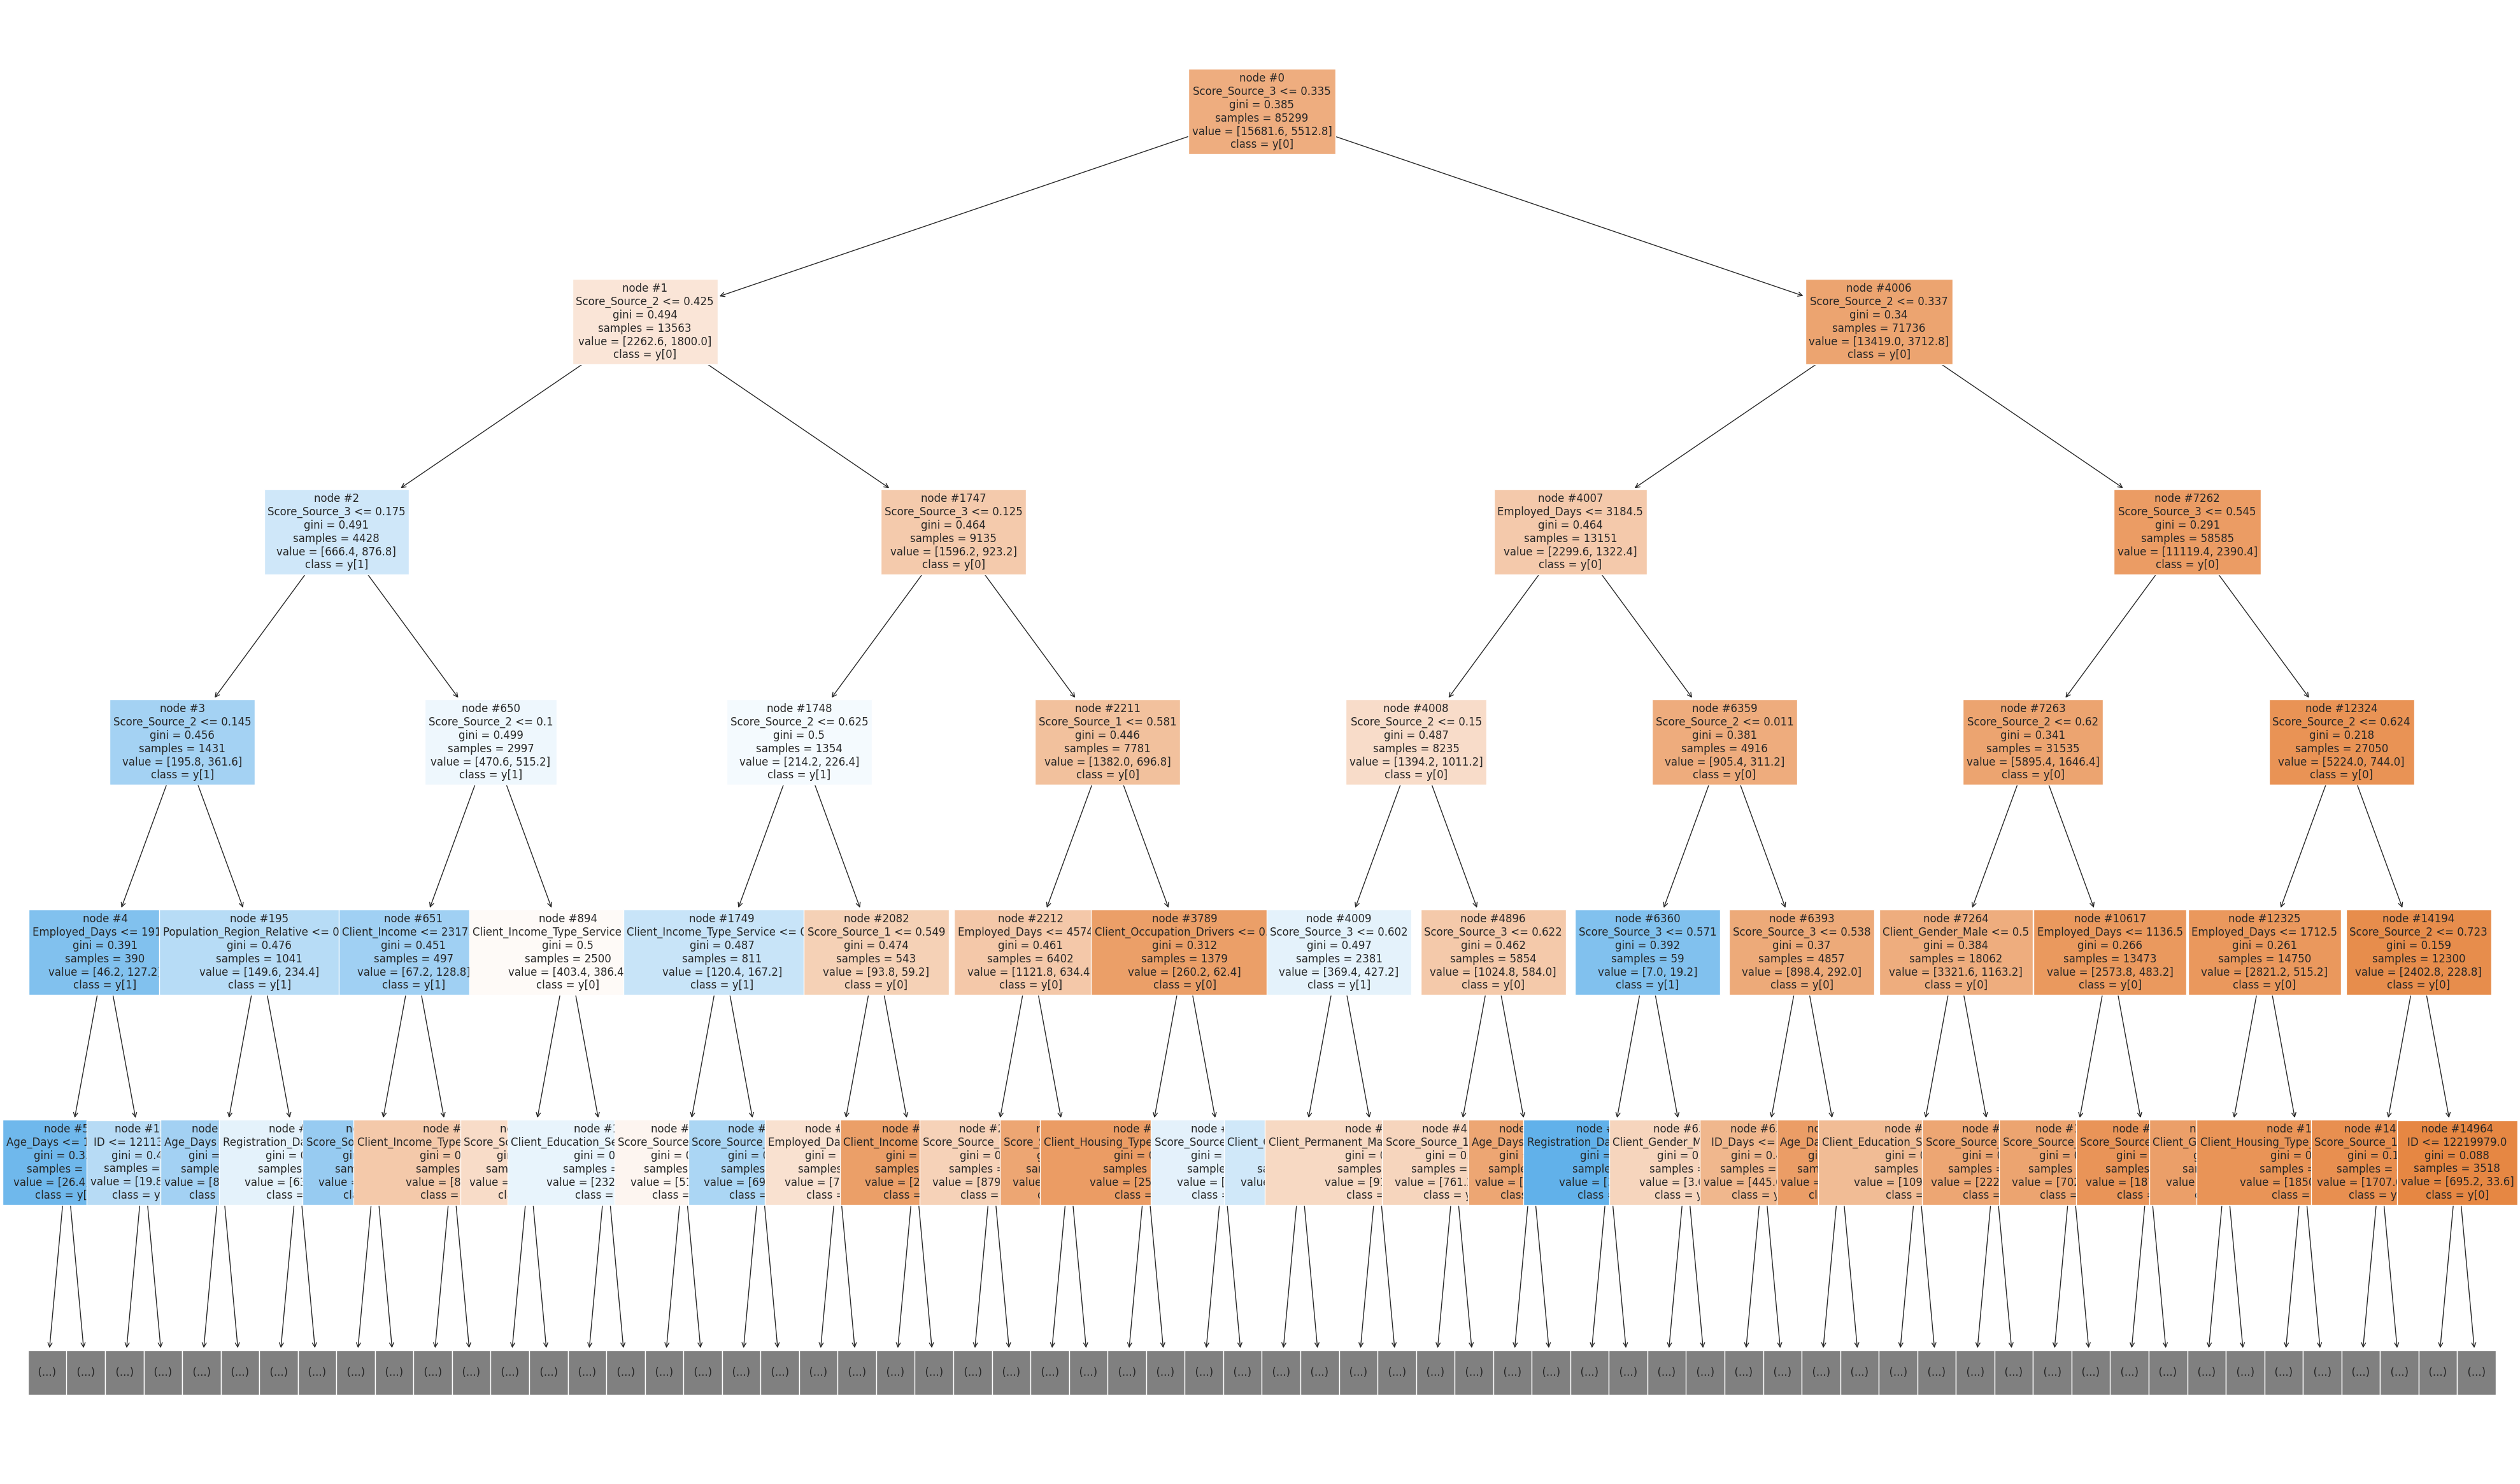

In [85]:
# Plotting the decision  tree and analyze it to build the decision rule

features = list(X.columns)

plt.figure(figsize = (50, 30))

tree.plot_tree(dt, max_depth = 5, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

**Building a Random Forest Classifier**

In [86]:
# Defining Random forest CLassifier

rf_estimator = RandomForestClassifier(random_state = 1)

rf_estimator.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

**Checking the performance on the train dataset**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78408
           1       1.00      1.00      1.00      6891

    accuracy                           1.00     85299
   macro avg       1.00      1.00      1.00     85299
weighted avg       1.00      1.00      1.00     85299



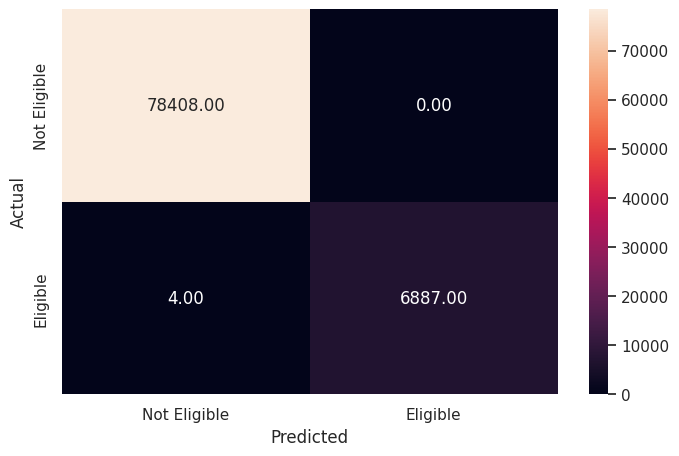

In [87]:
#Checking performance on the training data

y_pred_train_rf = rf_estimator.predict(x_train)

metrics_score(y_train, y_pred_train_rf)

**Checking the performance on the test dataset**

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     33603
           1       1.00      0.06      0.11      2954

    accuracy                           0.92     36557
   macro avg       0.96      0.53      0.54     36557
weighted avg       0.93      0.92      0.89     36557



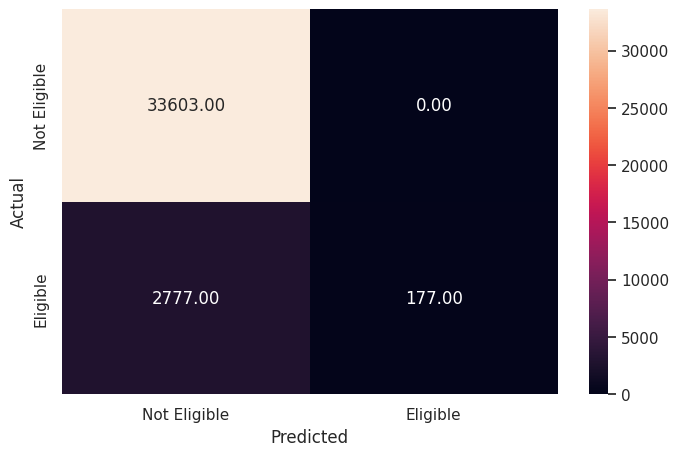

In [88]:
# Checking performance on the test data
y_pred_test_rf = rf_estimator.predict(x_test)

metrics_score(y_test, y_pred_test_rf)

**Build a Random Forest model with Class Weights**

In [89]:
# Defining Random Forest model with class weights class_weight={0: 0.2, 1: 0.8}
rf_estimator = RandomForestClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1)

# Fitting Random Forest model
rf_estimator.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

**Checking the performance on the train dataset**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78408
           1       1.00      1.00      1.00      6891

    accuracy                           1.00     85299
   macro avg       1.00      1.00      1.00     85299
weighted avg       1.00      1.00      1.00     85299



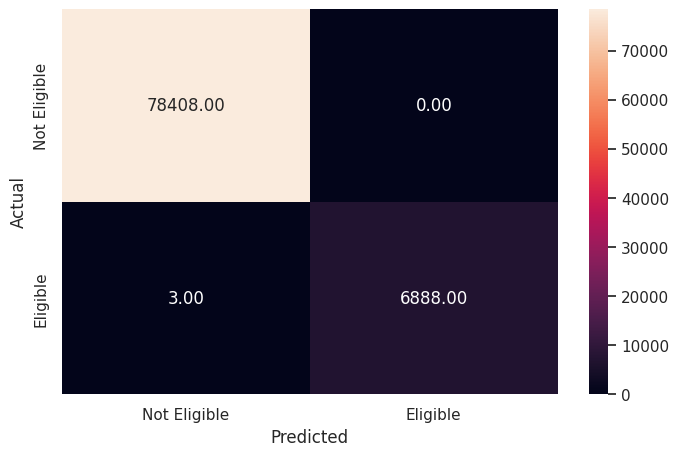

In [90]:
# Checking performance on the train data
y_pred_train_rf = rf_estimator.predict(x_train)

metrics_score(y_train, y_pred_train_rf)

**Checking the performance on the test dataset**

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     33603
           1       0.99      0.05      0.10      2954

    accuracy                           0.92     36557
   macro avg       0.96      0.53      0.53     36557
weighted avg       0.93      0.92      0.89     36557



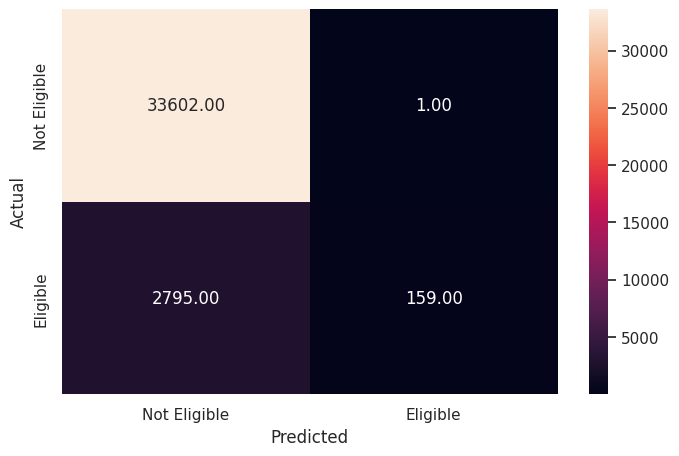

In [91]:
# Checking performance on the test data
y_pred_test_rf = rf_estimator.predict(x_test)

metrics_score(y_test, y_pred_test_rf)

**Plot the Feature importance of the Random Forest**

<Axes: xlabel='Importance'>

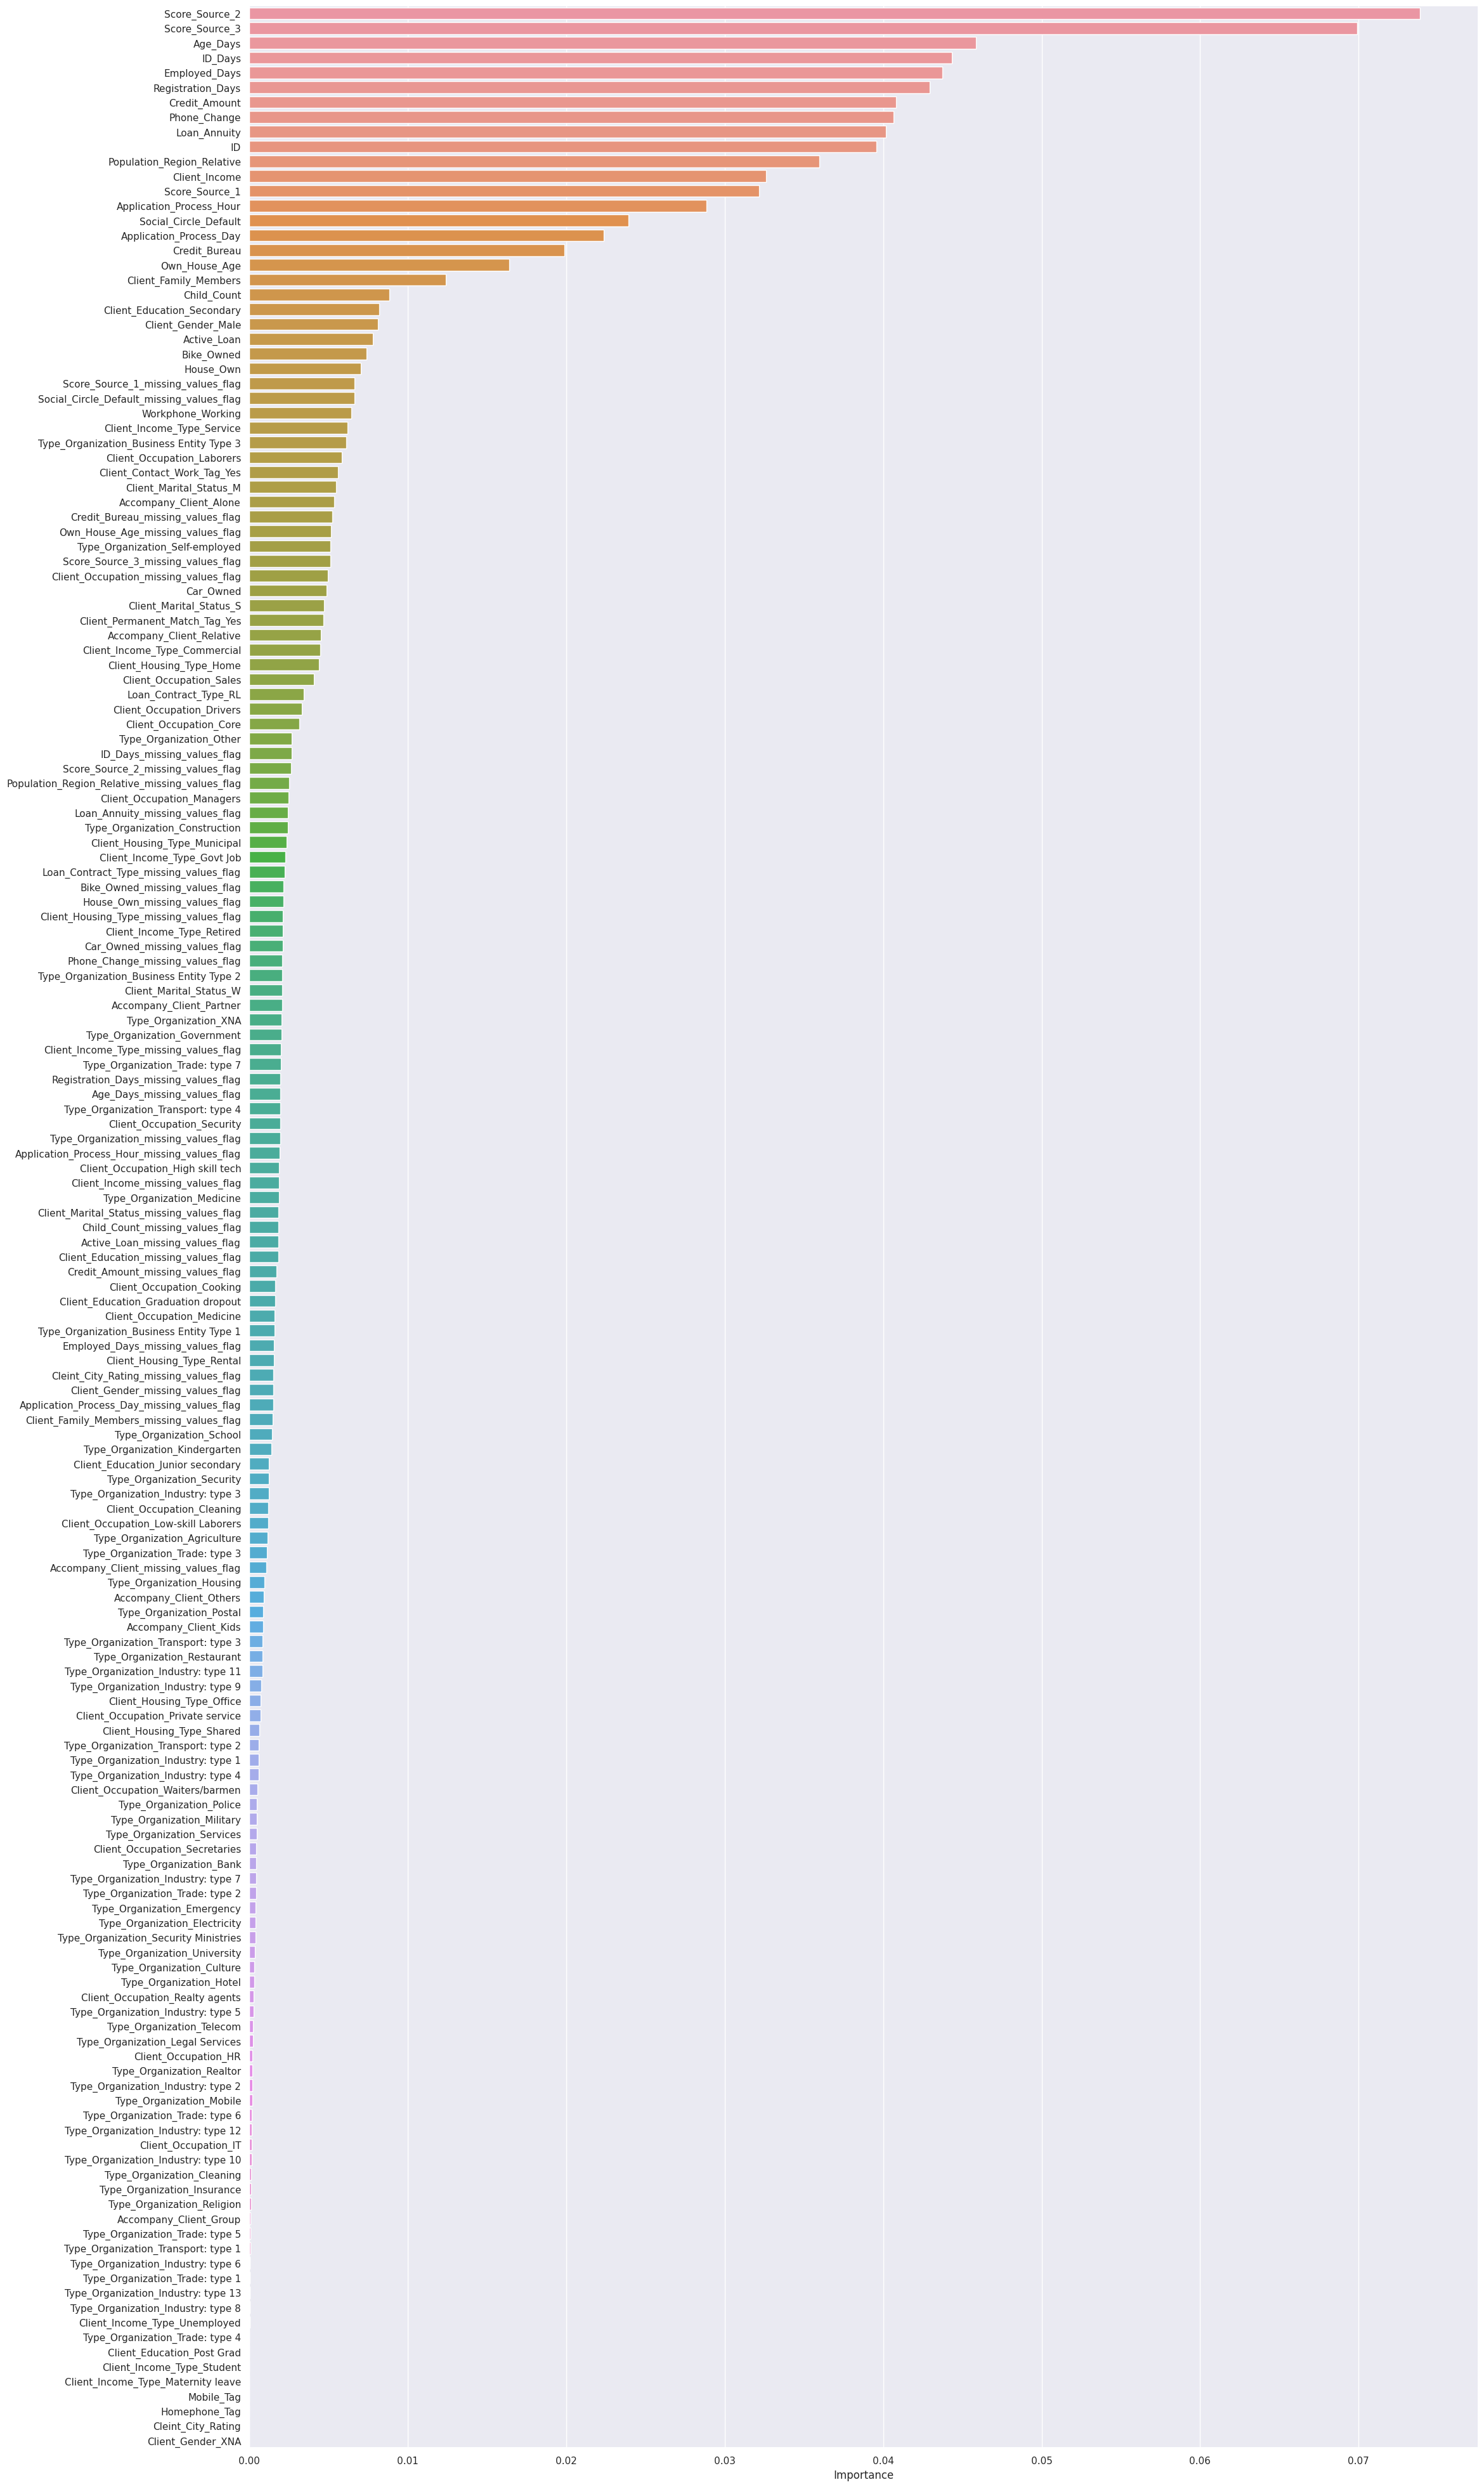

In [92]:
# importance of features in the tree building
importances = rf_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (25, 50))

sns.barplot(x=importance_df.Importance, y=importance_df.index)

**Tuning the Random Forest**

We'll use Grid search to perform hyperparameter tuning.
Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.
It is an exhaustive search that is performed on the specific parameter values of a model.
The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.




In [93]:
# Choosing the type of classifier.
#rf_estimator_tuned = RandomForestClassifier(random_state = 1)

# Grid of parameters to choose from
#params_rf = {
 #       "n_estimators": [100, 250, 500],
  #      "min_samples_leaf": np.arange(1, 4, 1),
   #     "max_features": [0.7, 0.9, 'auto'],
#}

# Type of scoring used to compare parameter combinations
#scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Running the grid search
#grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

#fitting the GridSearch on train dataset
#grid_obj = grid_obj.fit(x_train, y_train)

# Setting the clf to the best combination of parameters
#rf_estimator_tuned = grid_obj.best_estimator_

# Fitting the best algorithm to the data.
#rf_estimator_tuned.fit(x_train, y_train)

**Comparing Model Performances**

In [94]:
def get_recall_score(model,flag=True,X_train=x_train,X_test=x_test):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list
    a.append(test_recall) # adding test recall to list

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

    return a # returning the list with train and test scores

In [95]:
##  Function to calculate precision score
def get_precision_score(model,flag=True,X_train=x_train,X_test=x_test):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [96]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,X_train=x_train,X_test=x_test):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))

    return c # returning the list with train and test scores

In [97]:
# Making the list of all the model names

#models = [lg, dt, dtree_estimator, rf_estimator, rf_estimator_tuned]
models = [ rf_estimator, dtree_estimator, dt]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:

     # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

    # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])


In [98]:
# Mentioning the Model names in the list.
comparison_frame = pd.DataFrame({'Model':[ 'Random Forest', 'Tuned Decision Tree', 'Decision Tree'],
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test})
comparison_frame

Model  Train_Accuracy  Test_Accuracy  Train_Recall  \
0        Random Forest        0.999965       0.923517      0.999565   
1  Tuned Decision Tree        0.891241       0.887792      0.212886   
2        Decision Tree        1.000000       0.871543      1.000000   

   Test_Recall  Train_Precision  Test_Precision  
0     0.053825         1.000000        0.993750  
1     0.186527         0.275752        0.244889  
2     0.251185         1.000000        0.230006